<a href="https://colab.research.google.com/github/geotserga/Bankrupt_Classification/blob/main/Bankrupt_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time
import random

In [ ]:
#mount gdrive directory
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#load available data entries
fileNameFullPath='/content/drive/MyDrive/Datasets/Dataset2Use_Assignment1.xlsx'
df = pd.read_excel(fileNameFullPath)

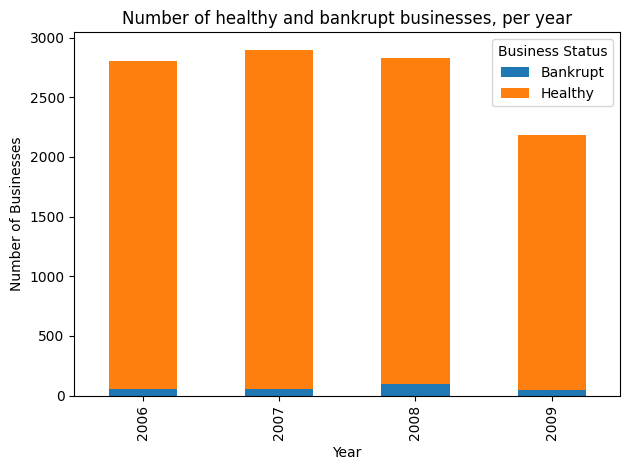

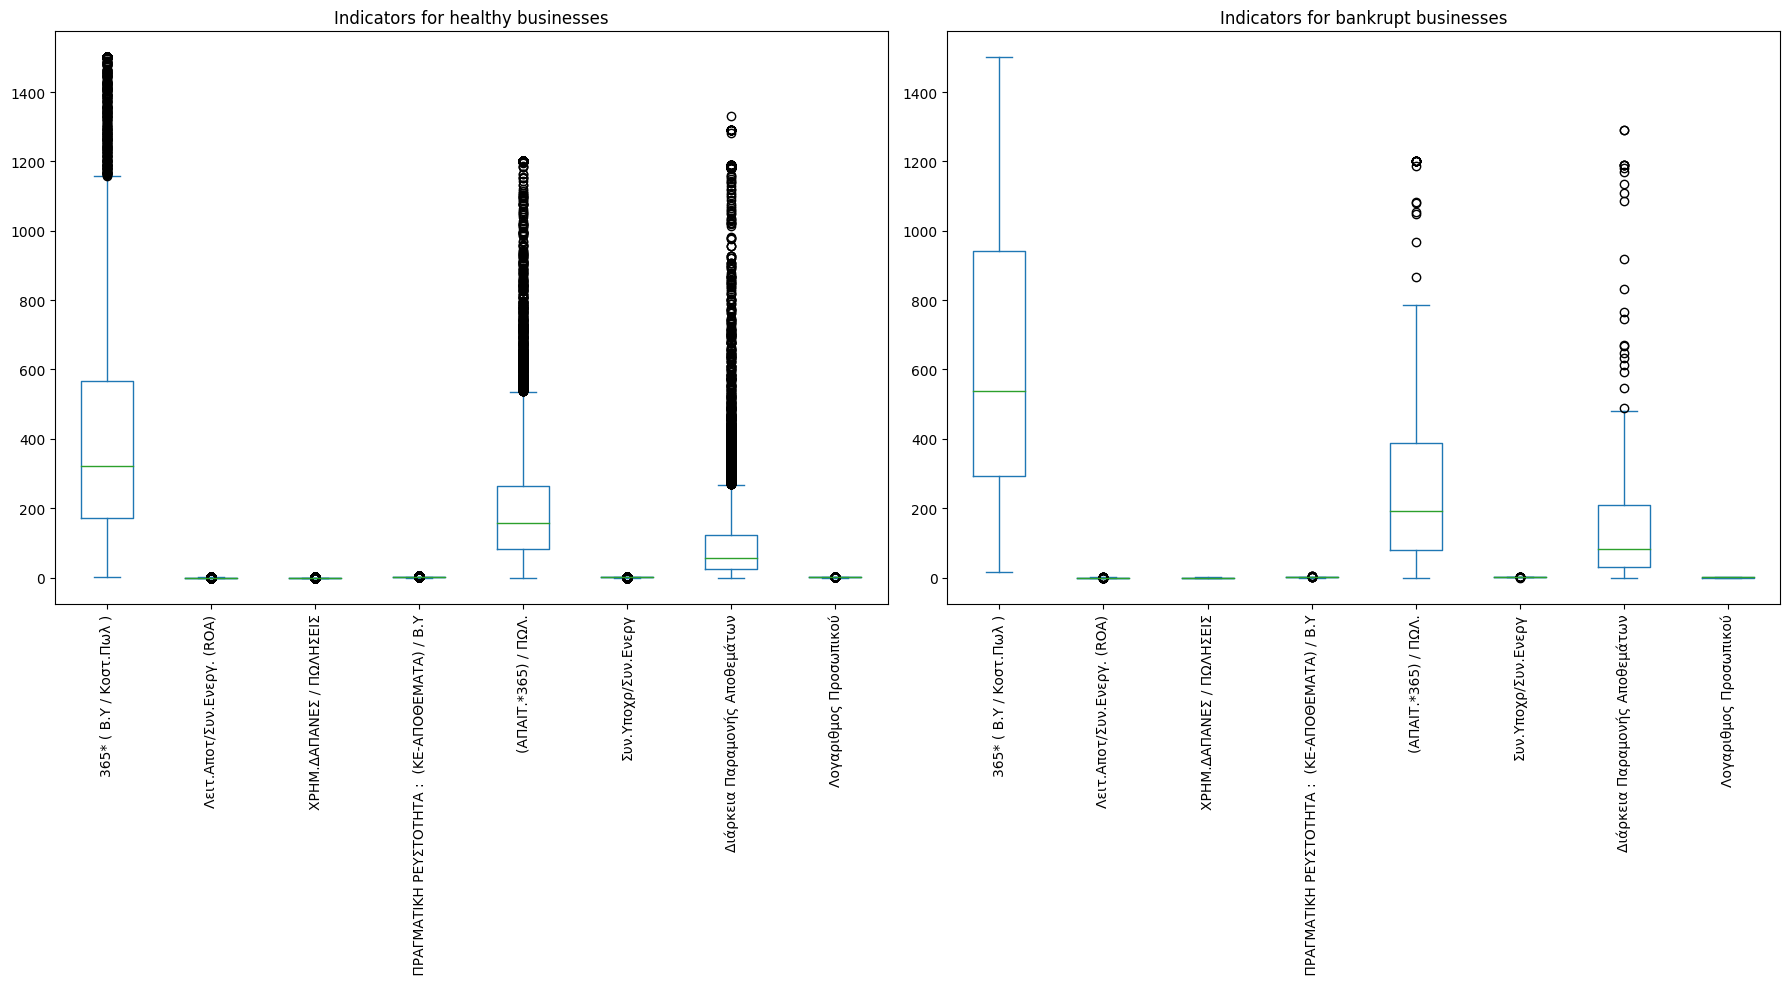

In [ ]:
# Figure 1: Number of healthy and bankrupt businesses, per year
df['Business_Status'] = df['ΕΝΔΕΙΞΗ ΑΣΥΝΕΠΕΙΑΣ (=2) (ν+1)'].map({1: 'Healthy', 2: 'Bankrupt'})
fig, ax = plt.subplots()
df.groupby(['ΕΤΟΣ', 'Business_Status']).size().unstack().plot(kind='bar', stacked=True, ax=ax)
ax.set_xlabel('Year')
ax.set_ylabel('Number of Businesses')
plt.title('Number of healthy and bankrupt businesses, per year')
plt.legend(title='Business Status')
plt.tight_layout()
plt.show()

# Figure 2: Ιndicator values for healthy and bankrupt businesses
fig, axes = plt.subplots(1, 2, figsize=(18, 10))

# Indicators for healthy businesses
df[df['Business_Status'] == 'Healthy'].iloc[:, :8].plot.box(ax=axes[0])
axes[0].set_title('Indicators for healthy businesses')
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=90)

# Indicators for bankrupt businesses
df[df['Business_Status'] == 'Bankrupt'].iloc[:, :8].plot.box(ax=axes[1])
axes[1].set_title('Indicators for bankrupt businesses')
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=90)

plt.tight_layout()
plt.show()

In [ ]:
# Check for NaN values
nan_report = df.isna().sum()

# Calculate the percentage of NaN values
nan_percentage_report = (df.isna().mean() * 100).round(2)

# Concatenate the reports side by side
combined_report = pd.concat([nan_report, nan_percentage_report], axis=1, keys=['NaN Count', 'NaN Percentage'])

# Display the combined report
print("Combined NaN Report:")
print(combined_report)

# Provide a relative message to the user
if combined_report.values.max() == 0:
    print("\nGood news! There are no missing values in the DataFrame.")
else:
    print("\nPlease be aware that there are missing values in the DataFrame. Consider handling them appropriately.")

Combined NaN Report:
                                                NaN Count  NaN Percentage
365* ( Β.Υ / Κοστ.Πωλ )                                 0             0.0
Λειτ.Αποτ/Συν.Ενεργ. (ROA)                              0             0.0
ΧΡΗΜ.ΔΑΠΑΝΕΣ / ΠΩΛΗΣΕΙΣ                                 0             0.0
 ΠΡΑΓΜΑΤΙΚΗ ΡΕΥΣΤΟΤΗΤΑ :  (ΚΕ-ΑΠΟΘΕΜΑΤΑ) / Β.Υ          0             0.0
(ΑΠΑΙΤ.*365) / ΠΩΛ.                                     0             0.0
Συν.Υποχρ/Συν.Ενεργ                                     0             0.0
Διάρκεια Παραμονής Αποθεμάτων                           0             0.0
Λογαριθμος Προσωπικού                                   0             0.0
ΕΝΔΕΙΞΗ ΕΞΑΓΩΓΩΝ                                        0             0.0
ΕΝΔΕΙΞΗ ΕΙΣΑΓΩΓΩΝ                                       0             0.0
ΕΝΔΕΙΞΗ ΑΝΤΙΠΡΟΣΩΠΕΙΩΝ                                  0             0.0
ΕΝΔΕΙΞΗ ΑΣΥΝΕΠΕΙΑΣ (=2) (ν+1)                           0             0.0
ΕΤΟΣ             

In [ ]:
from sklearn.preprocessing import MinMaxScaler
# Analyzing the characteristics of the companies
features = df.iloc[:, :11].values  # The first 11 columns are the indexes

# Normalization to interval [0, 1]
scaler = MinMaxScaler()
features_normalized = scaler.fit_transform(features)

# Replacing the normalized attributes in the DataFrame
df_normalized = pd.DataFrame(features_normalized, columns=df.columns[:11])

# Display the first few lines of the normalized DataFrame for review
print(df_normalized.head())

   365* ( Β.Υ / Κοστ.Πωλ )  Λειτ.Αποτ/Συν.Ενεργ. (ROA)  \
0                 0.675945                    0.556137   
1                 0.374377                    0.636057   
2                 0.551084                    0.554176   
3                 0.328492                    0.723895   
4                 0.066540                    0.708216   

   ΧΡΗΜ.ΔΑΠΑΝΕΣ / ΠΩΛΗΣΕΙΣ   ΠΡΑΓΜΑΤΙΚΗ ΡΕΥΣΤΟΤΗΤΑ :  (ΚΕ-ΑΠΟΘΕΜΑΤΑ) / Β.Υ  \
0                 0.192526                                        0.192989   
1                 0.078877                                        0.282999   
2                 0.467810                                        0.314916   
3                 0.002904                                        0.269259   
4                 0.000866                                        0.659892   

   (ΑΠΑΙΤ.*365) / ΠΩΛ.  Συν.Υποχρ/Συν.Ενεργ  Διάρκεια Παραμονής Αποθεμάτων  \
0             0.473222             0.318549                       0.409274   
1             0.279931    

In [ ]:
#now create input and output data
inputData = df_normalized.iloc[:, :11].values

# Apply the lambda function to the class label column
outputData = df['ΕΝΔΕΙΞΗ ΑΣΥΝΕΠΕΙΑΣ (=2) (ν+1)'].values
# outputData = df.iloc[:, 1].values


#now create some indexes for the balanced dataset
from sklearn.model_selection import StratifiedKFold

n_splits = 4
stratified_kfold = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

# Create stratified k-fold indexes
for fold_number, (train_index, test_index) in enumerate(stratified_kfold.split(inputData, outputData), 1):

    # Select data for this fold
    X_train, X_test = inputData[train_index], inputData[test_index]
    y_train, y_test = outputData[train_index], outputData[test_index]

    # Count bankrupt and healthy companies in the train set
    train_bankrupt = sum(y_train == 2)
    train_healthy = sum(y_train == 1)

    # Count bankrupt and healthy companies in the test set
    test_bankrupt = sum(y_test == 2)
    test_healthy = sum(y_test == 1)

    # Print the results for each fold
    print(f"Fold {fold_number}:")
    print("Train Index:", train_index)
    print("Test Index:", test_index)
    # For requirement no. 6
    print(f"Train set - Healthy: {train_healthy}, Bankrupt: {train_bankrupt}")
    print(f"Test set - Healthy: {test_healthy}, Bankrupt: {test_bankrupt}")
    print('-' * 30)

Fold 1:
Train Index: [    0     1     3 ... 10712 10713 10714]
Test Index: [    2     7    13 ... 10707 10709 10715]
Train set - Healthy: 7851, Bankrupt: 186
Test set - Healthy: 2617, Bankrupt: 62
------------------------------
Fold 2:
Train Index: [    0     1     2 ... 10712 10713 10715]
Test Index: [    4     9    14 ... 10705 10710 10714]
Train set - Healthy: 7851, Bankrupt: 186
Test set - Healthy: 2617, Bankrupt: 62
------------------------------
Fold 3:
Train Index: [    2     4     5 ... 10712 10714 10715]
Test Index: [    0     1     3 ... 10706 10708 10713]
Train set - Healthy: 7851, Bankrupt: 186
Test set - Healthy: 2617, Bankrupt: 62
------------------------------
Fold 4:
Train Index: [    0     1     2 ... 10713 10714 10715]
Test Index: [    5     8    12 ... 10699 10711 10712]
Train set - Healthy: 7851, Bankrupt: 186
Test set - Healthy: 2617, Bankrupt: 62
------------------------------


In [ ]:
# Define a function to calculate comprehensive metrics from the confusion matrix
def calculate_comprehensive_metrics(tn, fp, fn, tp):
    metrics = {}
    metrics['Accuracy'] = (tp + tn) / (tp + tn + fp + fn)
    metrics['Precision'] = tp / (tp + fp) if tp + fp != 0 else 0
    metrics['Recall'] = tp / (tp + fn) if tp + fn != 0 else 0  # Recall is also known as Sensitivity
    metrics['Specificity'] = tn / (tn + fp) if tn + fp != 0 else 0
    metrics['F1 Score'] = 2 * (metrics['Precision'] * metrics['Recall']) / (metrics['Precision'] + metrics['Recall']) if (metrics['Precision'] + metrics['Recall']) != 0 else 0
    metrics['False Positive Rate'] = fp / (fp + tn) if fp + tn != 0 else 0
    metrics['False Negative Rate'] = fn / (fn + tp) if fn + tp != 0 else 0
    metrics['Negative Predictive Value'] = tn / (tn + fn) if tn + fn != 0 else 0
    metrics['False Discovery Rate'] = fp / (fp + tp) if fp + tp != 0 else 0
    metrics['Balanced Accuracy'] = (metrics['Recall'] + metrics['Specificity']) / 2
    return metrics

results = []

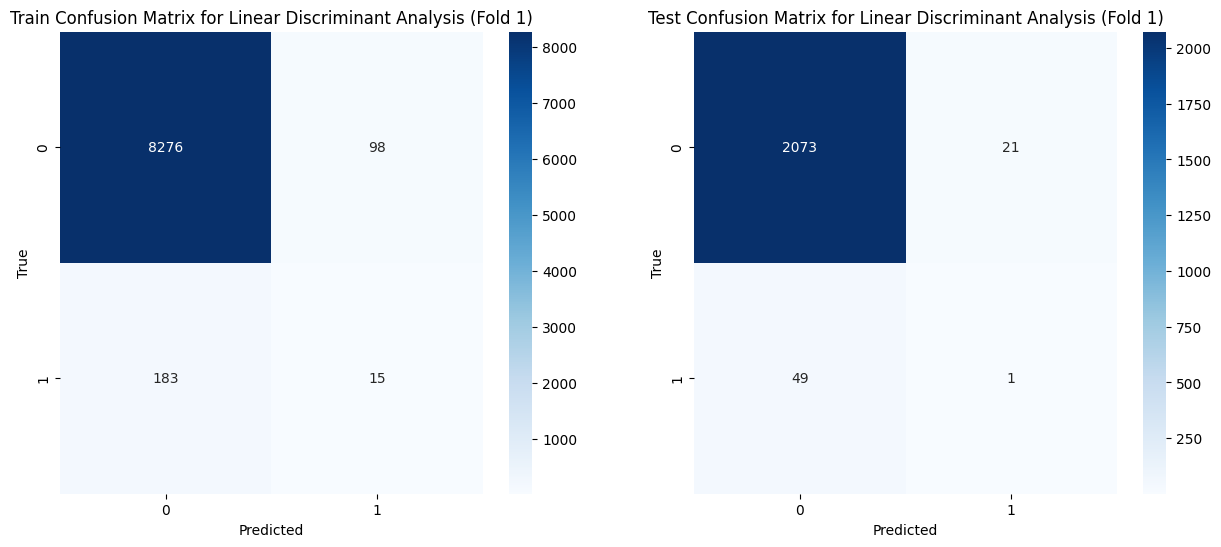

Linear Discriminant Analysis - Fold 1:
Train F1 Score: 0.96
Test F1 Score: 0.96
Precision: 0.9588
Recall: 0.9672
F1 Score: 0.9628
Accuracy: 0.9672
Precision: 0.9552
Recall: 0.9674
F1 Score: 0.9611
Accuracy: 0.9674
Train AUC: 0.85
Test AUC: 0.81


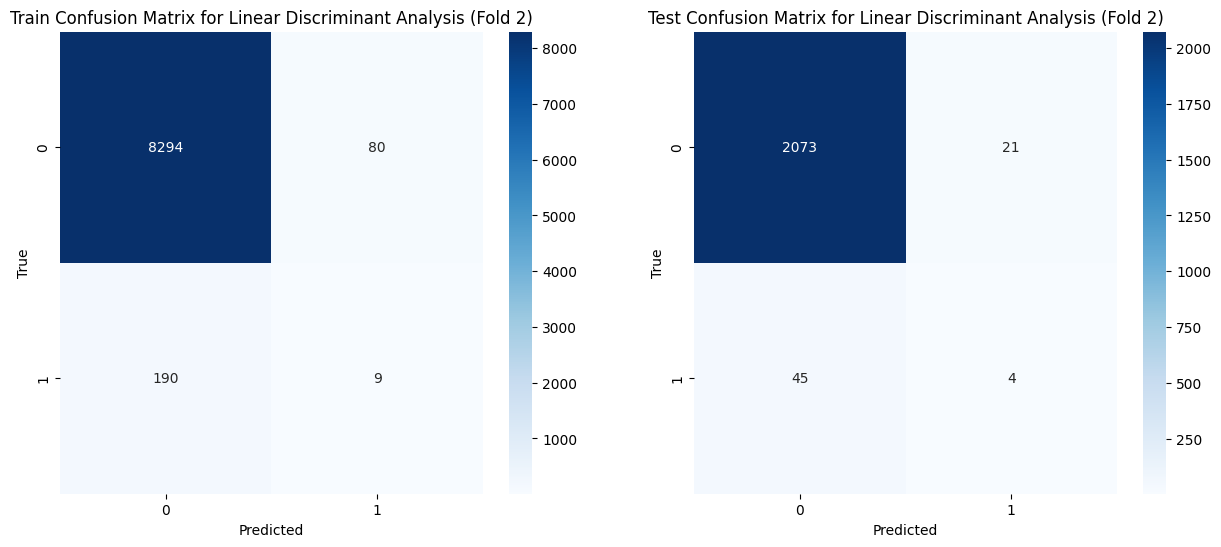

Linear Discriminant Analysis - Fold 2:
Train F1 Score: 0.96
Test F1 Score: 0.96
Precision: 0.9573
Recall: 0.9685
F1 Score: 0.9626
Accuracy: 0.9685
Precision: 0.9600
Recall: 0.9692
F1 Score: 0.9643
Accuracy: 0.9692
Train AUC: 0.83
Test AUC: 0.88


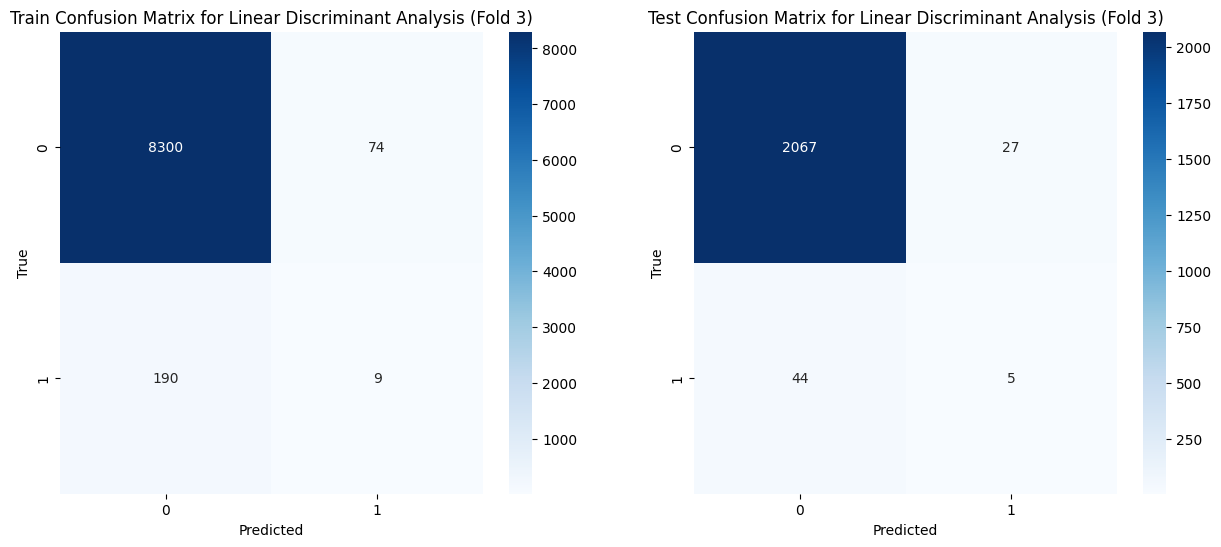

Linear Discriminant Analysis - Fold 3:
Train F1 Score: 0.96
Test F1 Score: 0.96
Precision: 0.9574
Recall: 0.9692
F1 Score: 0.9630
Accuracy: 0.9692
Precision: 0.9603
Recall: 0.9669
F1 Score: 0.9635
Accuracy: 0.9669
Train AUC: 0.84
Test AUC: 0.83


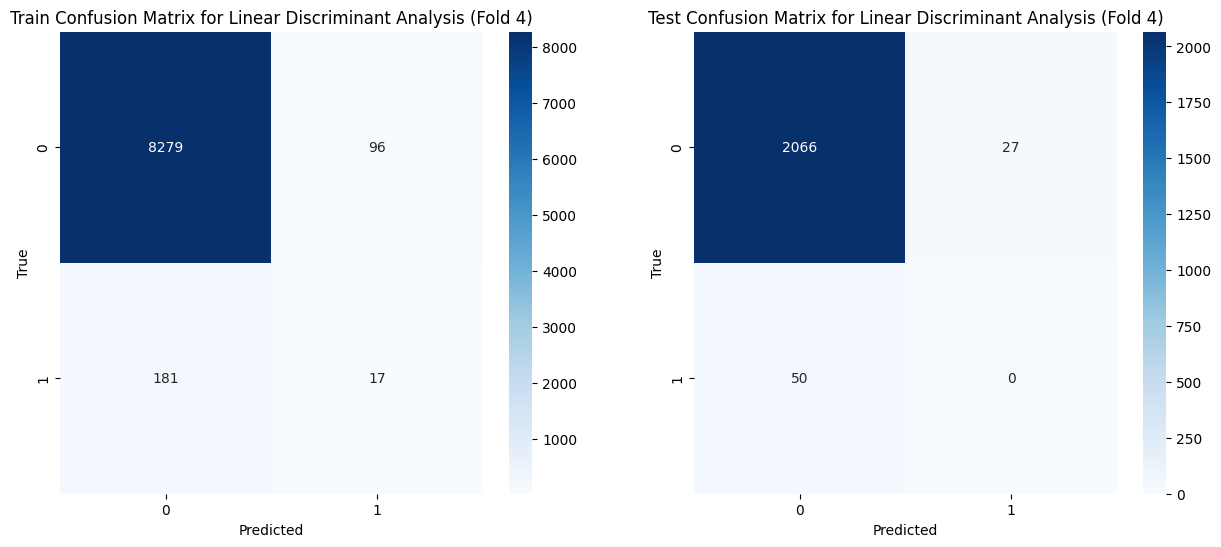

Linear Discriminant Analysis - Fold 4:
Train F1 Score: 0.96
Test F1 Score: 0.96
Precision: 0.9595
Recall: 0.9677
F1 Score: 0.9634
Accuracy: 0.9677
Precision: 0.9536
Recall: 0.9641
F1 Score: 0.9588
Accuracy: 0.9641
Train AUC: 0.84
Test AUC: 0.81


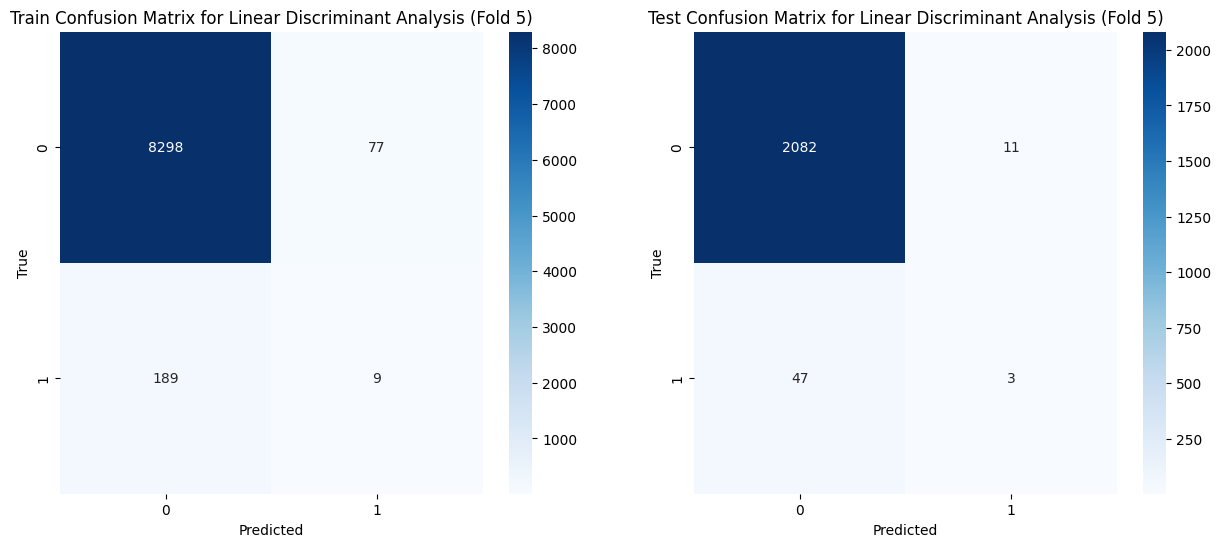

Linear Discriminant Analysis - Fold 5:
Train F1 Score: 0.96
Test F1 Score: 0.97
Precision: 0.9576
Recall: 0.9690
F1 Score: 0.9630
Accuracy: 0.9690
Precision: 0.9601
Recall: 0.9729
F1 Score: 0.9654
Accuracy: 0.9729
Train AUC: 0.84
Test AUC: 0.85


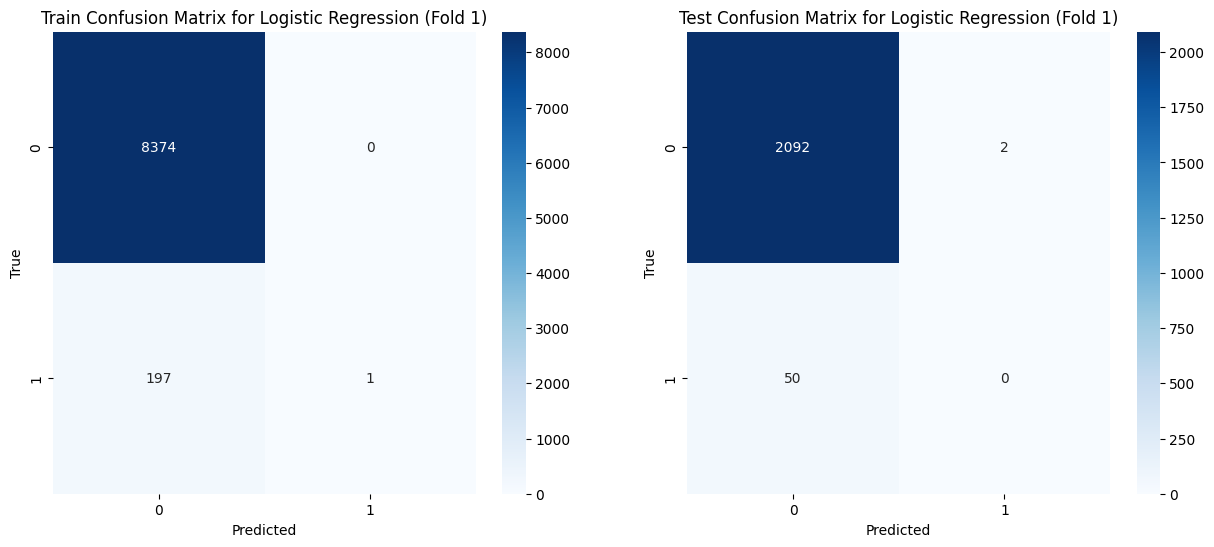

Logistic Regression - Fold 1:
Train F1 Score: 0.97
Test F1 Score: 0.96
Precision: 0.9775
Recall: 0.9770
F1 Score: 0.9658
Accuracy: 0.9770
Precision: 0.9539
Recall: 0.9757
F1 Score: 0.9647
Accuracy: 0.9757
Train AUC: 0.84
Test AUC: 0.83


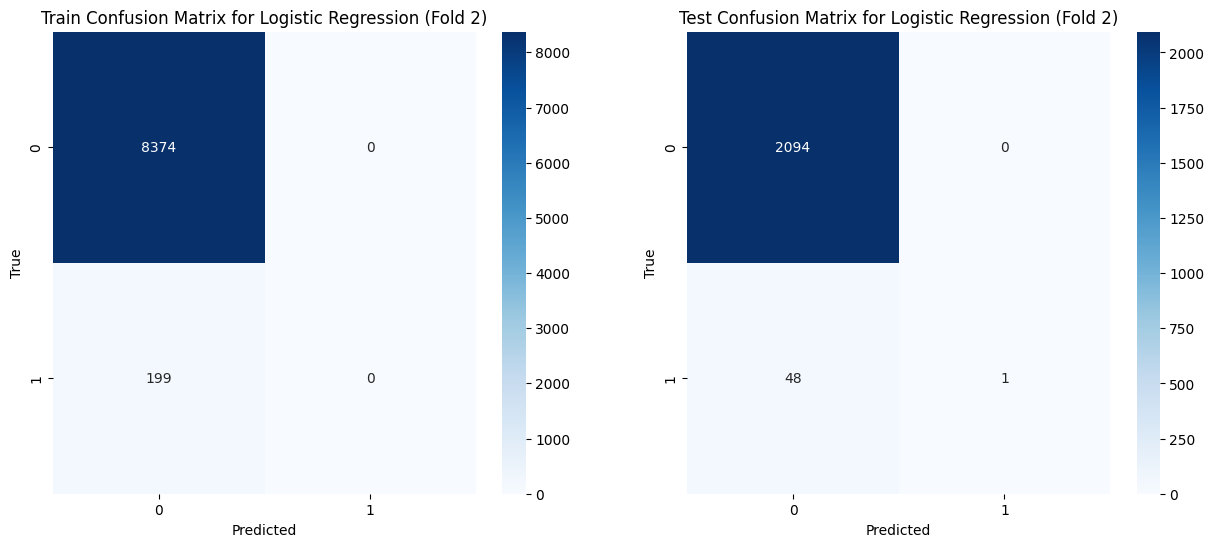

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Logistic Regression - Fold 2:
Train F1 Score: 0.97
Test F1 Score: 0.97
Precision: 0.9541
Recall: 0.9768
F1 Score: 0.9653
Accuracy: 0.9768
Precision: 0.9781
Recall: 0.9776
F1 Score: 0.9670
Accuracy: 0.9776
Train AUC: 0.83
Test AUC: 0.89


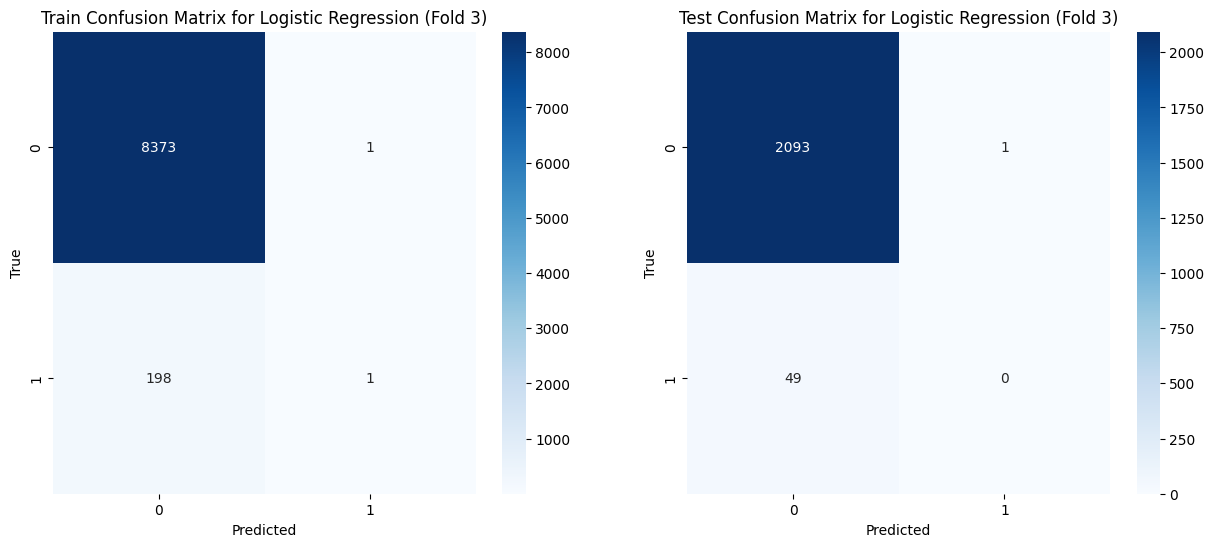

Logistic Regression - Fold 3:
Train F1 Score: 0.97
Test F1 Score: 0.97
Precision: 0.9658
Recall: 0.9768
F1 Score: 0.9655
Accuracy: 0.9768
Precision: 0.9548
Recall: 0.9767
F1 Score: 0.9656
Accuracy: 0.9767
Train AUC: 0.84
Test AUC: 0.81


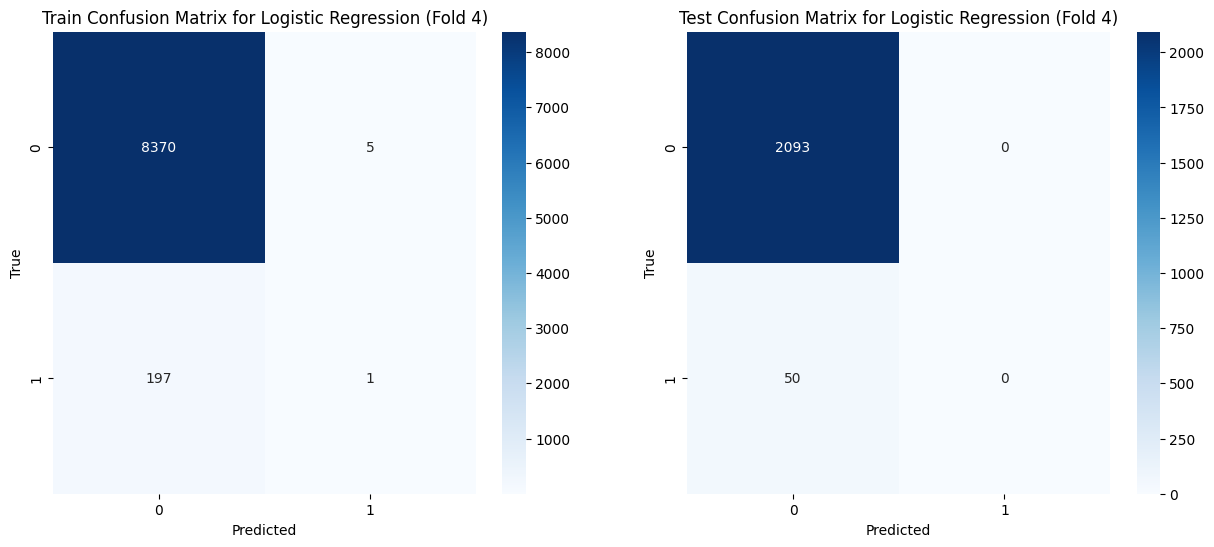

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Logistic Regression - Fold 4:
Train F1 Score: 0.97
Test F1 Score: 0.97
Precision: 0.9583
Recall: 0.9764
F1 Score: 0.9655
Accuracy: 0.9764
Precision: 0.9539
Recall: 0.9767
F1 Score: 0.9651
Accuracy: 0.9767
Train AUC: 0.85
Test AUC: 0.80


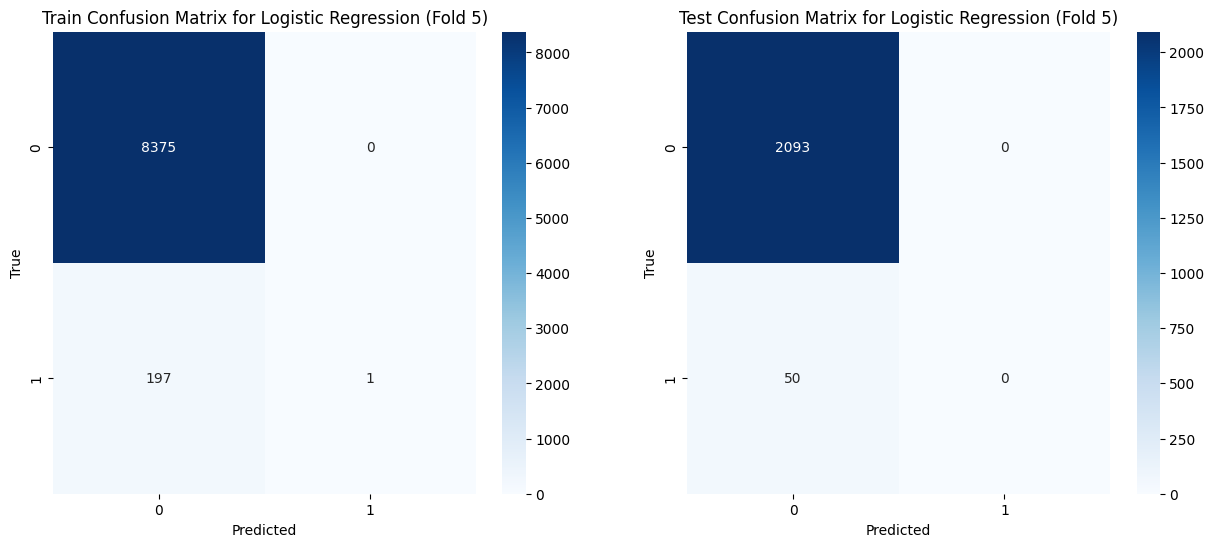

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Logistic Regression - Fold 5:
Train F1 Score: 0.97
Test F1 Score: 0.97
Precision: 0.9775
Recall: 0.9770
F1 Score: 0.9658
Accuracy: 0.9770
Precision: 0.9539
Recall: 0.9767
F1 Score: 0.9651
Accuracy: 0.9767
Train AUC: 0.83
Test AUC: 0.84


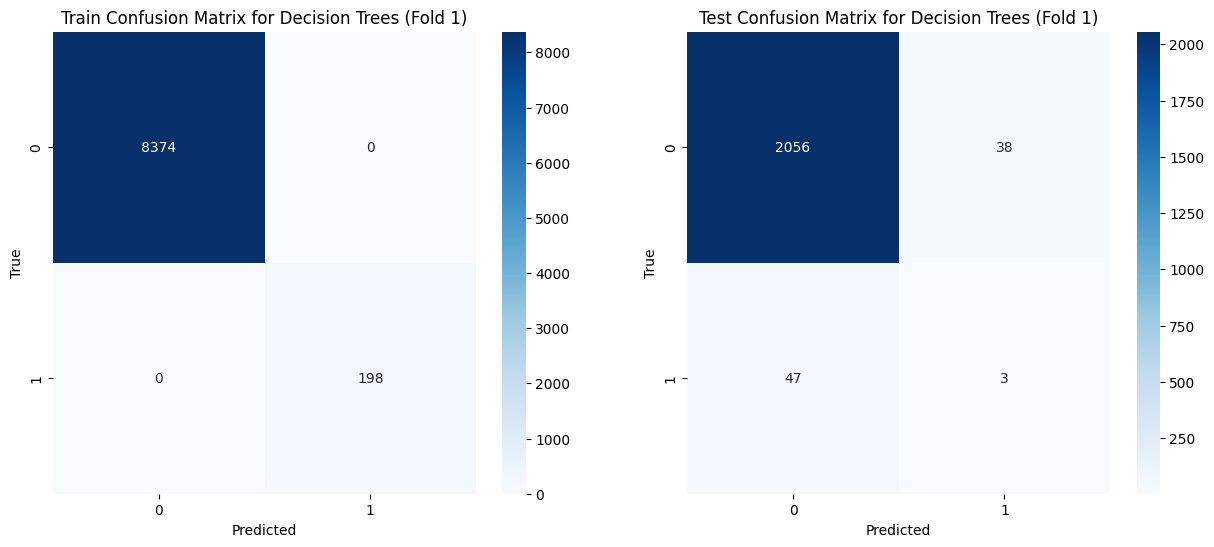

Decision Trees - Fold 1:
Train F1 Score: 1.00
Test F1 Score: 0.96
Precision: 1.0000
Recall: 1.0000
F1 Score: 1.0000
Accuracy: 1.0000
Precision: 0.9566
Recall: 0.9604
F1 Score: 0.9584
Accuracy: 0.9604
Train AUC: 1.00
Test AUC: 0.52


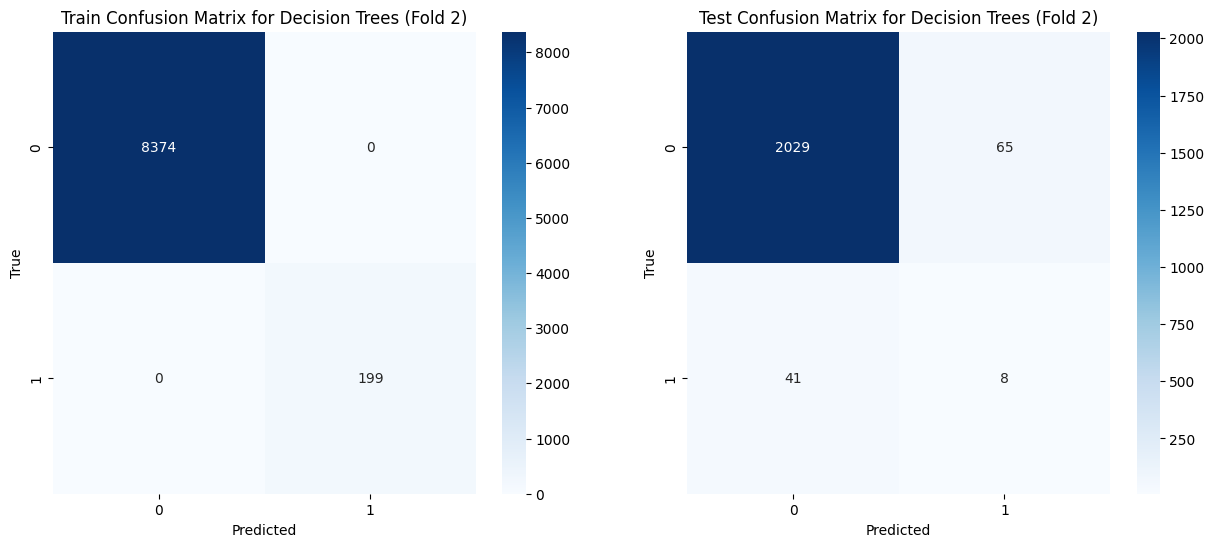

Decision Trees - Fold 2:
Train F1 Score: 1.00
Test F1 Score: 0.96
Precision: 1.0000
Recall: 1.0000
F1 Score: 1.0000
Accuracy: 1.0000
Precision: 0.9603
Recall: 0.9505
F1 Score: 0.9553
Accuracy: 0.9505
Train AUC: 1.00
Test AUC: 0.57


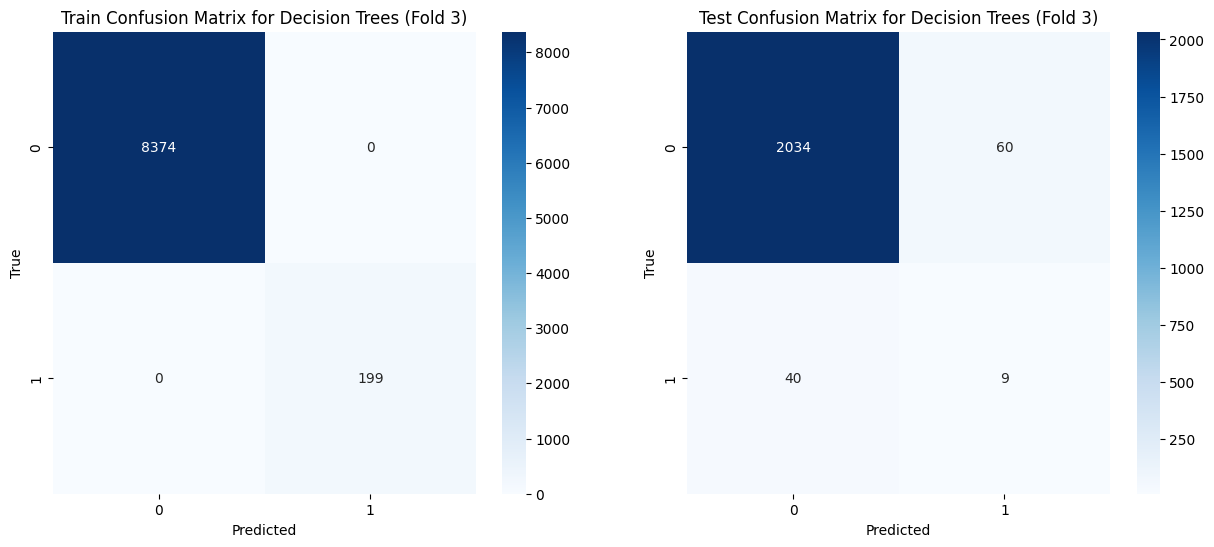

Decision Trees - Fold 3:
Train F1 Score: 1.00
Test F1 Score: 0.96
Precision: 1.0000
Recall: 1.0000
F1 Score: 1.0000
Accuracy: 1.0000
Precision: 0.9613
Recall: 0.9533
F1 Score: 0.9572
Accuracy: 0.9533
Train AUC: 1.00
Test AUC: 0.58


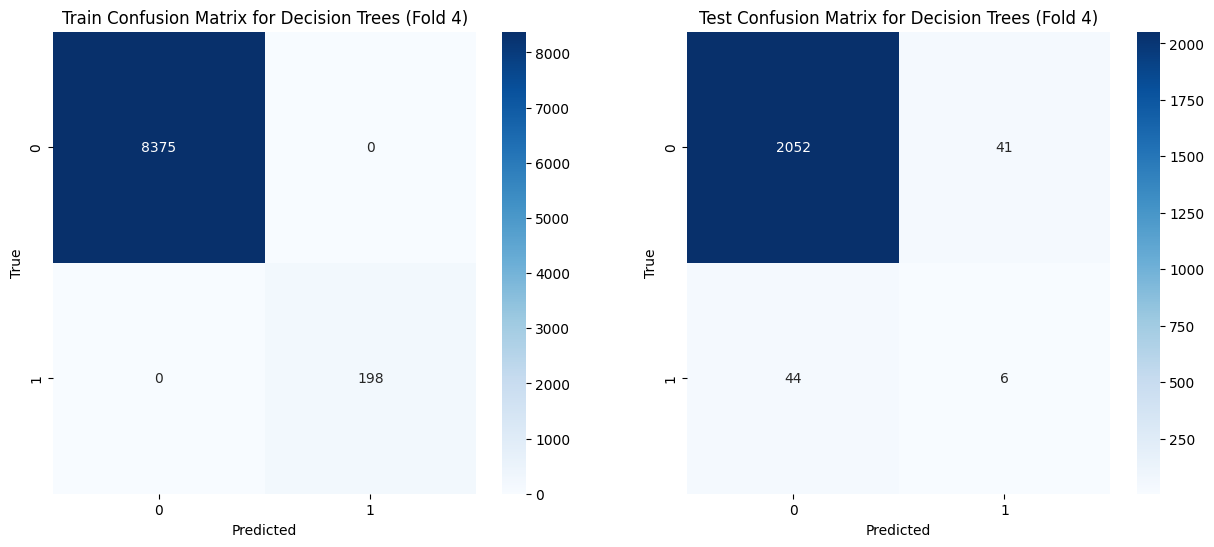

Decision Trees - Fold 4:
Train F1 Score: 1.00
Test F1 Score: 0.96
Precision: 1.0000
Recall: 1.0000
F1 Score: 1.0000
Accuracy: 1.0000
Precision: 0.9591
Recall: 0.9603
F1 Score: 0.9597
Accuracy: 0.9603
Train AUC: 1.00
Test AUC: 0.55


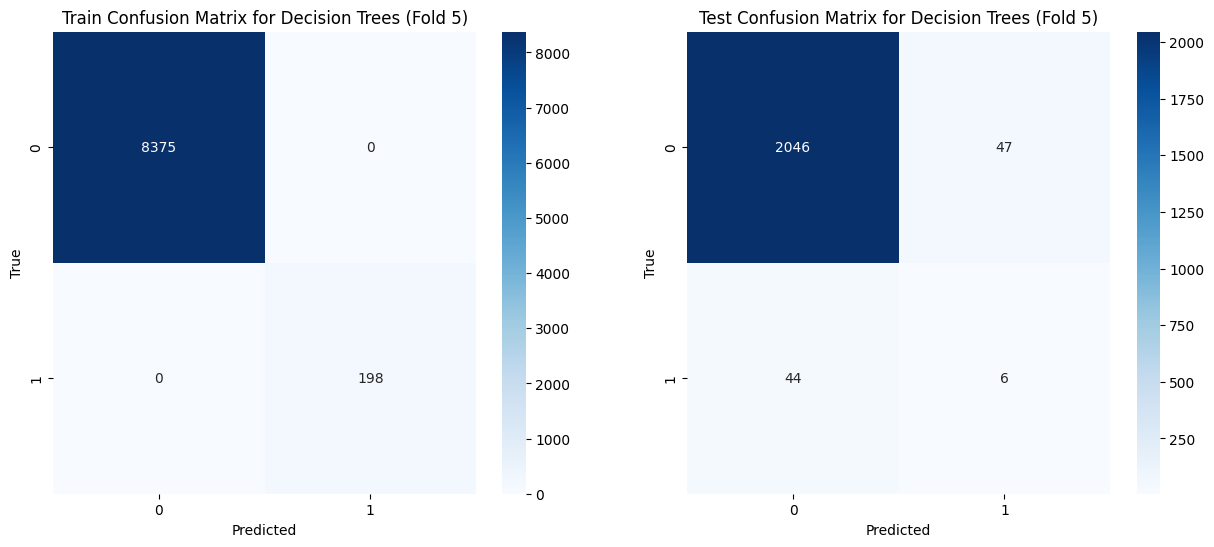

Decision Trees - Fold 5:
Train F1 Score: 1.00
Test F1 Score: 0.96
Precision: 1.0000
Recall: 1.0000
F1 Score: 1.0000
Accuracy: 1.0000
Precision: 0.9587
Recall: 0.9575
F1 Score: 0.9581
Accuracy: 0.9575
Train AUC: 1.00
Test AUC: 0.55


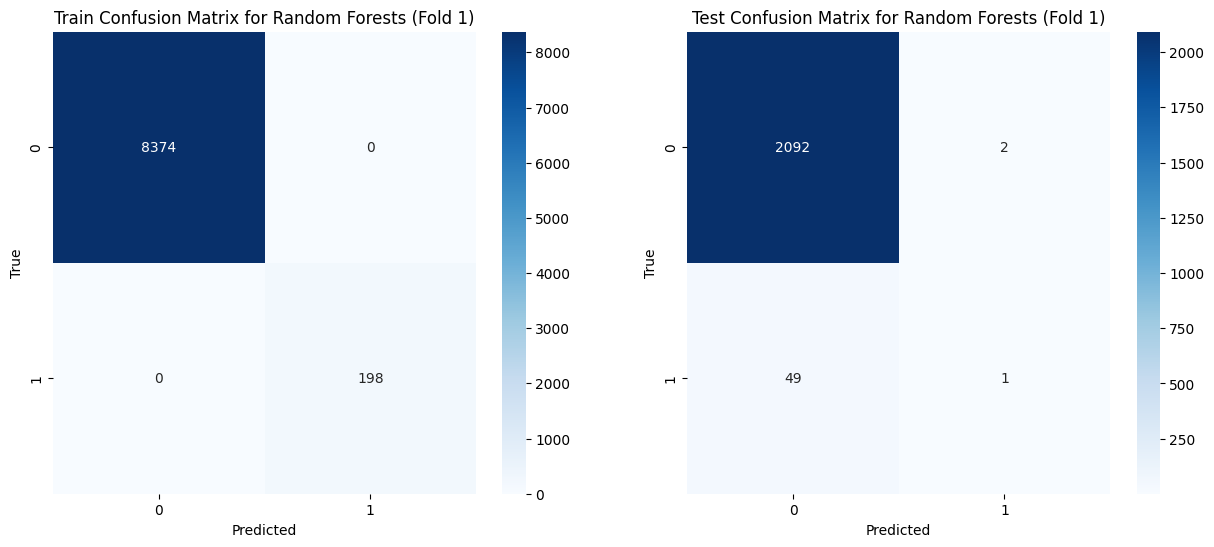

Random Forests - Fold 1:
Train F1 Score: 1.00
Test F1 Score: 0.97
Precision: 1.0000
Recall: 1.0000
F1 Score: 1.0000
Accuracy: 1.0000
Precision: 0.9621
Recall: 0.9762
F1 Score: 0.9658
Accuracy: 0.9762
Train AUC: 1.00
Test AUC: 0.83


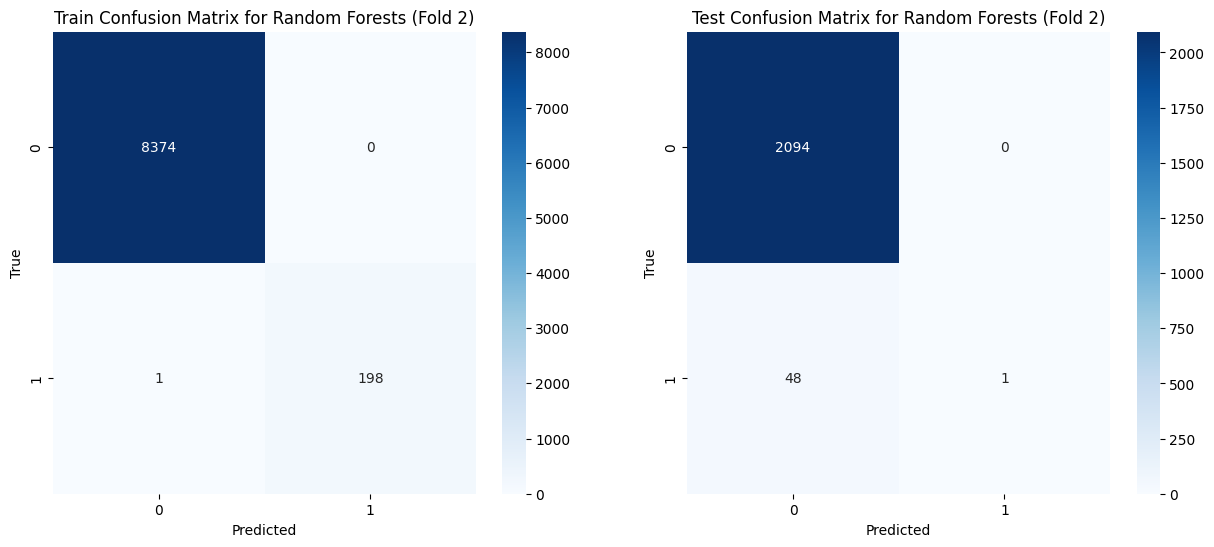

Random Forests - Fold 2:
Train F1 Score: 1.00
Test F1 Score: 0.97
Precision: 0.9999
Recall: 0.9999
F1 Score: 0.9999
Accuracy: 0.9999
Precision: 0.9781
Recall: 0.9776
F1 Score: 0.9670
Accuracy: 0.9776
Train AUC: 1.00
Test AUC: 0.89


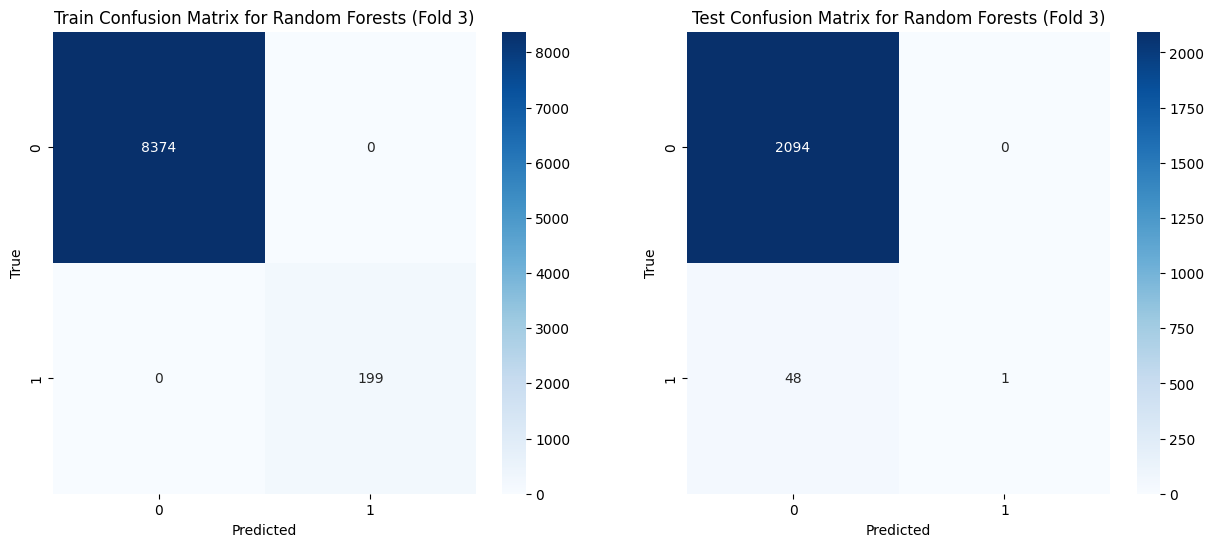

Random Forests - Fold 3:
Train F1 Score: 1.00
Test F1 Score: 0.97
Precision: 1.0000
Recall: 1.0000
F1 Score: 1.0000
Accuracy: 1.0000
Precision: 0.9781
Recall: 0.9776
F1 Score: 0.9670
Accuracy: 0.9776
Train AUC: 1.00
Test AUC: 0.79


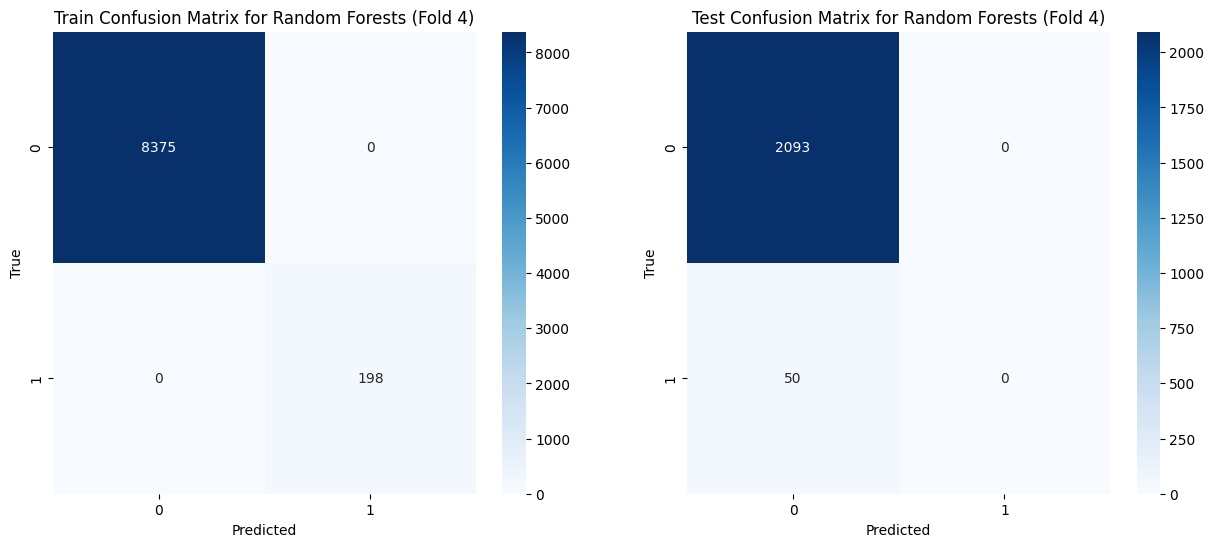

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Random Forests - Fold 4:
Train F1 Score: 1.00
Test F1 Score: 0.97
Precision: 1.0000
Recall: 1.0000
F1 Score: 1.0000
Accuracy: 1.0000
Precision: 0.9539
Recall: 0.9767
F1 Score: 0.9651
Accuracy: 0.9767
Train AUC: 1.00
Test AUC: 0.76


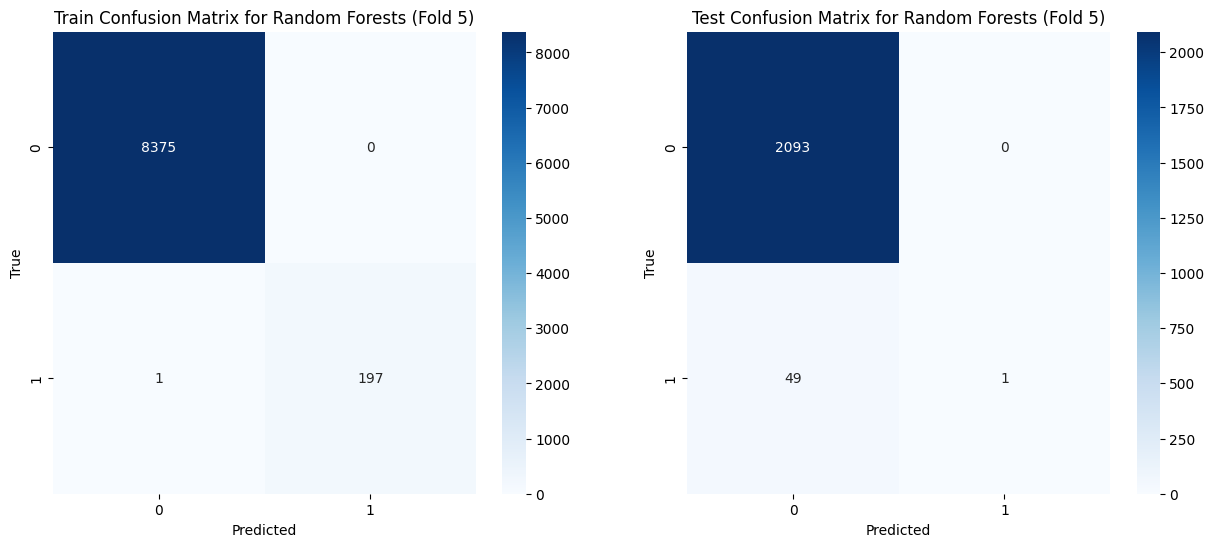

Random Forests - Fold 5:
Train F1 Score: 1.00
Test F1 Score: 0.97
Precision: 0.9999
Recall: 0.9999
F1 Score: 0.9999
Accuracy: 0.9999
Precision: 0.9777
Recall: 0.9771
F1 Score: 0.9663
Accuracy: 0.9771
Train AUC: 1.00
Test AUC: 0.84


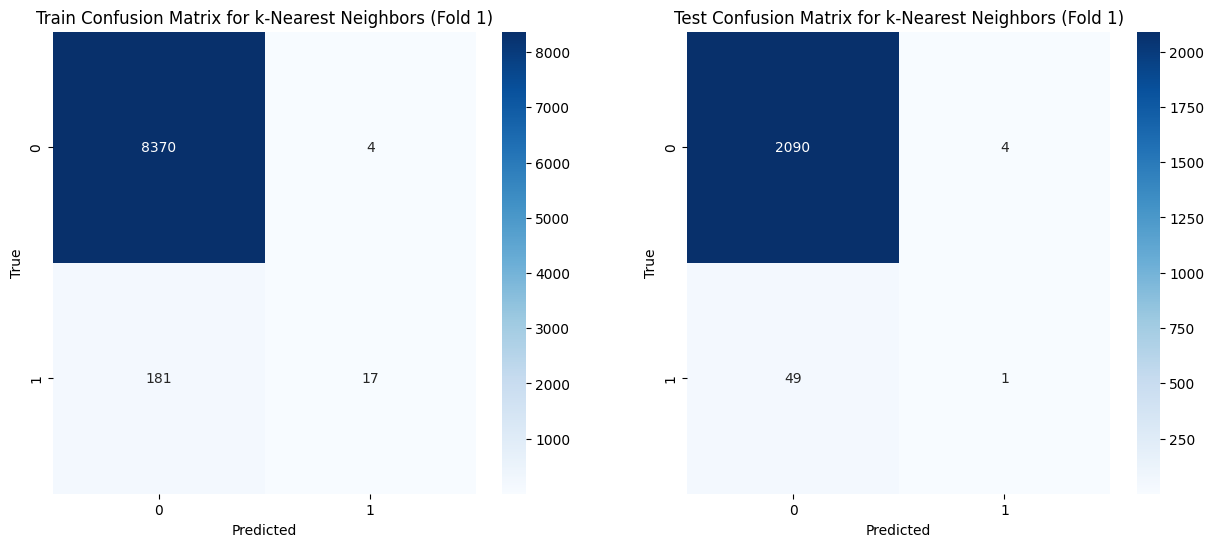

k-Nearest Neighbors - Fold 1:
Train F1 Score: 0.97
Test F1 Score: 0.97
Precision: 0.9749
Recall: 0.9784
F1 Score: 0.9698
Accuracy: 0.9784
Precision: 0.9590
Recall: 0.9753
F1 Score: 0.9653
Accuracy: 0.9753
Train AUC: 0.98
Test AUC: 0.66


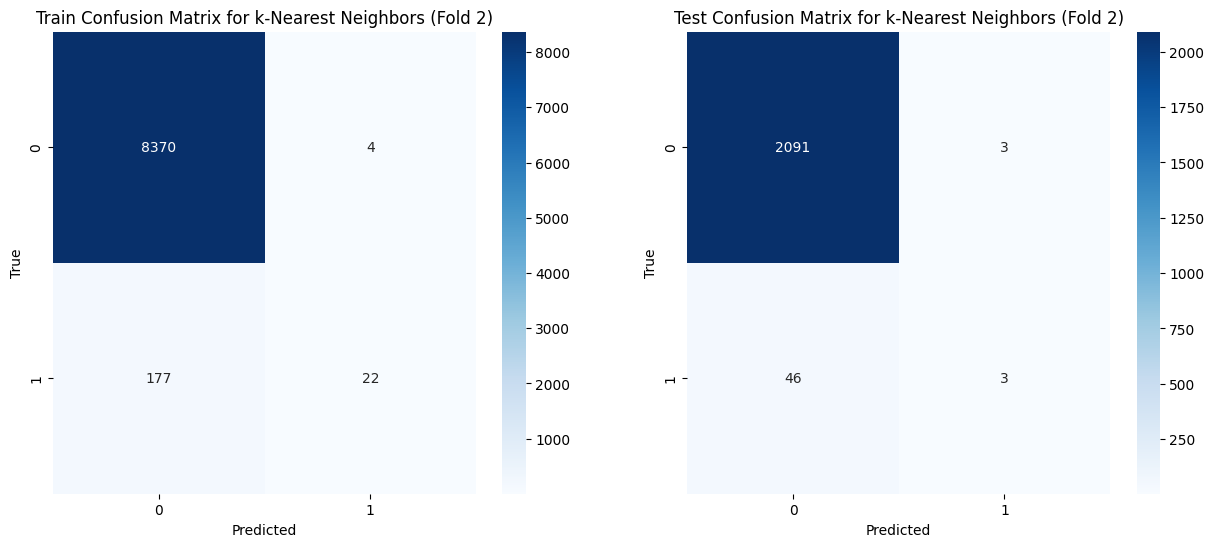

k-Nearest Neighbors - Fold 2:
Train F1 Score: 0.97
Test F1 Score: 0.97
Precision: 0.9762
Recall: 0.9789
F1 Score: 0.9709
Accuracy: 0.9789
Precision: 0.9675
Recall: 0.9771
F1 Score: 0.9683
Accuracy: 0.9771
Train AUC: 0.97
Test AUC: 0.69


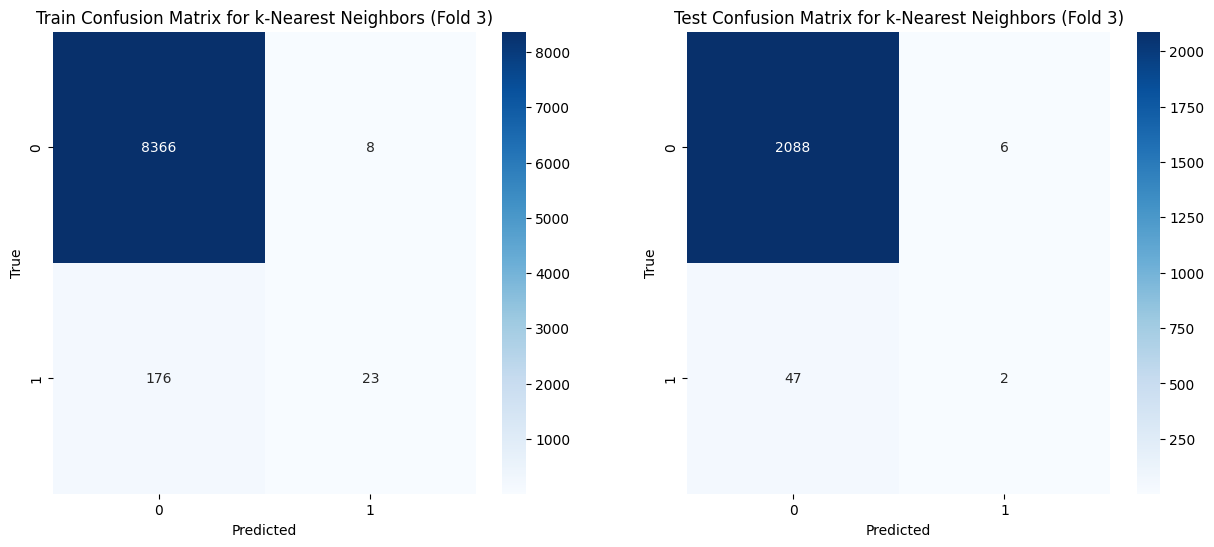

k-Nearest Neighbors - Fold 3:
Train F1 Score: 0.97
Test F1 Score: 0.97
Precision: 0.9739
Recall: 0.9785
F1 Score: 0.9708
Accuracy: 0.9785
Precision: 0.9613
Recall: 0.9753
F1 Score: 0.9665
Accuracy: 0.9753
Train AUC: 0.98
Test AUC: 0.61


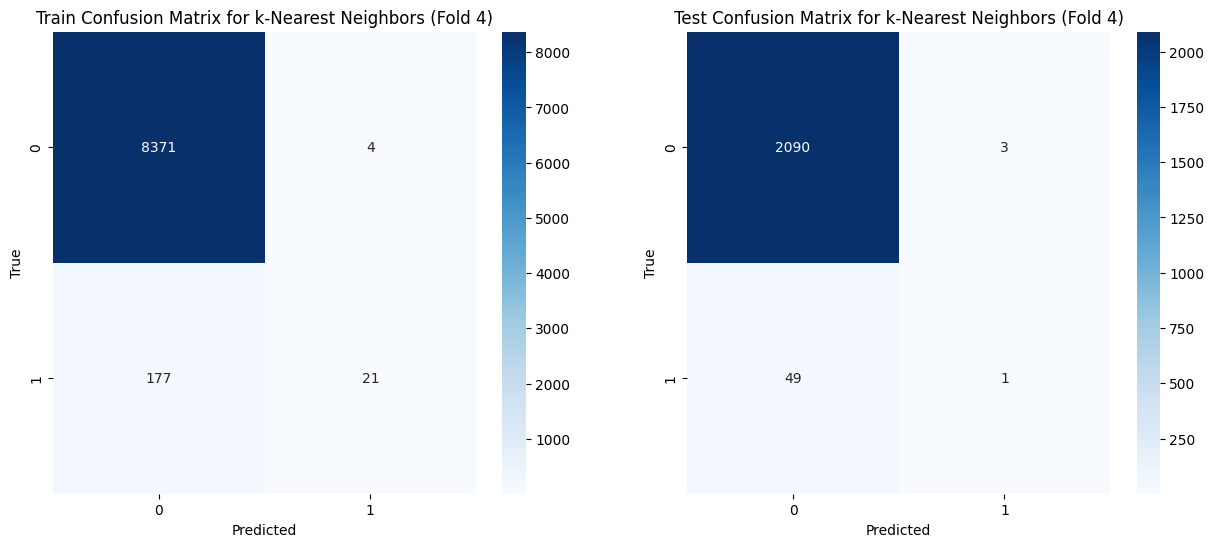

k-Nearest Neighbors - Fold 4:
Train F1 Score: 0.97
Test F1 Score: 0.97
Precision: 0.9761
Recall: 0.9789
F1 Score: 0.9708
Accuracy: 0.9789
Precision: 0.9601
Recall: 0.9757
F1 Score: 0.9655
Accuracy: 0.9757
Train AUC: 0.98
Test AUC: 0.66


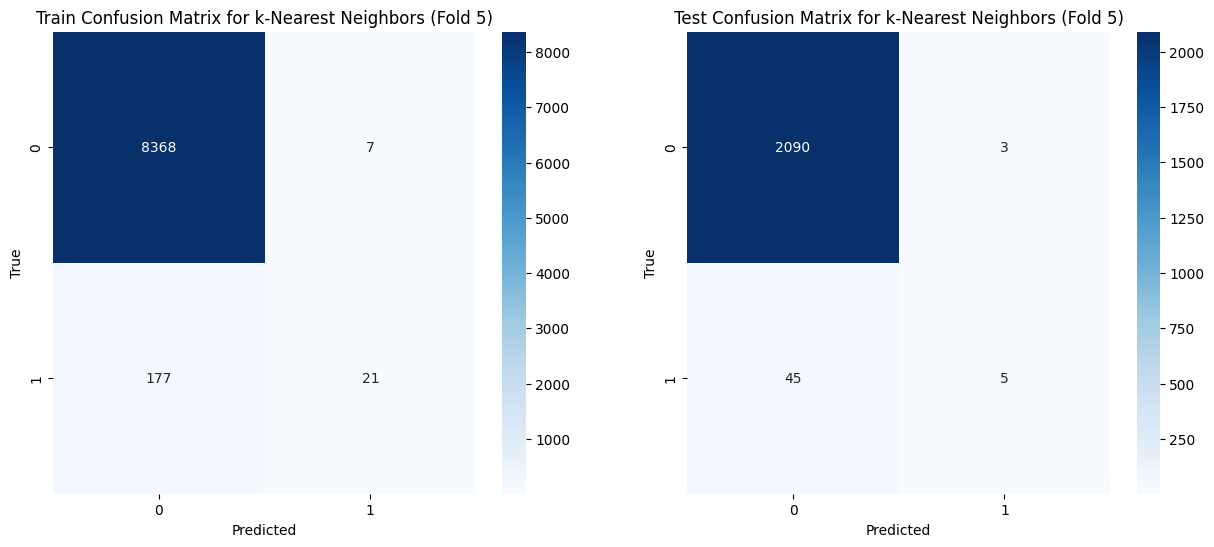

k-Nearest Neighbors - Fold 5:
Train F1 Score: 0.97
Test F1 Score: 0.97
Precision: 0.9740
Recall: 0.9785
F1 Score: 0.9706
Accuracy: 0.9785
Precision: 0.9707
Recall: 0.9776
F1 Score: 0.9696
Accuracy: 0.9776
Train AUC: 0.98
Test AUC: 0.66


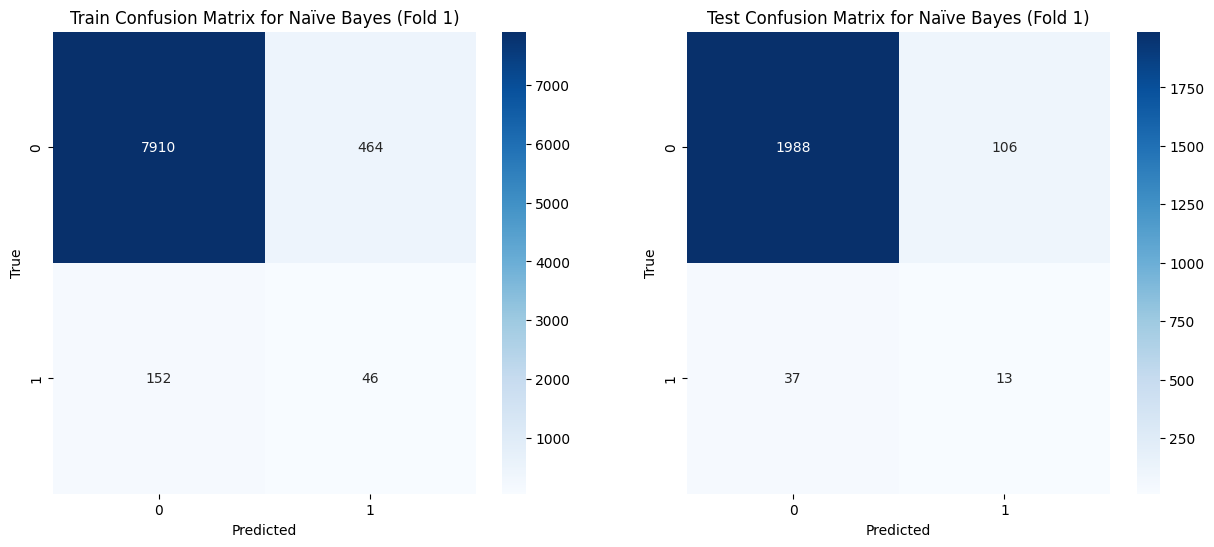

Naïve Bayes - Fold 1:
Train F1 Score: 0.94
Test F1 Score: 0.95
Precision: 0.9606
Recall: 0.9281
F1 Score: 0.9433
Accuracy: 0.9281
Precision: 0.9614
Recall: 0.9333
F1 Score: 0.9464
Accuracy: 0.9333
Train AUC: 0.83
Test AUC: 0.82


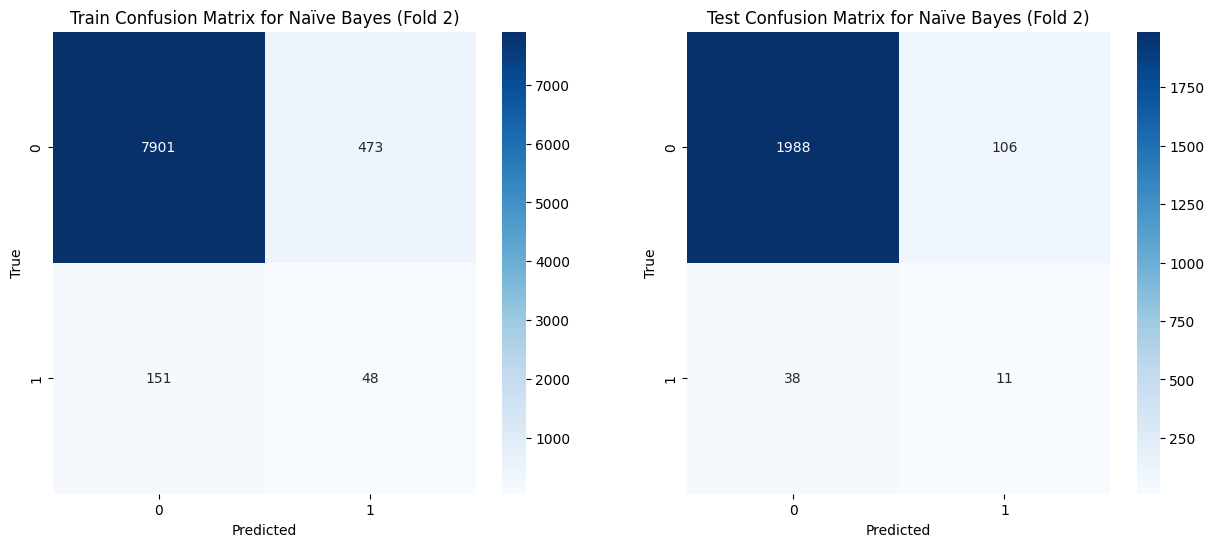

Naïve Bayes - Fold 2:
Train F1 Score: 0.94
Test F1 Score: 0.95
Precision: 0.9606
Recall: 0.9272
F1 Score: 0.9428
Accuracy: 0.9272
Precision: 0.9610
Recall: 0.9328
F1 Score: 0.9460
Accuracy: 0.9328
Train AUC: 0.81
Test AUC: 0.87


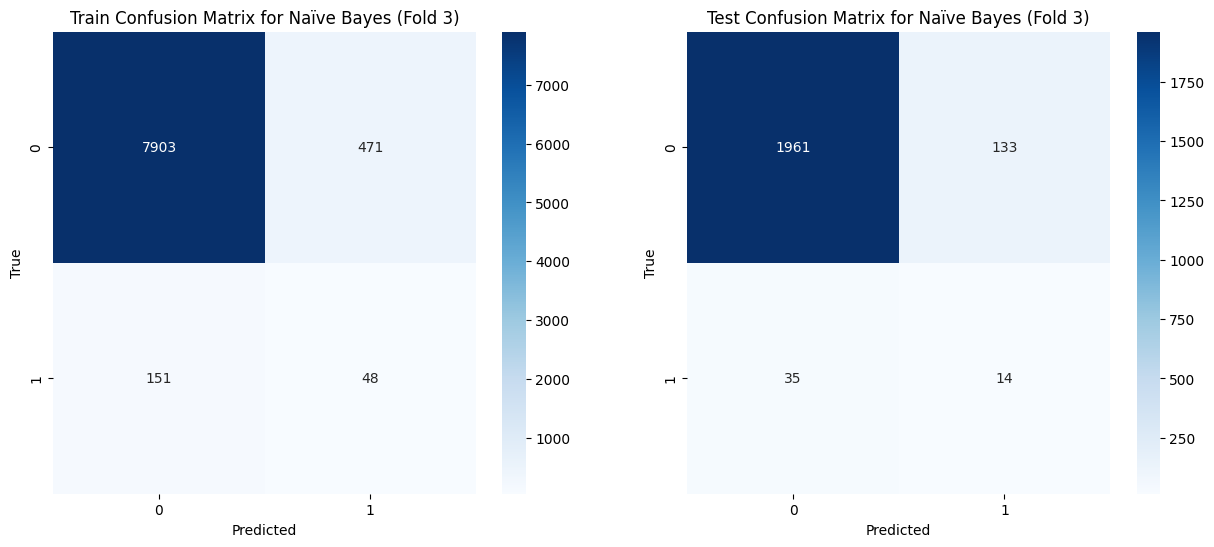

Naïve Bayes - Fold 3:
Train F1 Score: 0.94
Test F1 Score: 0.94
Precision: 0.9606
Recall: 0.9274
F1 Score: 0.9429
Accuracy: 0.9274
Precision: 0.9622
Recall: 0.9216
F1 Score: 0.9403
Accuracy: 0.9216
Train AUC: 0.83
Test AUC: 0.80


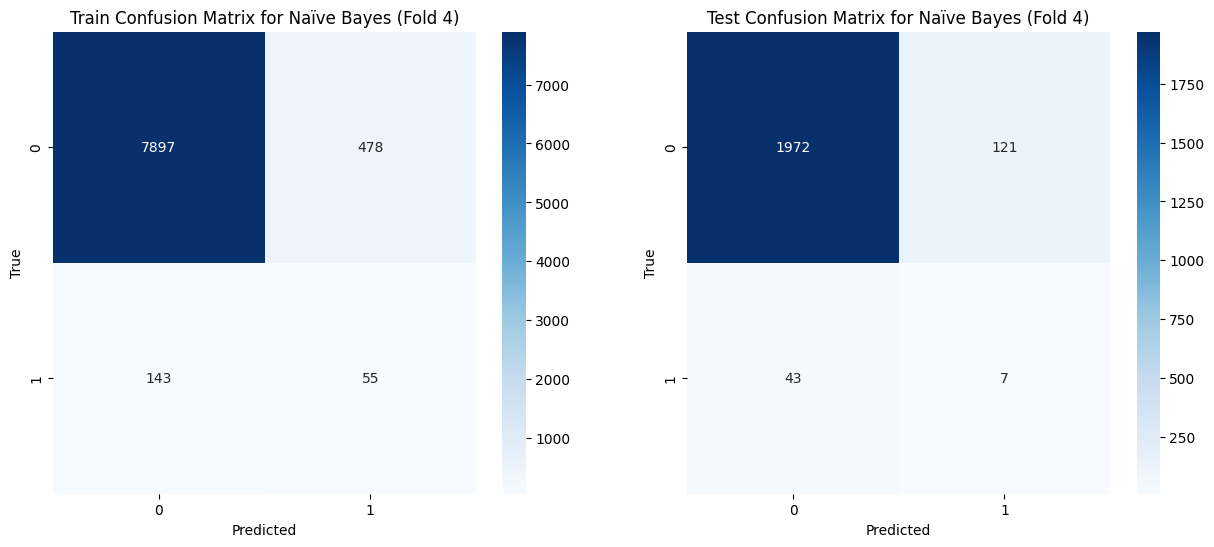

Naïve Bayes - Fold 4:
Train F1 Score: 0.94
Test F1 Score: 0.94
Precision: 0.9619
Recall: 0.9276
F1 Score: 0.9434
Accuracy: 0.9276
Precision: 0.9571
Recall: 0.9235
F1 Score: 0.9395
Accuracy: 0.9235
Train AUC: 0.84
Test AUC: 0.77


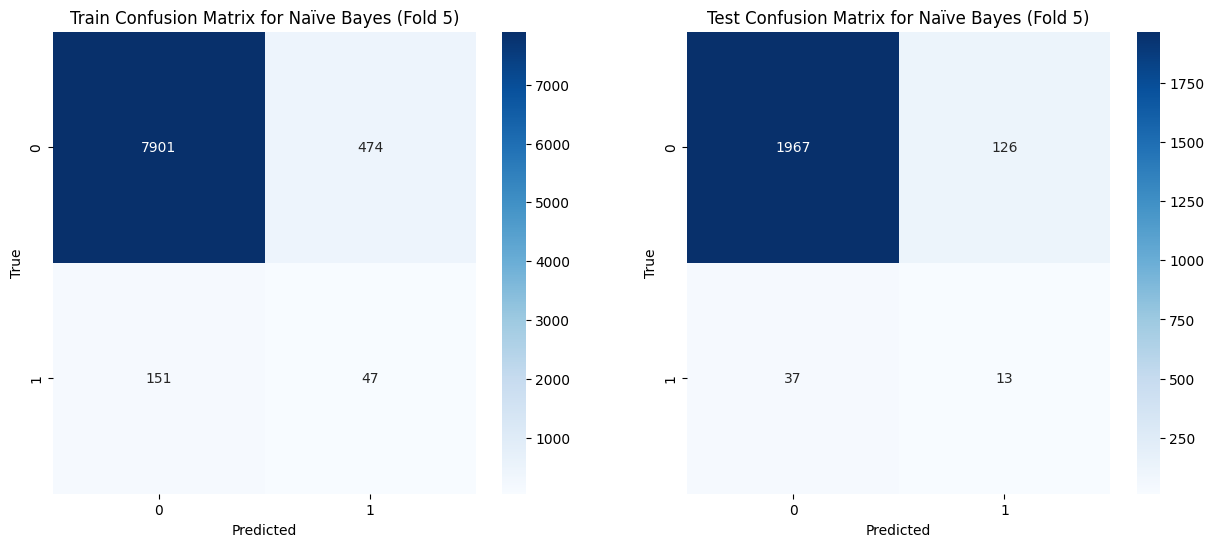

Naïve Bayes - Fold 5:
Train F1 Score: 0.94
Test F1 Score: 0.94
Precision: 0.9607
Recall: 0.9271
F1 Score: 0.9428
Accuracy: 0.9271
Precision: 0.9608
Recall: 0.9239
F1 Score: 0.9410
Accuracy: 0.9239
Train AUC: 0.82
Test AUC: 0.84


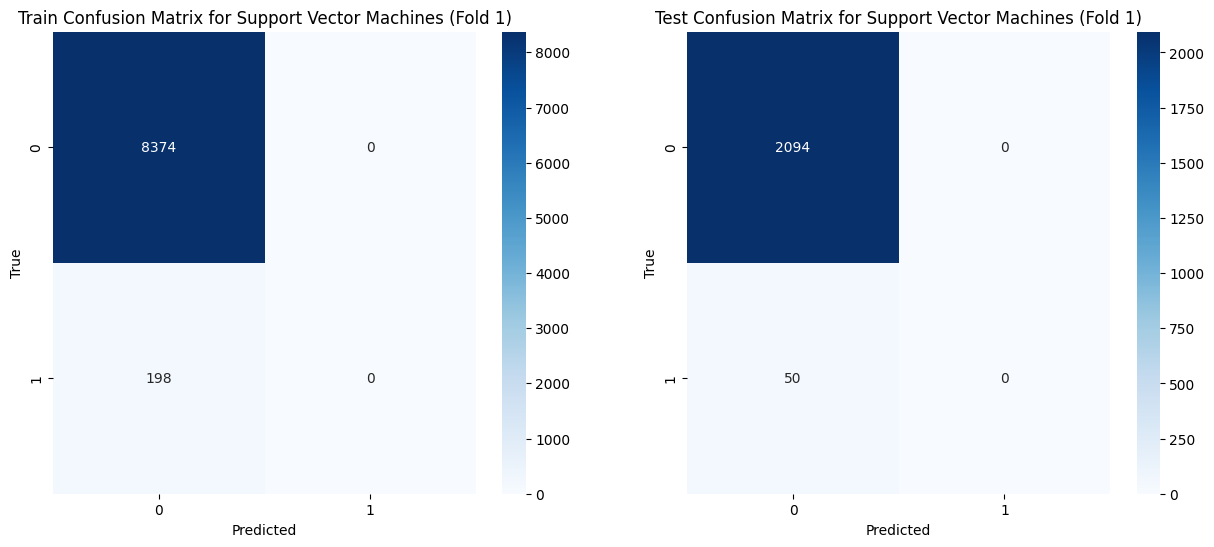

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Support Vector Machines - Fold 1:
Train F1 Score: 0.97
Test F1 Score: 0.97
Precision: 0.9543
Recall: 0.9769
F1 Score: 0.9655
Accuracy: 0.9769
Precision: 0.9539
Recall: 0.9767
F1 Score: 0.9652
Accuracy: 0.9767
Train AUC: 0.88
Test AUC: 0.70


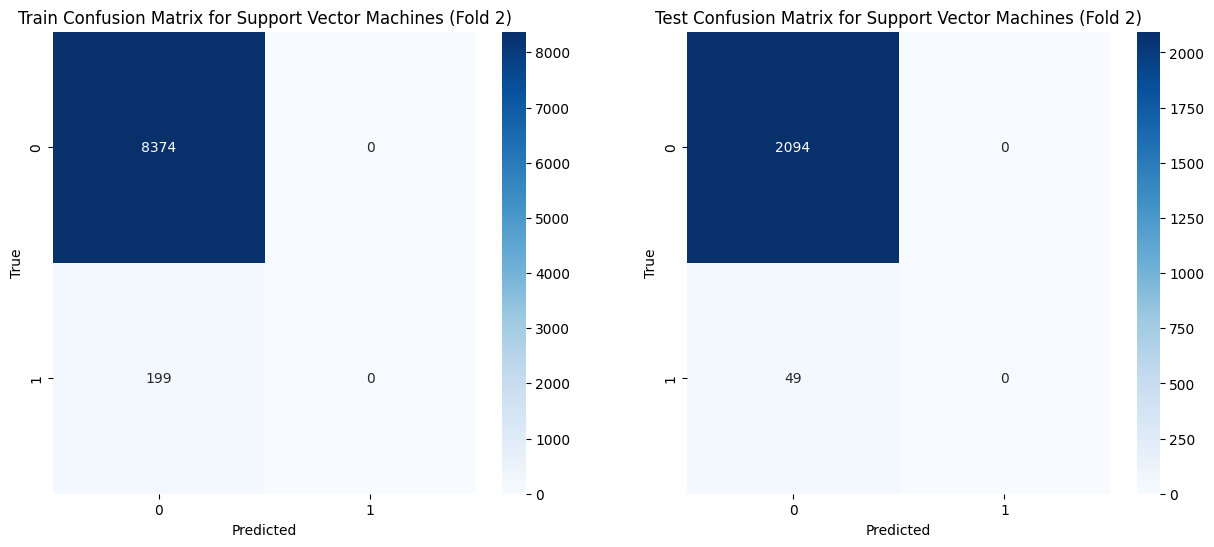

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Support Vector Machines - Fold 2:
Train F1 Score: 0.97
Test F1 Score: 0.97
Precision: 0.9541
Recall: 0.9768
F1 Score: 0.9653
Accuracy: 0.9768
Precision: 0.9548
Recall: 0.9771
F1 Score: 0.9658
Accuracy: 0.9771
Train AUC: 0.89
Test AUC: 0.72


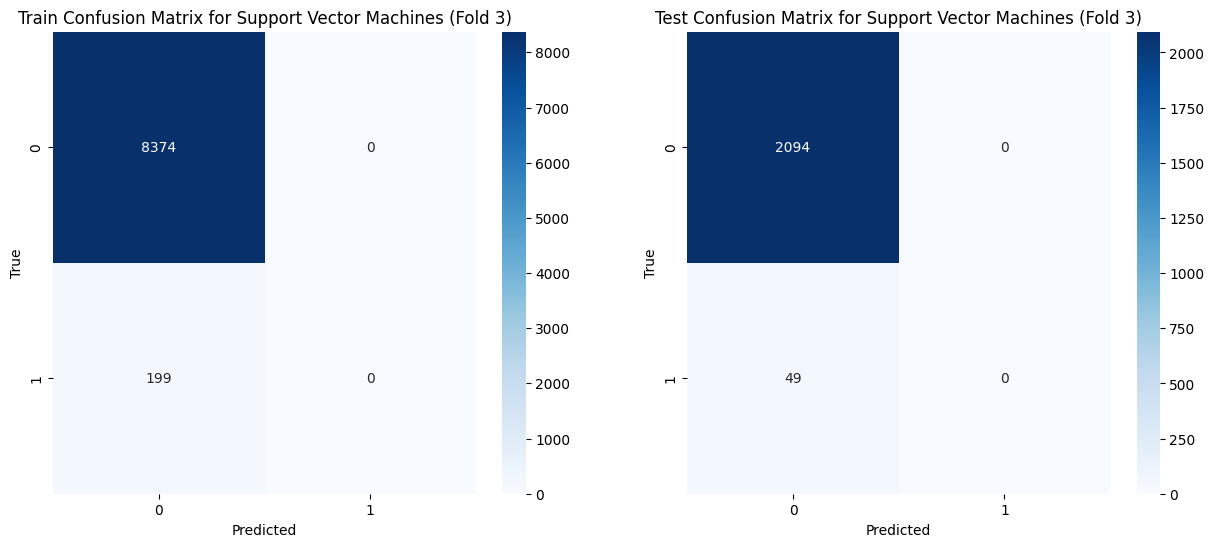

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Support Vector Machines - Fold 3:
Train F1 Score: 0.97
Test F1 Score: 0.97
Precision: 0.9541
Recall: 0.9768
F1 Score: 0.9653
Accuracy: 0.9768
Precision: 0.9548
Recall: 0.9771
F1 Score: 0.9658
Accuracy: 0.9771
Train AUC: 0.91
Test AUC: 0.65


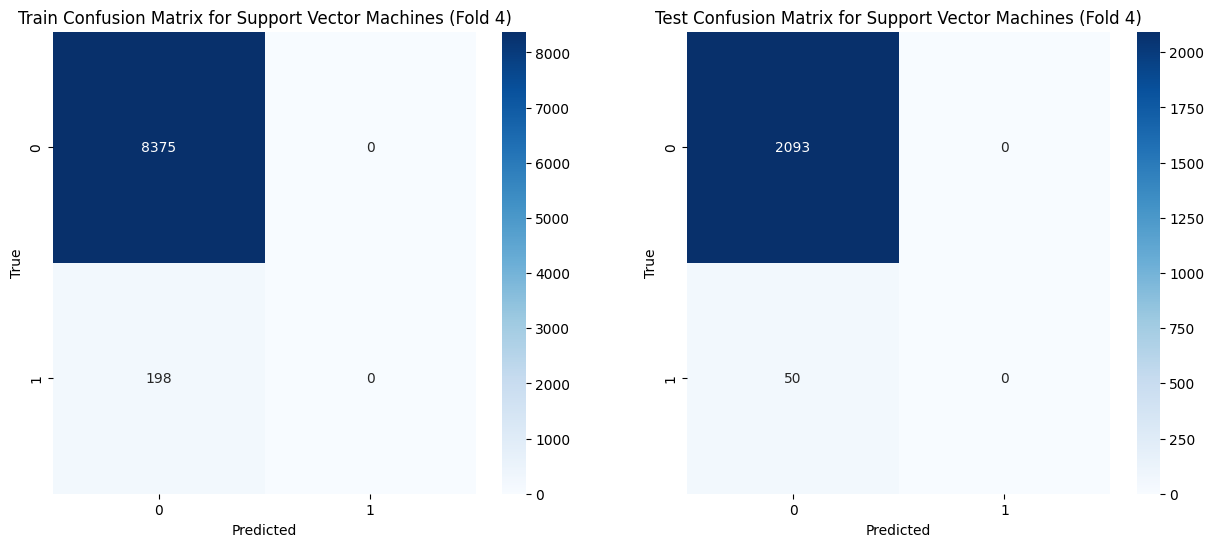

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Support Vector Machines - Fold 4:
Train F1 Score: 0.97
Test F1 Score: 0.97
Precision: 0.9543
Recall: 0.9769
F1 Score: 0.9655
Accuracy: 0.9769
Precision: 0.9539
Recall: 0.9767
F1 Score: 0.9651
Accuracy: 0.9767
Train AUC: 0.89
Test AUC: 0.74


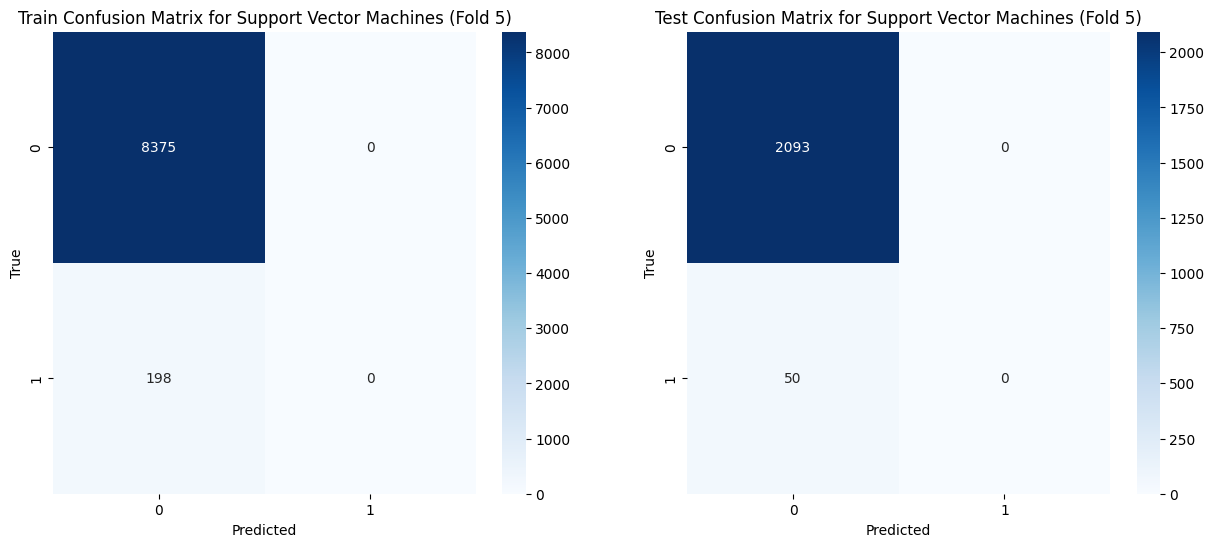

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Support Vector Machines - Fold 5:
Train F1 Score: 0.97
Test F1 Score: 0.97
Precision: 0.9543
Recall: 0.9769
F1 Score: 0.9655
Accuracy: 0.9769
Precision: 0.9539
Recall: 0.9767
F1 Score: 0.9651
Accuracy: 0.9767
Train AUC: 0.90
Test AUC: 0.74


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


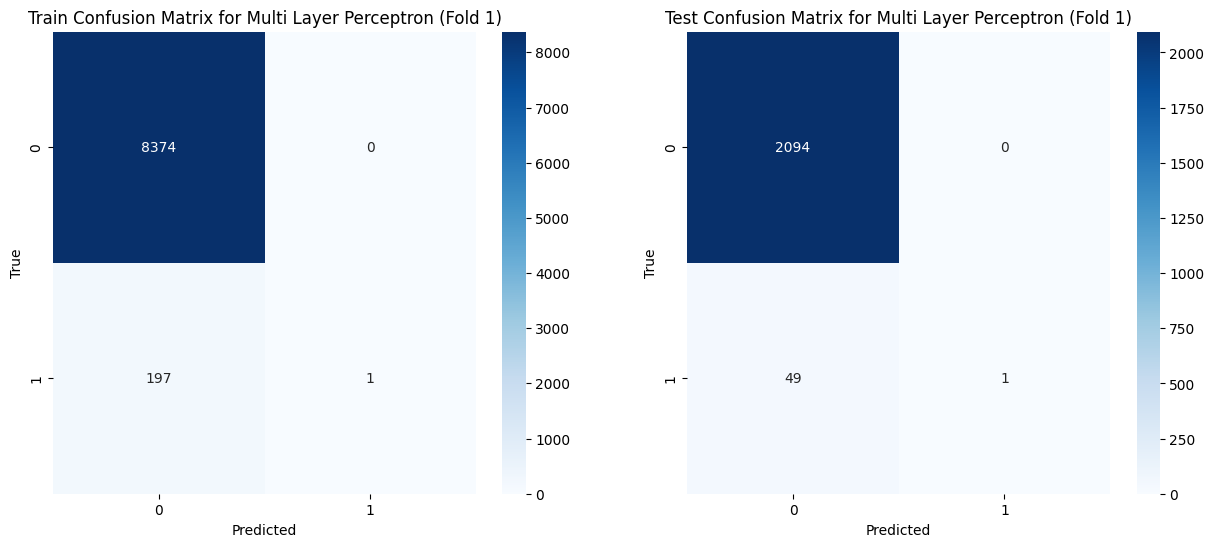

Multi Layer Perceptron - Fold 1:
Train F1 Score: 0.97
Test F1 Score: 0.97
Precision: 0.9775
Recall: 0.9770
F1 Score: 0.9658
Accuracy: 0.9770
Precision: 0.9777
Recall: 0.9771
F1 Score: 0.9663
Accuracy: 0.9771
Train AUC: 0.90
Test AUC: 0.84


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


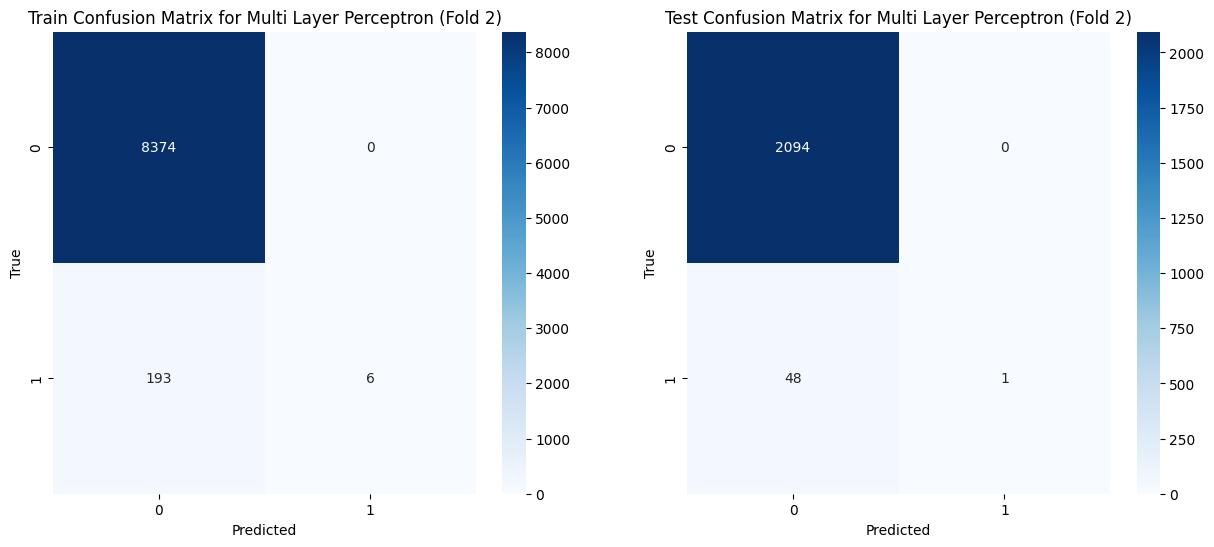

Multi Layer Perceptron - Fold 2:
Train F1 Score: 0.97
Test F1 Score: 0.97
Precision: 0.9780
Recall: 0.9775
F1 Score: 0.9670
Accuracy: 0.9775
Precision: 0.9781
Recall: 0.9776
F1 Score: 0.9670
Accuracy: 0.9776
Train AUC: 0.89
Test AUC: 0.90


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


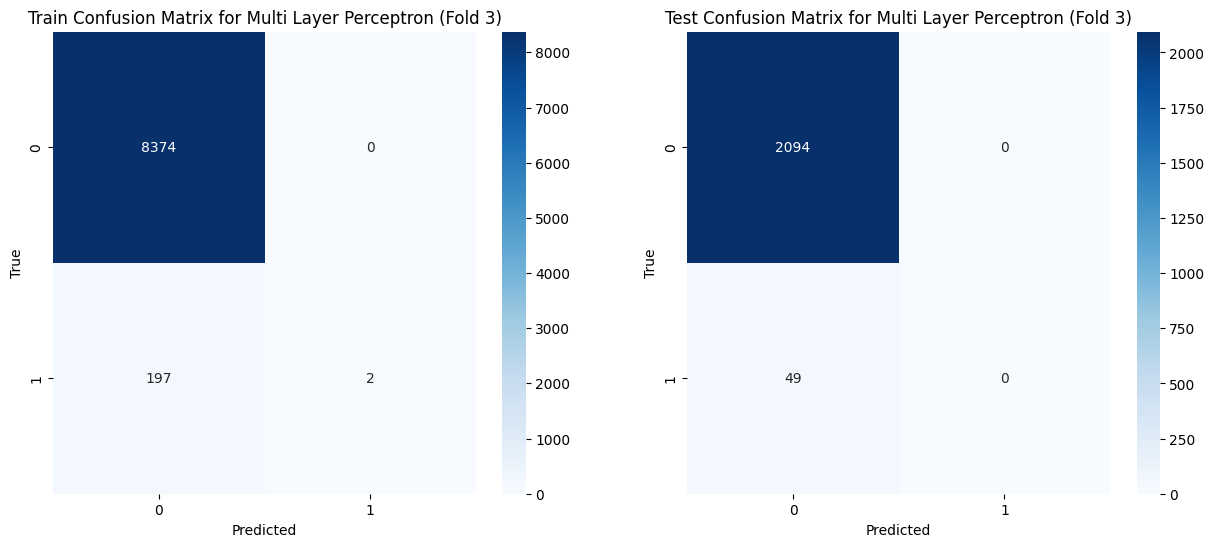

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Multi Layer Perceptron - Fold 3:
Train F1 Score: 0.97
Test F1 Score: 0.97
Precision: 0.9775
Recall: 0.9770
F1 Score: 0.9659
Accuracy: 0.9770
Precision: 0.9548
Recall: 0.9771
F1 Score: 0.9658
Accuracy: 0.9771
Train AUC: 0.90
Test AUC: 0.84


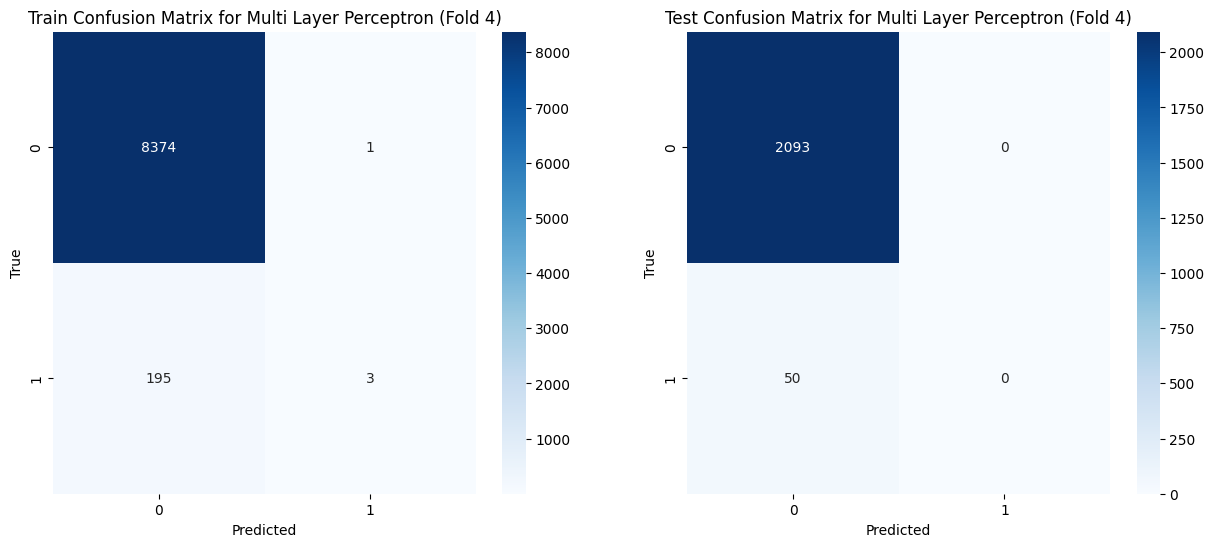

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Multi Layer Perceptron - Fold 4:
Train F1 Score: 0.97
Test F1 Score: 0.97
Precision: 0.9720
Recall: 0.9771
F1 Score: 0.9663
Accuracy: 0.9771
Precision: 0.9539
Recall: 0.9767
F1 Score: 0.9651
Accuracy: 0.9767
Train AUC: 0.90
Test AUC: 0.81


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


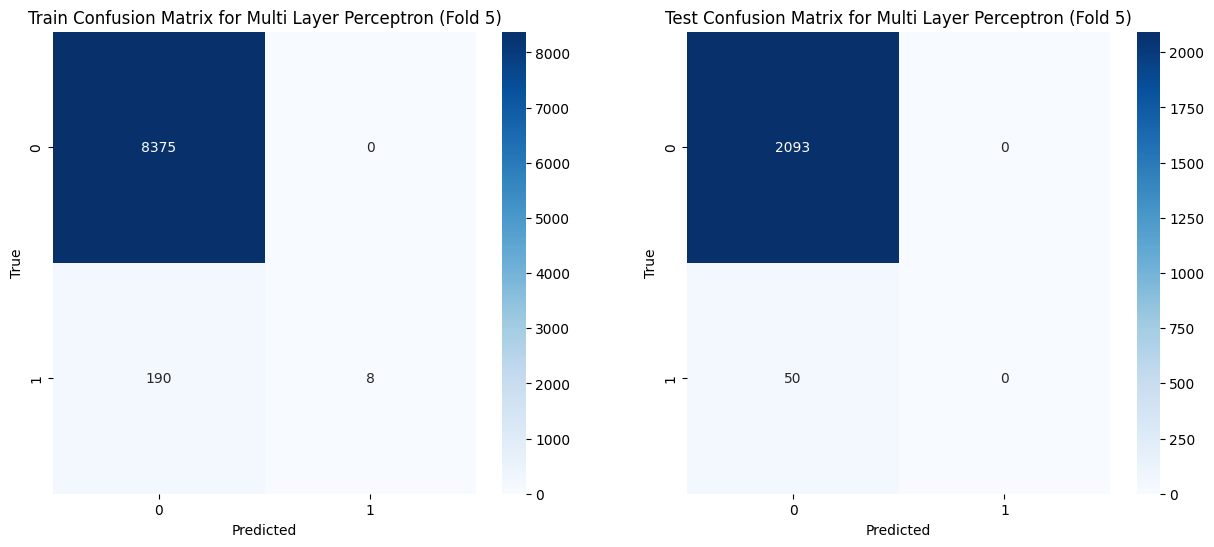

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Multi Layer Perceptron - Fold 5:
Train F1 Score: 0.97
Test F1 Score: 0.97
Precision: 0.9783
Recall: 0.9778
F1 Score: 0.9677
Accuracy: 0.9778
Precision: 0.9539
Recall: 0.9767
F1 Score: 0.9651
Accuracy: 0.9767
Train AUC: 0.90
Test AUC: 0.87


In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.model_selection import StratifiedKFold
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

# Assuming you have defined your data appropriately before this point
# Define your classifiers
classifiers = {
    'Linear Discriminant Analysis': LinearDiscriminantAnalysis(),
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Decision Trees': DecisionTreeClassifier(),
    'Random Forests': RandomForestClassifier(),
    'k-Nearest Neighbors': KNeighborsClassifier(),
    'Naïve Bayes': GaussianNB(),
    'Support Vector Machines': SVC(probability=True),
    'Multi Layer Perceptron': MLPClassifier()
}

# Initialize a stratified k-fold cross-validator
stratified_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

results = []

# Training and evaluation for each classifier
for name, clf in classifiers.items():
    for fold_idx, (train_index, test_index) in enumerate(stratified_kfold.split(inputData, outputData)):
        X_train, X_test = features_normalized[train_index], features_normalized[test_index]
        y_train, y_test = outputData[train_index], outputData[test_index]

        # Training the model
        clf.fit(X_train, y_train)

        # Forecast
        y_train_pred = clf.predict(X_train)
        y_test_pred = clf.predict(X_test)

        # Confusion matrices
        cm_train = confusion_matrix(y_train, y_train_pred)
        cm_test = confusion_matrix(y_test, y_test_pred)

        # Illustration of confusion matrices
        fig, axes = plt.subplots(1, 2, figsize=(15, 6))
        sns.heatmap(cm_train, annot=True, fmt='d', cmap='Blues', ax=axes[0])
        axes[0].set_title(f'Train Confusion Matrix for {name} (Fold {fold_idx + 1})')
        axes[0].set_xlabel('Predicted')
        axes[0].set_ylabel('True')

        sns.heatmap(cm_test, annot=True, fmt='d', cmap='Blues', ax=axes[1])
        axes[1].set_title(f'Test Confusion Matrix for {name} (Fold {fold_idx + 1})')
        axes[1].set_xlabel('Predicted')
        axes[1].set_ylabel('True')

        plt.show()

        # Calculation of metrics
        f1_train = f1_score(y_train, y_train_pred, average='weighted')
        f1_test = f1_score(y_test, y_test_pred, average='weighted')
        train_metrics = {
            'Precision': precision_score(y_train, y_train_pred, average='weighted'),
            'Recall': recall_score(y_train, y_train_pred, average='weighted'),
            'F1 Score': f1_train,
            'Accuracy': accuracy_score(y_train, y_train_pred),
        }
        test_metrics = {
            'Precision': precision_score(y_test, y_test_pred, average='weighted'),
            'Recall': recall_score(y_test, y_test_pred, average='weighted'),
            'F1 Score': f1_test,
            'Accuracy': accuracy_score(y_test, y_test_pred),
        }
        auc_train = roc_auc_score(y_train, clf.predict_proba(X_train)[:, 1])
        auc_test = roc_auc_score(y_test, clf.predict_proba(X_test)[:, 1])

        # Print the results
        print(f"{name} - Fold {fold_idx + 1}:")
        print(f"Train F1 Score: {f1_train:.2f}")
        print(f"Test F1 Score: {f1_test:.2f}")
        for metric, value in train_metrics.items():
            print(f"{metric}: {value:.4f}")
        for metric, value in test_metrics.items():
            print(f"{metric}: {value:.4f}")
        print(f"Train AUC: {auc_train:.2f}")
        print(f"Test AUC: {auc_test:.2f}")

        # Save confusion matrix metrics
        tn_train, fp_train, fn_train, tp_train = cm_train.ravel()
        tn_test, fp_test, fn_test, tp_test = cm_test.ravel()

        # Registration of results
        results.append({
            'Classifier Name': name,
            'Fold': fold_idx + 1,
            'Set': 'Train',
            'Number of Samples': len(train_index),
            'Number of Non-Healthy': sum(y_train == 2),
            **train_metrics,
            'AUC': auc_train
        })

        results.append({
            'Classifier Name': name,
            'Fold': fold_idx + 1,
            'Set': 'Test',
            'Number of Samples': len(test_index),
            'Number of Non-Healthy': sum(y_test == 2),
            **test_metrics,
            'AUC': auc_test
        })

# Create a DataFrame to store the results
results_df = pd.DataFrame(results)

# Save the results to a csv file
results_df.to_csv('/content/drive/MyDrive/Results/unbalancedDataOutcomes.csv', index=False)



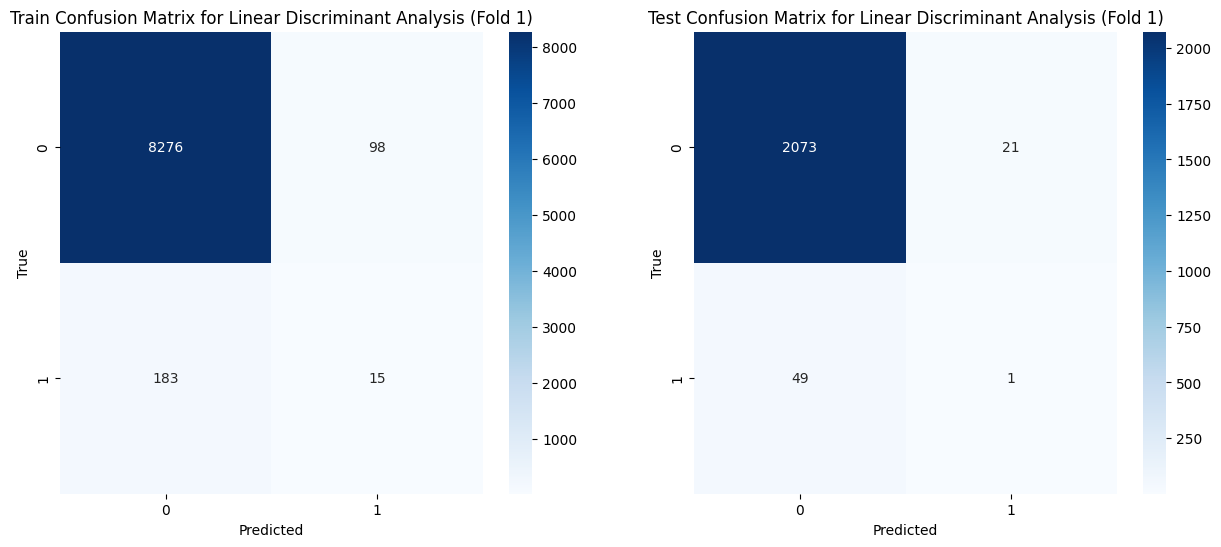

Linear Discriminant Analysis - Fold 1:
Accuracy: 0.9778
Precision: 1.0000
Recall: 0.0404
Specificity: 1.0000
F1 Score: 0.0777
False Positive Rate: 0.0000
False Negative Rate: 0.9596
Negative Predictive Value: 0.9778
False Discovery Rate: 0.0000
Balanced Accuracy: 0.5202
Accuracy: 0.9767
Precision: 0.0000
Recall: 0.0000
Specificity: 1.0000
F1 Score: 0.0000
False Positive Rate: 0.0000
False Negative Rate: 1.0000
Negative Predictive Value: 0.9767
False Discovery Rate: 0.0000
Balanced Accuracy: 0.5000
Train AUC: 0.85
Test AUC: 0.81


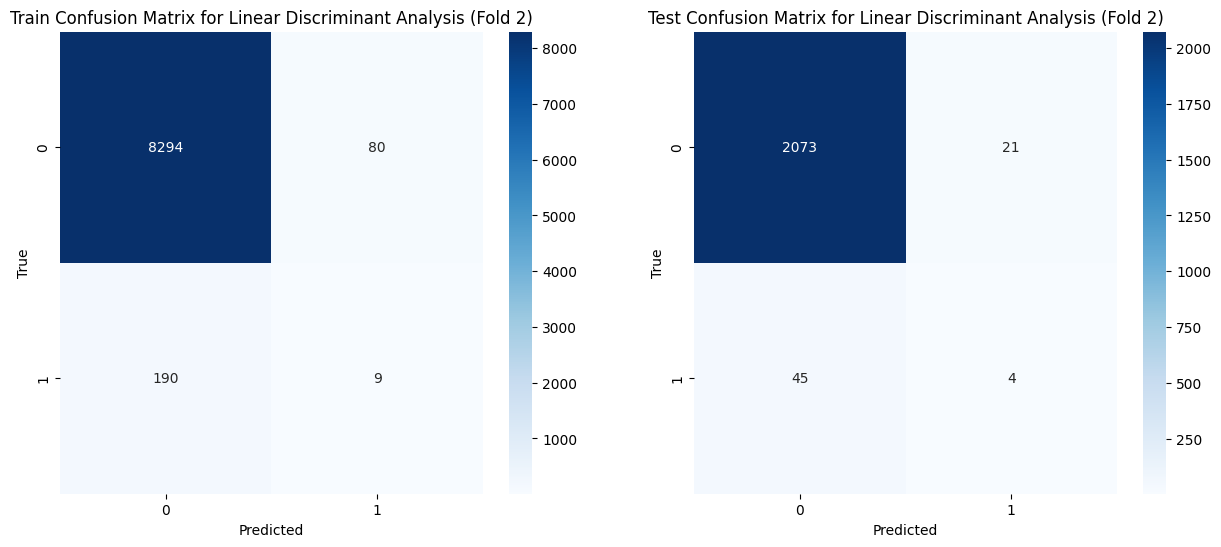

Linear Discriminant Analysis - Fold 2:
Accuracy: 0.9672
Precision: 0.1327
Recall: 0.0758
Specificity: 0.9883
F1 Score: 0.0965
False Positive Rate: 0.0117
False Negative Rate: 0.9242
Negative Predictive Value: 0.9784
False Discovery Rate: 0.8673
Balanced Accuracy: 0.5320
Accuracy: 0.9674
Precision: 0.0455
Recall: 0.0200
Specificity: 0.9900
F1 Score: 0.0278
False Positive Rate: 0.0100
False Negative Rate: 0.9800
Negative Predictive Value: 0.9769
False Discovery Rate: 0.9545
Balanced Accuracy: 0.5050
Train AUC: 0.83
Test AUC: 0.88


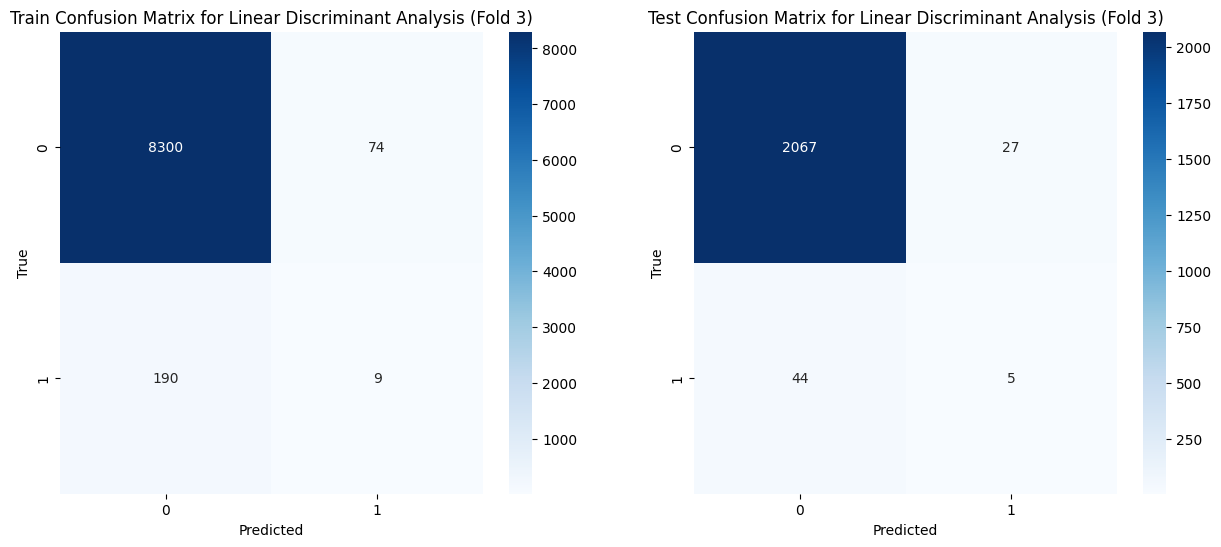

Linear Discriminant Analysis - Fold 3:
Accuracy: 0.9685
Precision: 0.1011
Recall: 0.0452
Specificity: 0.9904
F1 Score: 0.0625
False Positive Rate: 0.0096
False Negative Rate: 0.9548
Negative Predictive Value: 0.9776
False Discovery Rate: 0.8989
Balanced Accuracy: 0.5178
Accuracy: 0.9692
Precision: 0.1600
Recall: 0.0816
Specificity: 0.9900
F1 Score: 0.1081
False Positive Rate: 0.0100
False Negative Rate: 0.9184
Negative Predictive Value: 0.9788
False Discovery Rate: 0.8400
Balanced Accuracy: 0.5358
Train AUC: 0.84
Test AUC: 0.83


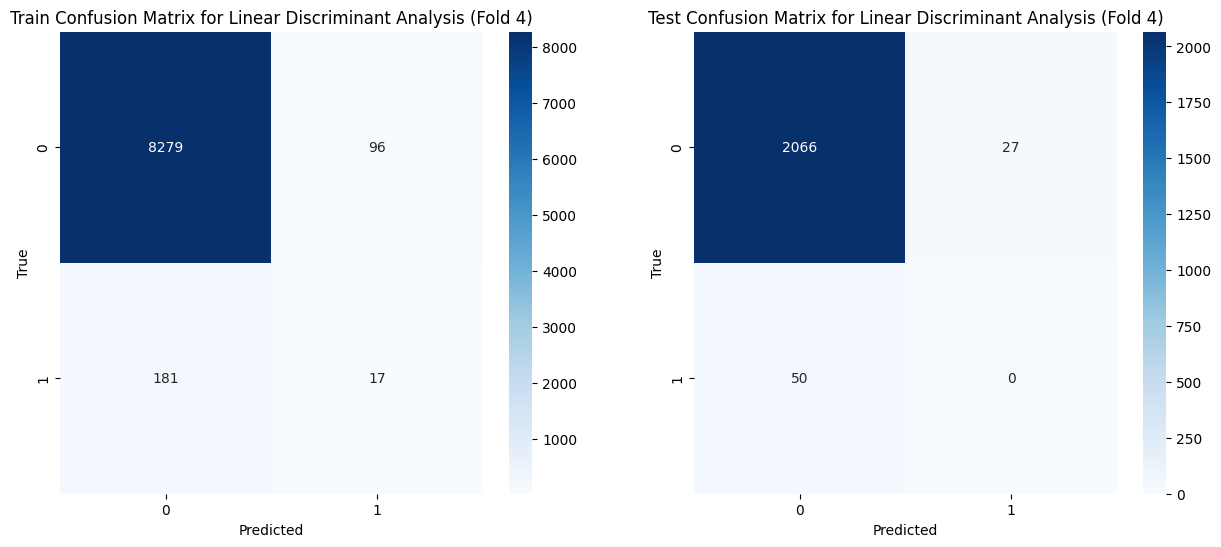

Linear Discriminant Analysis - Fold 4:
Accuracy: 0.9692
Precision: 0.1084
Recall: 0.0452
Specificity: 0.9912
F1 Score: 0.0638
False Positive Rate: 0.0088
False Negative Rate: 0.9548
Negative Predictive Value: 0.9776
False Discovery Rate: 0.8916
Balanced Accuracy: 0.5182
Accuracy: 0.9669
Precision: 0.1562
Recall: 0.1020
Specificity: 0.9871
F1 Score: 0.1235
False Positive Rate: 0.0129
False Negative Rate: 0.8980
Negative Predictive Value: 0.9792
False Discovery Rate: 0.8438
Balanced Accuracy: 0.5446
Train AUC: 0.84
Test AUC: 0.81


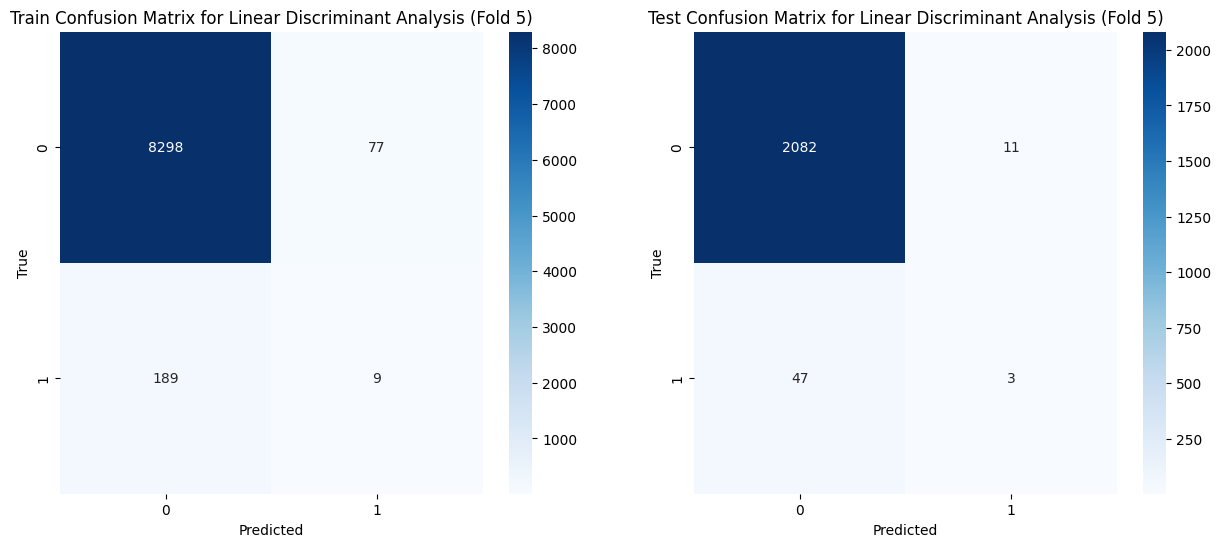

Linear Discriminant Analysis - Fold 5:
Accuracy: 0.9677
Precision: 0.1504
Recall: 0.0859
Specificity: 0.9885
F1 Score: 0.1093
False Positive Rate: 0.0115
False Negative Rate: 0.9141
Negative Predictive Value: 0.9786
False Discovery Rate: 0.8496
Balanced Accuracy: 0.5372
Accuracy: 0.9641
Precision: 0.0000
Recall: 0.0000
Specificity: 0.9871
F1 Score: 0.0000
False Positive Rate: 0.0129
False Negative Rate: 1.0000
Negative Predictive Value: 0.9764
False Discovery Rate: 1.0000
Balanced Accuracy: 0.4935
Train AUC: 0.84
Test AUC: 0.85


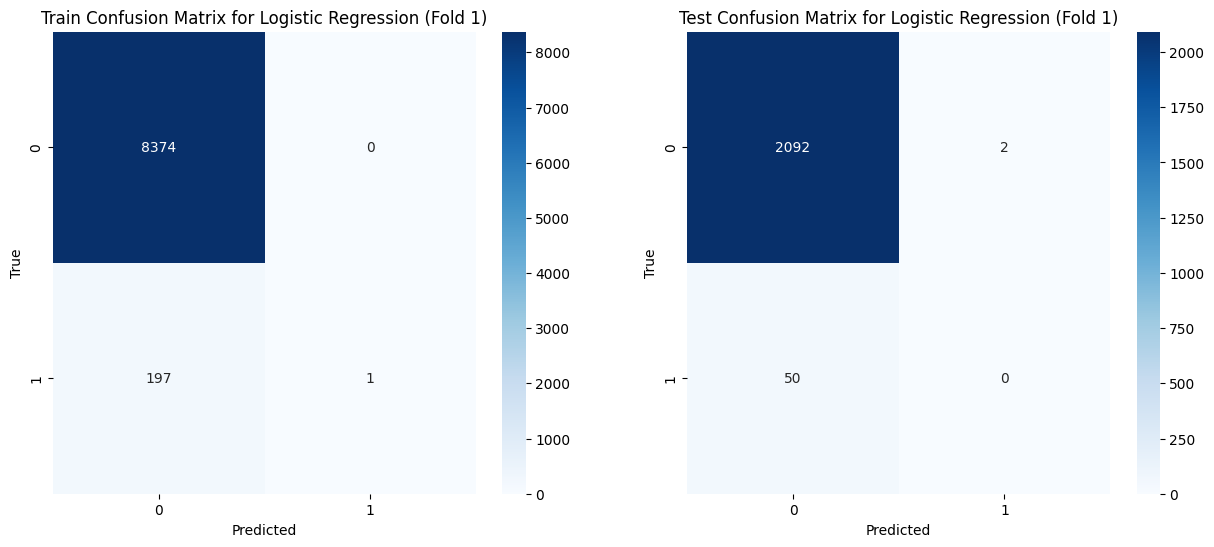

Logistic Regression - Fold 1:
Accuracy: 0.9690
Precision: 0.1047
Recall: 0.0455
Specificity: 0.9908
F1 Score: 0.0634
False Positive Rate: 0.0092
False Negative Rate: 0.9545
Negative Predictive Value: 0.9777
False Discovery Rate: 0.8953
Balanced Accuracy: 0.5181
Accuracy: 0.9729
Precision: 0.2143
Recall: 0.0600
Specificity: 0.9947
F1 Score: 0.0938
False Positive Rate: 0.0053
False Negative Rate: 0.9400
Negative Predictive Value: 0.9779
False Discovery Rate: 0.7857
Balanced Accuracy: 0.5274
Train AUC: 0.84
Test AUC: 0.83


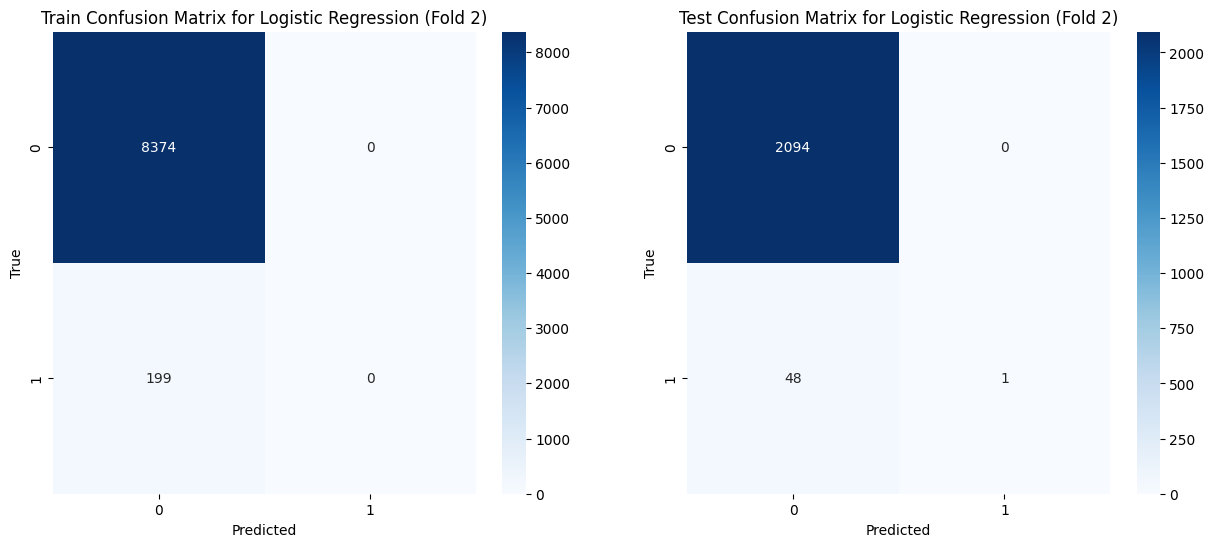

Logistic Regression - Fold 2:
Accuracy: 0.9770
Precision: 1.0000
Recall: 0.0051
Specificity: 1.0000
F1 Score: 0.0101
False Positive Rate: 0.0000
False Negative Rate: 0.9949
Negative Predictive Value: 0.9770
False Discovery Rate: 0.0000
Balanced Accuracy: 0.5025
Accuracy: 0.9757
Precision: 0.0000
Recall: 0.0000
Specificity: 0.9990
F1 Score: 0.0000
False Positive Rate: 0.0010
False Negative Rate: 1.0000
Negative Predictive Value: 0.9767
False Discovery Rate: 1.0000
Balanced Accuracy: 0.4995
Train AUC: 0.83
Test AUC: 0.89


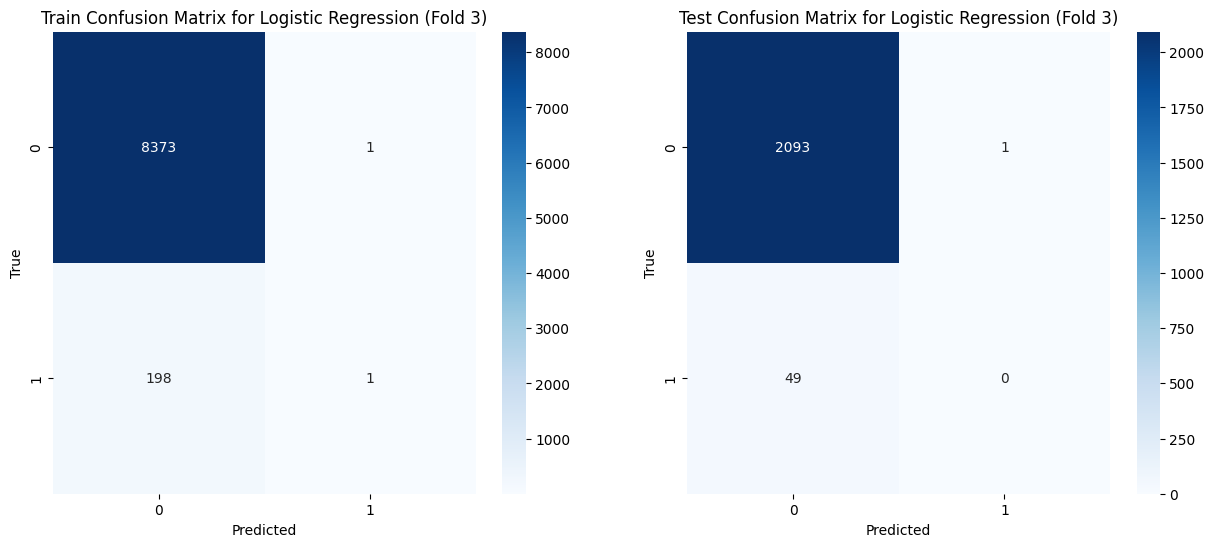

Logistic Regression - Fold 3:
Accuracy: 0.9768
Precision: 0.0000
Recall: 0.0000
Specificity: 1.0000
F1 Score: 0.0000
False Positive Rate: 0.0000
False Negative Rate: 1.0000
Negative Predictive Value: 0.9768
False Discovery Rate: 0.0000
Balanced Accuracy: 0.5000
Accuracy: 0.9776
Precision: 1.0000
Recall: 0.0204
Specificity: 1.0000
F1 Score: 0.0400
False Positive Rate: 0.0000
False Negative Rate: 0.9796
Negative Predictive Value: 0.9776
False Discovery Rate: 0.0000
Balanced Accuracy: 0.5102
Train AUC: 0.84
Test AUC: 0.81


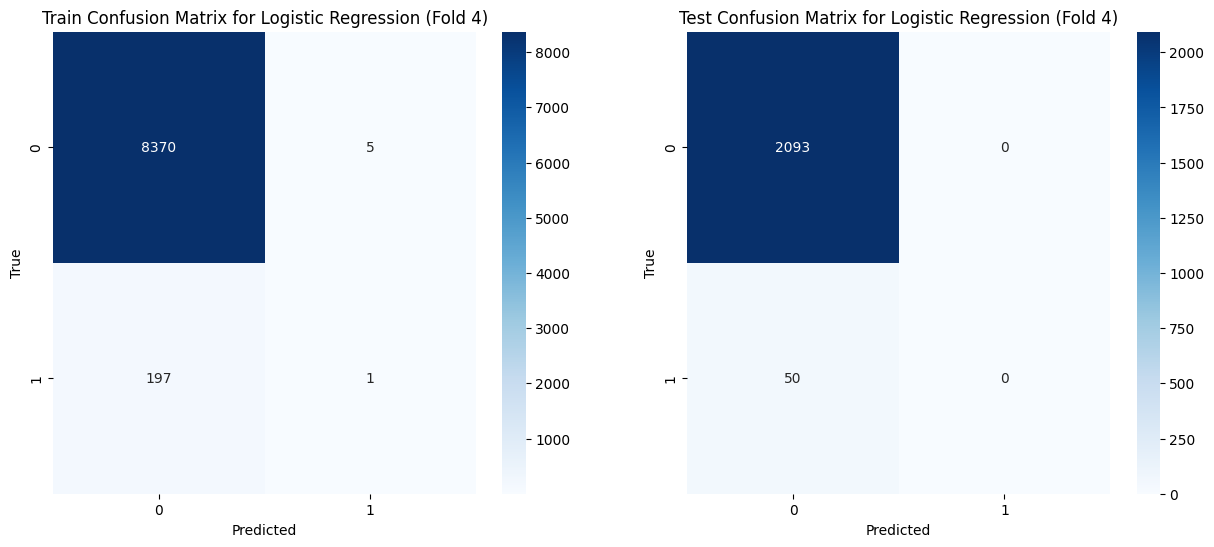

Logistic Regression - Fold 4:
Accuracy: 0.9768
Precision: 0.5000
Recall: 0.0050
Specificity: 0.9999
F1 Score: 0.0100
False Positive Rate: 0.0001
False Negative Rate: 0.9950
Negative Predictive Value: 0.9769
False Discovery Rate: 0.5000
Balanced Accuracy: 0.5025
Accuracy: 0.9767
Precision: 0.0000
Recall: 0.0000
Specificity: 0.9995
F1 Score: 0.0000
False Positive Rate: 0.0005
False Negative Rate: 1.0000
Negative Predictive Value: 0.9771
False Discovery Rate: 1.0000
Balanced Accuracy: 0.4998
Train AUC: 0.85
Test AUC: 0.80


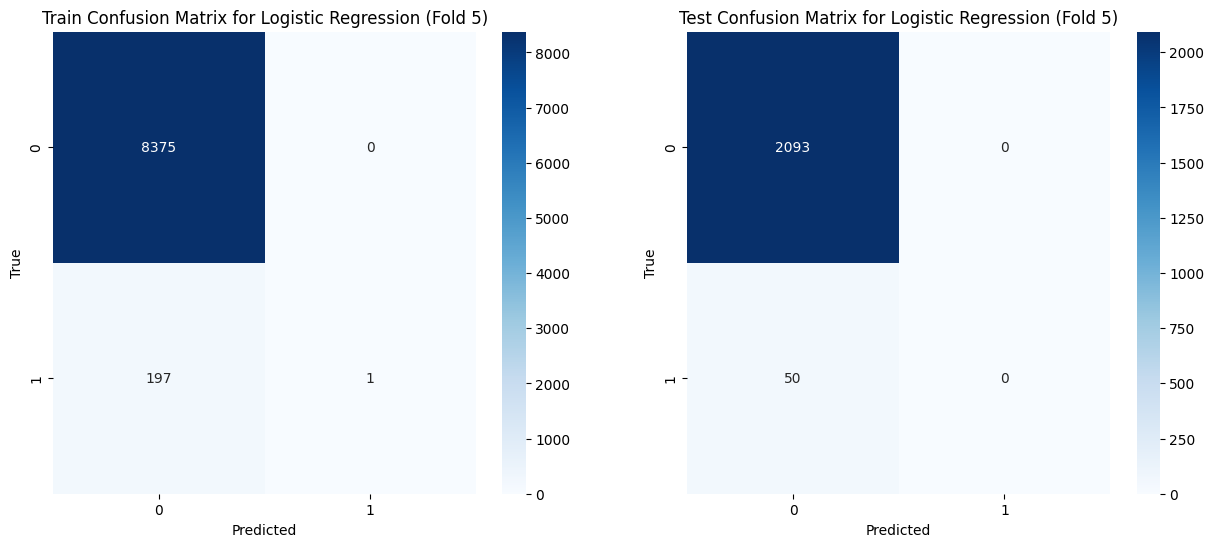

Logistic Regression - Fold 5:
Accuracy: 0.9764
Precision: 0.1667
Recall: 0.0051
Specificity: 0.9994
F1 Score: 0.0098
False Positive Rate: 0.0006
False Negative Rate: 0.9949
Negative Predictive Value: 0.9770
False Discovery Rate: 0.8333
Balanced Accuracy: 0.5022
Accuracy: 0.9767
Precision: 0.0000
Recall: 0.0000
Specificity: 1.0000
F1 Score: 0.0000
False Positive Rate: 0.0000
False Negative Rate: 1.0000
Negative Predictive Value: 0.9767
False Discovery Rate: 0.0000
Balanced Accuracy: 0.5000
Train AUC: 0.83
Test AUC: 0.84


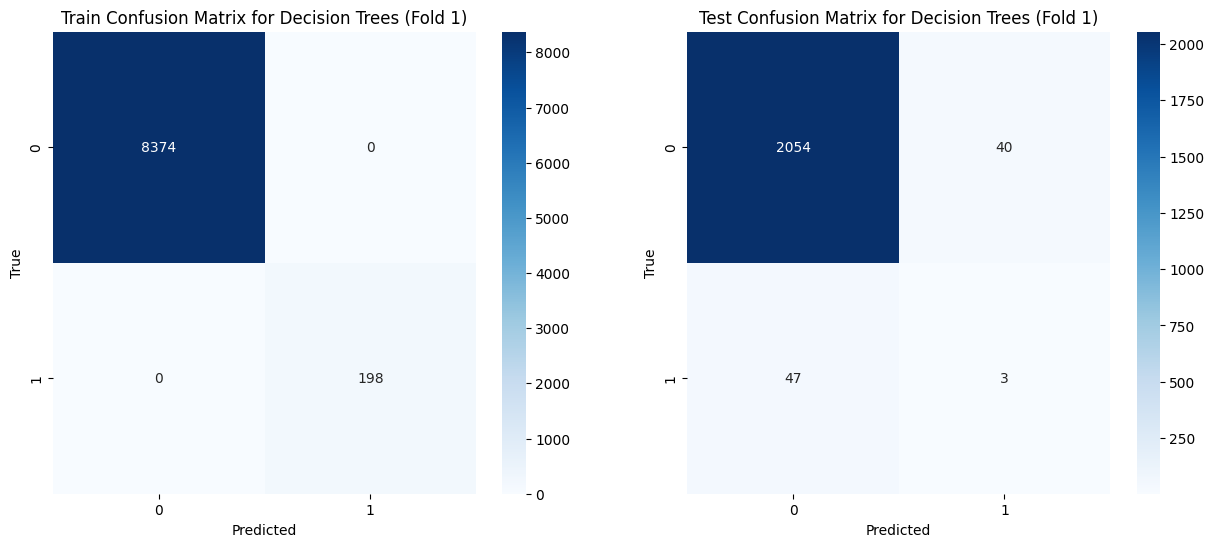

Decision Trees - Fold 1:
Accuracy: 0.9770
Precision: 1.0000
Recall: 0.0051
Specificity: 1.0000
F1 Score: 0.0101
False Positive Rate: 0.0000
False Negative Rate: 0.9949
Negative Predictive Value: 0.9770
False Discovery Rate: 0.0000
Balanced Accuracy: 0.5025
Accuracy: 0.9767
Precision: 0.0000
Recall: 0.0000
Specificity: 1.0000
F1 Score: 0.0000
False Positive Rate: 0.0000
False Negative Rate: 1.0000
Negative Predictive Value: 0.9767
False Discovery Rate: 0.0000
Balanced Accuracy: 0.5000
Train AUC: 1.00
Test AUC: 0.52


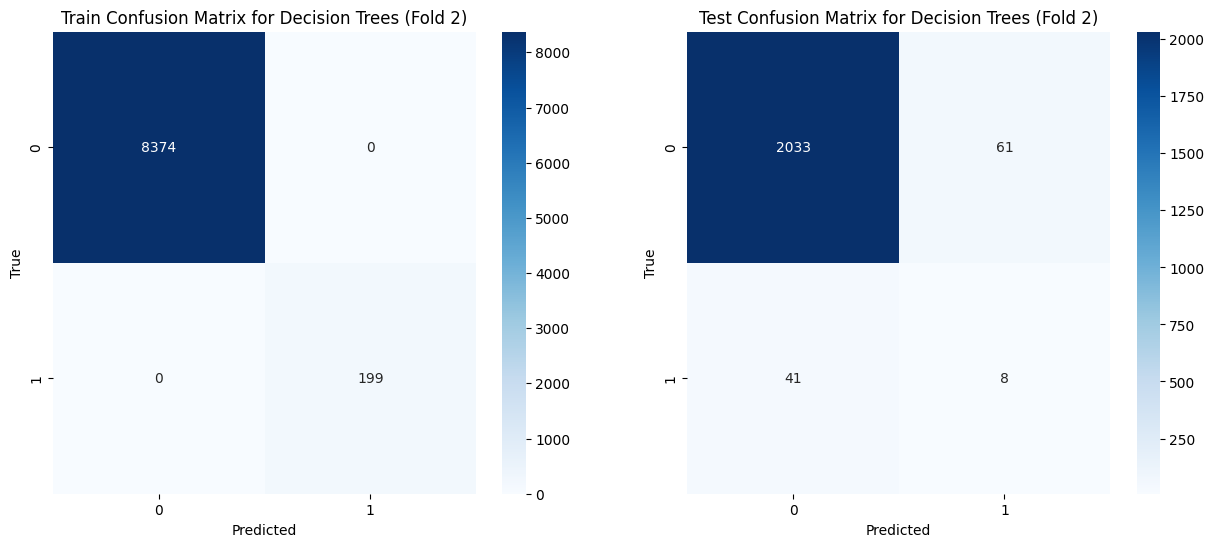

Decision Trees - Fold 2:
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
Specificity: 1.0000
F1 Score: 1.0000
False Positive Rate: 0.0000
False Negative Rate: 0.0000
Negative Predictive Value: 1.0000
False Discovery Rate: 0.0000
Balanced Accuracy: 1.0000
Accuracy: 0.9594
Precision: 0.0698
Recall: 0.0600
Specificity: 0.9809
F1 Score: 0.0645
False Positive Rate: 0.0191
False Negative Rate: 0.9400
Negative Predictive Value: 0.9776
False Discovery Rate: 0.9302
Balanced Accuracy: 0.5204
Train AUC: 1.00
Test AUC: 0.57


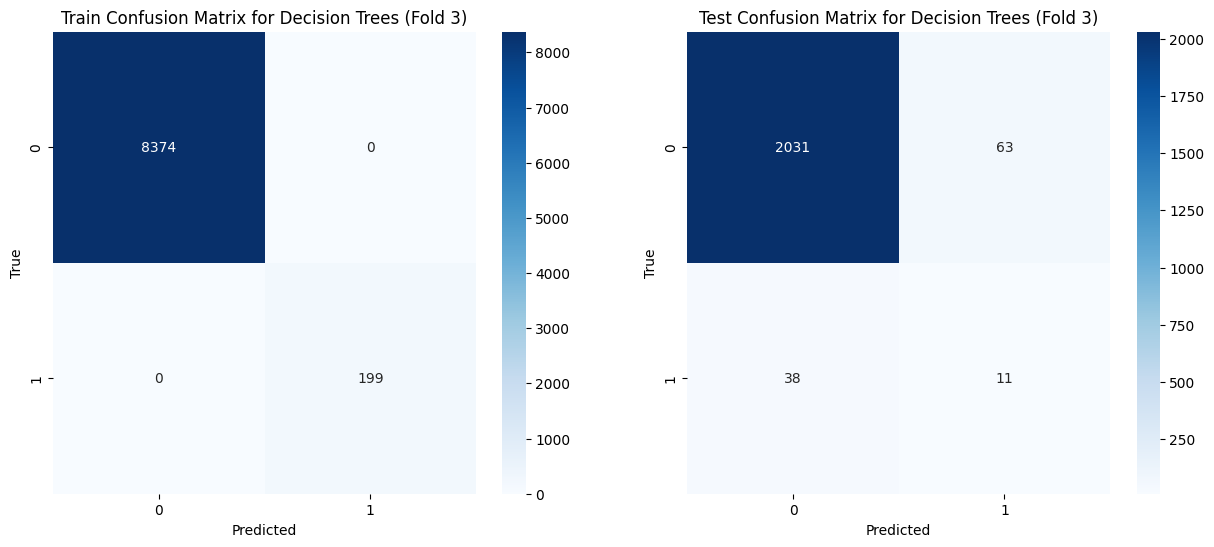

Decision Trees - Fold 3:
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
Specificity: 1.0000
F1 Score: 1.0000
False Positive Rate: 0.0000
False Negative Rate: 0.0000
Negative Predictive Value: 1.0000
False Discovery Rate: 0.0000
Balanced Accuracy: 1.0000
Accuracy: 0.9524
Precision: 0.1159
Recall: 0.1633
Specificity: 0.9709
F1 Score: 0.1356
False Positive Rate: 0.0291
False Negative Rate: 0.8367
Negative Predictive Value: 0.9802
False Discovery Rate: 0.8841
Balanced Accuracy: 0.5671
Train AUC: 1.00
Test AUC: 0.60


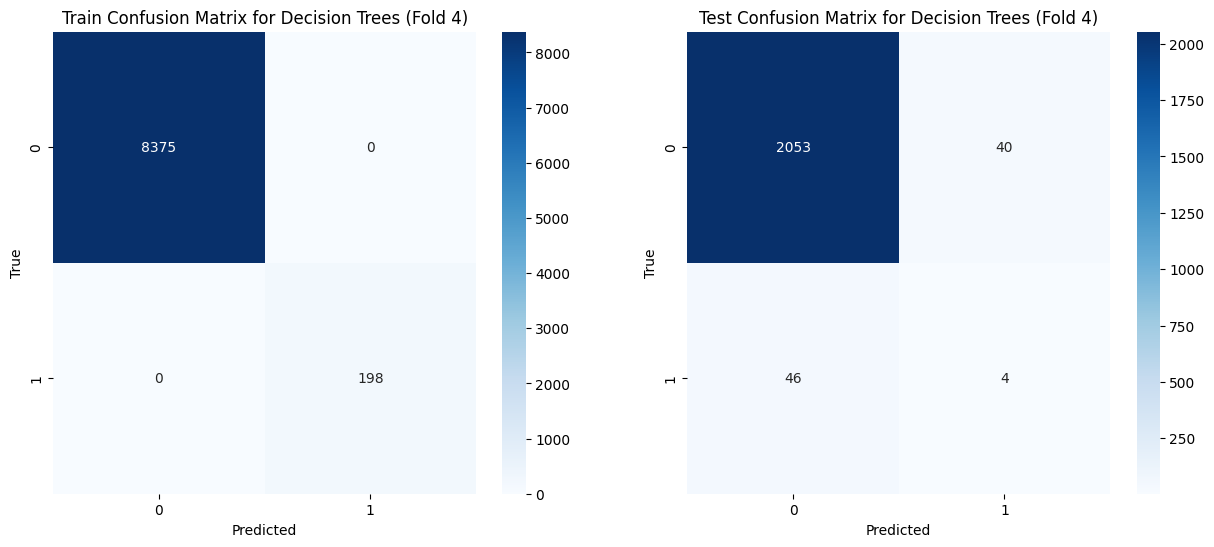

Decision Trees - Fold 4:
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
Specificity: 1.0000
F1 Score: 1.0000
False Positive Rate: 0.0000
False Negative Rate: 0.0000
Negative Predictive Value: 1.0000
False Discovery Rate: 0.0000
Balanced Accuracy: 1.0000
Accuracy: 0.9529
Precision: 0.1486
Recall: 0.2245
Specificity: 0.9699
F1 Score: 0.1789
False Positive Rate: 0.0301
False Negative Rate: 0.7755
Negative Predictive Value: 0.9816
False Discovery Rate: 0.8514
Balanced Accuracy: 0.5972
Train AUC: 1.00
Test AUC: 0.53


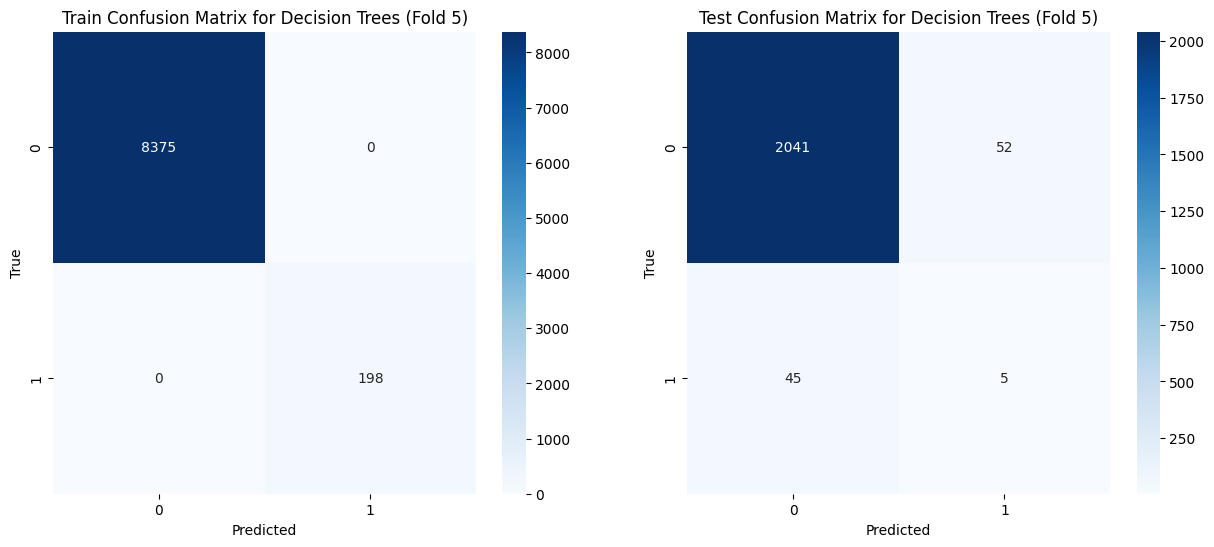

Decision Trees - Fold 5:
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
Specificity: 1.0000
F1 Score: 1.0000
False Positive Rate: 0.0000
False Negative Rate: 0.0000
Negative Predictive Value: 1.0000
False Discovery Rate: 0.0000
Balanced Accuracy: 1.0000
Accuracy: 0.9599
Precision: 0.0909
Recall: 0.0800
Specificity: 0.9809
F1 Score: 0.0851
False Positive Rate: 0.0191
False Negative Rate: 0.9200
Negative Predictive Value: 0.9781
False Discovery Rate: 0.9091
Balanced Accuracy: 0.5304
Train AUC: 1.00
Test AUC: 0.54


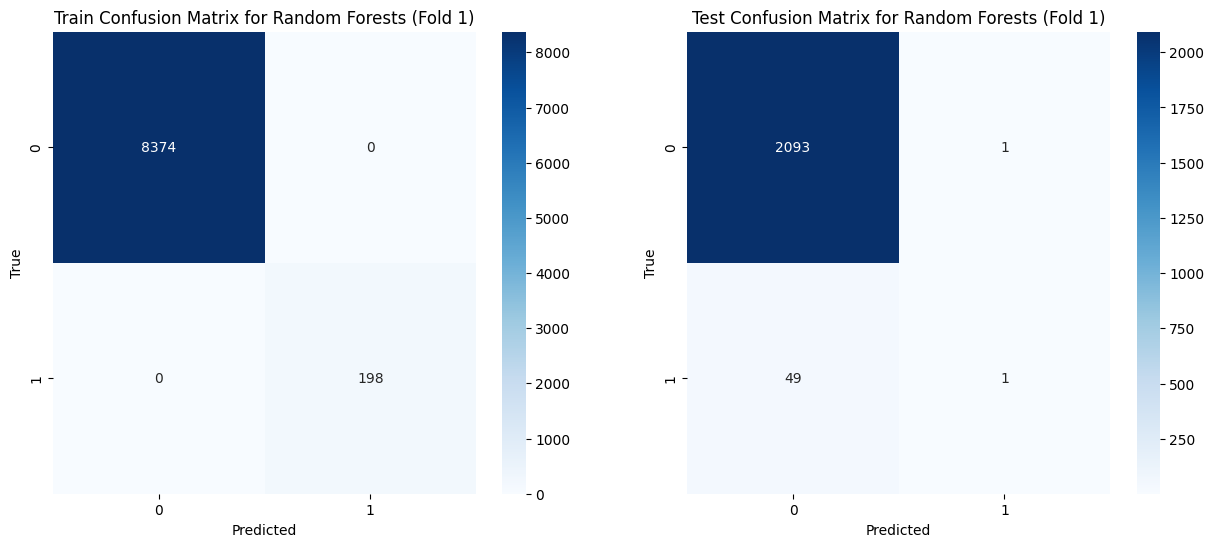

Random Forests - Fold 1:
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
Specificity: 1.0000
F1 Score: 1.0000
False Positive Rate: 0.0000
False Negative Rate: 0.0000
Negative Predictive Value: 1.0000
False Discovery Rate: 0.0000
Balanced Accuracy: 1.0000
Accuracy: 0.9547
Precision: 0.0877
Recall: 0.1000
Specificity: 0.9752
F1 Score: 0.0935
False Positive Rate: 0.0248
False Negative Rate: 0.9000
Negative Predictive Value: 0.9784
False Discovery Rate: 0.9123
Balanced Accuracy: 0.5376
Train AUC: 1.00
Test AUC: 0.79


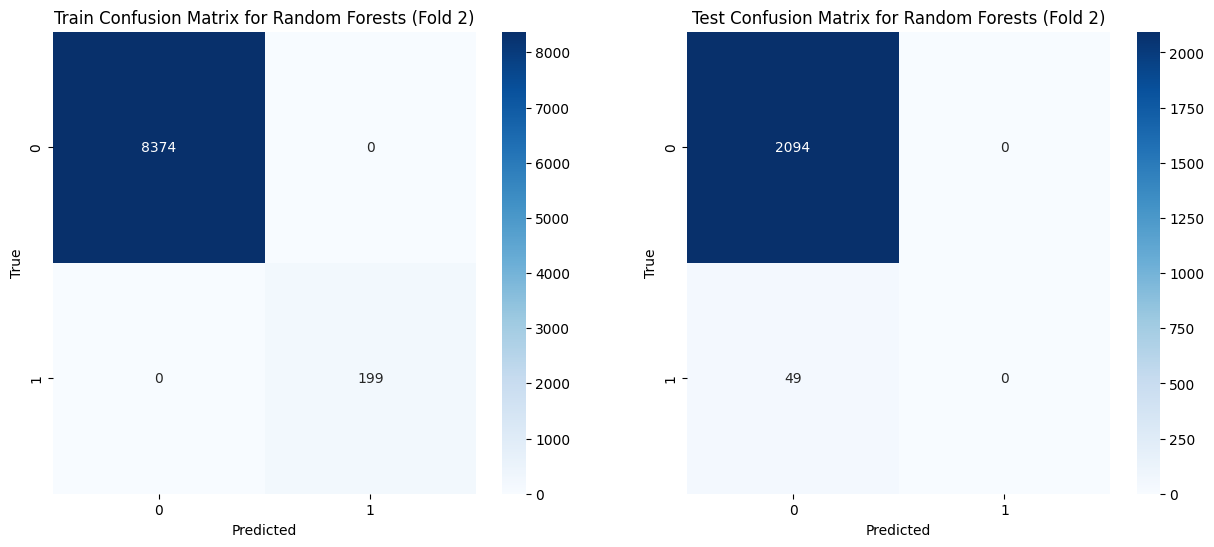

Random Forests - Fold 2:
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
Specificity: 1.0000
F1 Score: 1.0000
False Positive Rate: 0.0000
False Negative Rate: 0.0000
Negative Predictive Value: 1.0000
False Discovery Rate: 0.0000
Balanced Accuracy: 1.0000
Accuracy: 0.9767
Precision: 0.5000
Recall: 0.0200
Specificity: 0.9995
F1 Score: 0.0385
False Positive Rate: 0.0005
False Negative Rate: 0.9800
Negative Predictive Value: 0.9771
False Discovery Rate: 0.5000
Balanced Accuracy: 0.5098
Train AUC: 1.00
Test AUC: 0.91


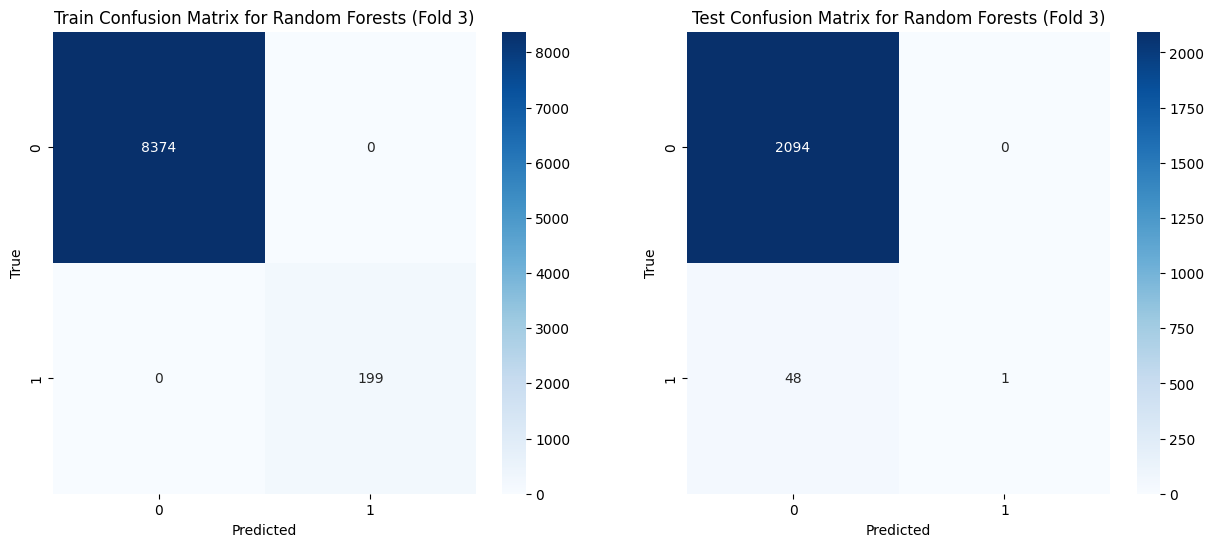

Random Forests - Fold 3:
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
Specificity: 1.0000
F1 Score: 1.0000
False Positive Rate: 0.0000
False Negative Rate: 0.0000
Negative Predictive Value: 1.0000
False Discovery Rate: 0.0000
Balanced Accuracy: 1.0000
Accuracy: 0.9771
Precision: 0.0000
Recall: 0.0000
Specificity: 1.0000
F1 Score: 0.0000
False Positive Rate: 0.0000
False Negative Rate: 1.0000
Negative Predictive Value: 0.9771
False Discovery Rate: 0.0000
Balanced Accuracy: 0.5000
Train AUC: 1.00
Test AUC: 0.84


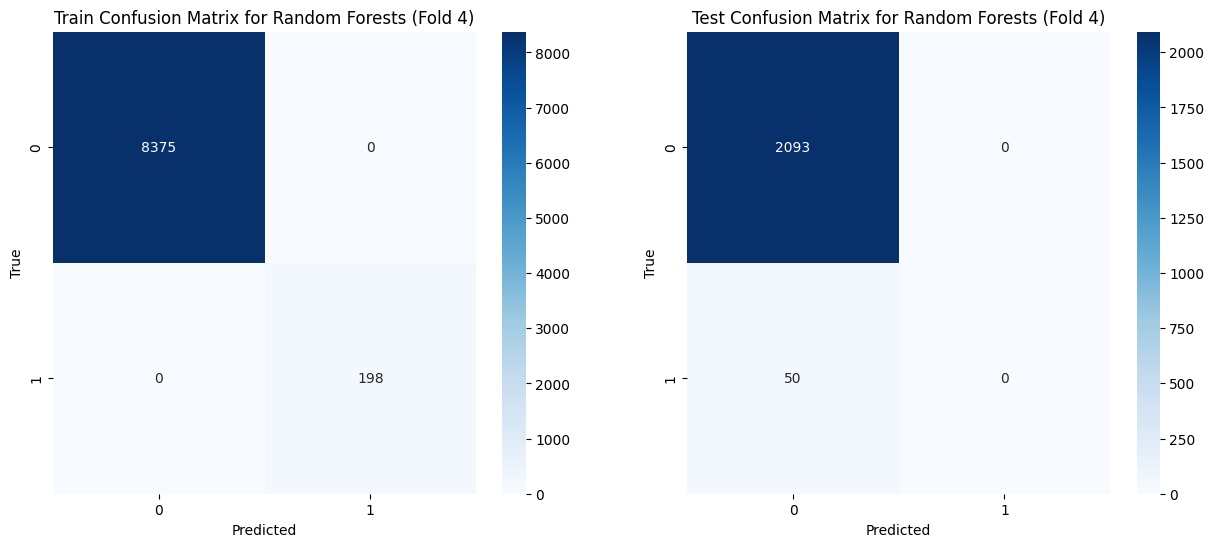

Random Forests - Fold 4:
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
Specificity: 1.0000
F1 Score: 1.0000
False Positive Rate: 0.0000
False Negative Rate: 0.0000
Negative Predictive Value: 1.0000
False Discovery Rate: 0.0000
Balanced Accuracy: 1.0000
Accuracy: 0.9776
Precision: 1.0000
Recall: 0.0204
Specificity: 1.0000
F1 Score: 0.0400
False Positive Rate: 0.0000
False Negative Rate: 0.9796
Negative Predictive Value: 0.9776
False Discovery Rate: 0.0000
Balanced Accuracy: 0.5102
Train AUC: 1.00
Test AUC: 0.77


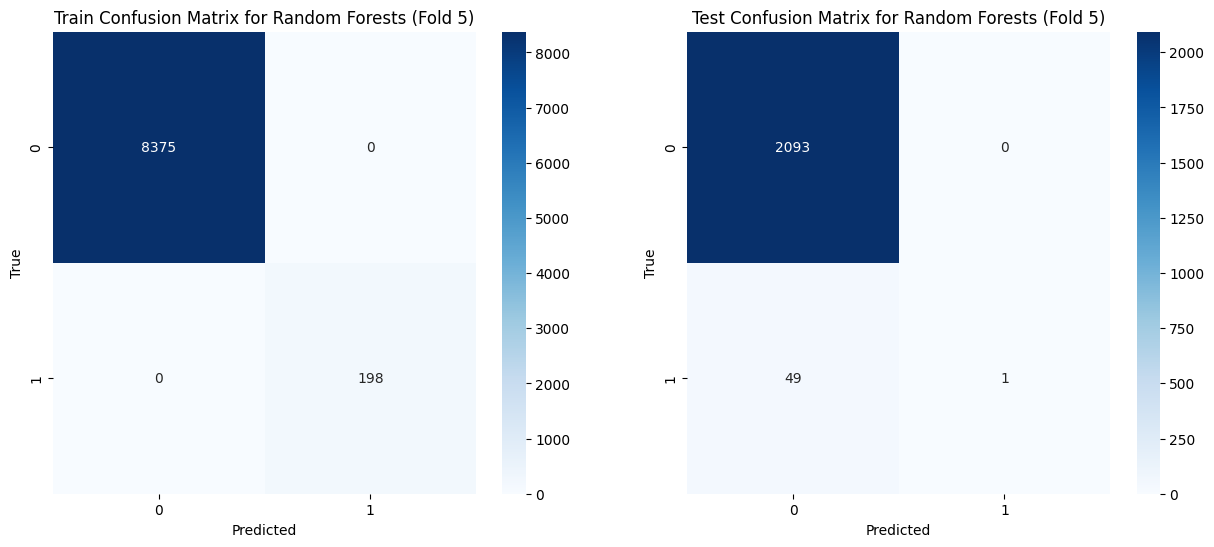

Random Forests - Fold 5:
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
Specificity: 1.0000
F1 Score: 1.0000
False Positive Rate: 0.0000
False Negative Rate: 0.0000
Negative Predictive Value: 1.0000
False Discovery Rate: 0.0000
Balanced Accuracy: 1.0000
Accuracy: 0.9767
Precision: 0.0000
Recall: 0.0000
Specificity: 1.0000
F1 Score: 0.0000
False Positive Rate: 0.0000
False Negative Rate: 1.0000
Negative Predictive Value: 0.9767
False Discovery Rate: 0.0000
Balanced Accuracy: 0.5000
Train AUC: 1.00
Test AUC: 0.86


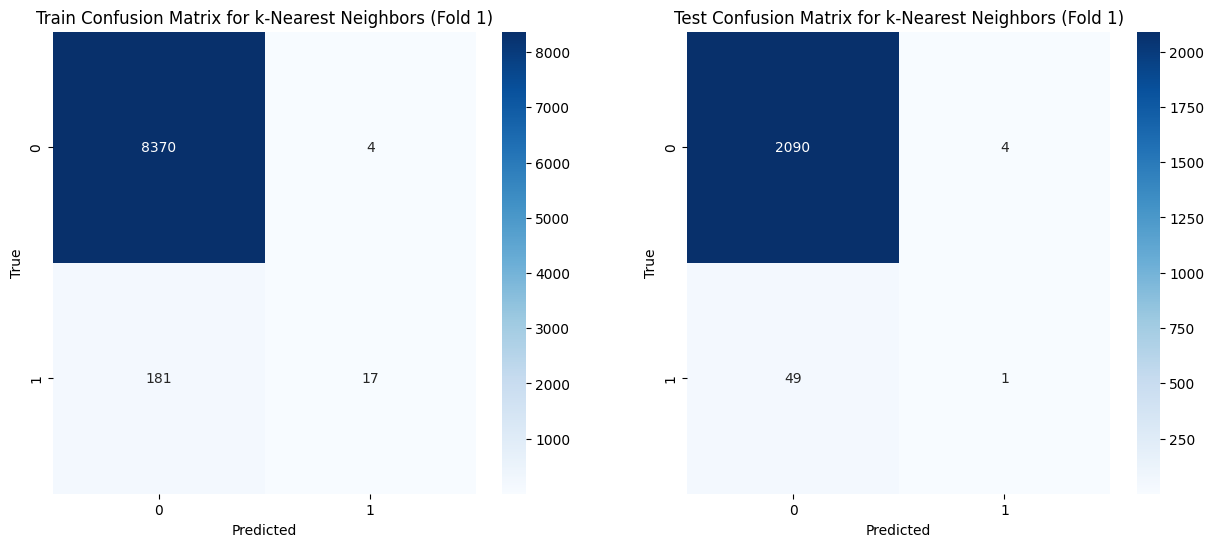

k-Nearest Neighbors - Fold 1:
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
Specificity: 1.0000
F1 Score: 1.0000
False Positive Rate: 0.0000
False Negative Rate: 0.0000
Negative Predictive Value: 1.0000
False Discovery Rate: 0.0000
Balanced Accuracy: 1.0000
Accuracy: 0.9771
Precision: 1.0000
Recall: 0.0200
Specificity: 1.0000
F1 Score: 0.0392
False Positive Rate: 0.0000
False Negative Rate: 0.9800
Negative Predictive Value: 0.9771
False Discovery Rate: 0.0000
Balanced Accuracy: 0.5100
Train AUC: 0.98
Test AUC: 0.66


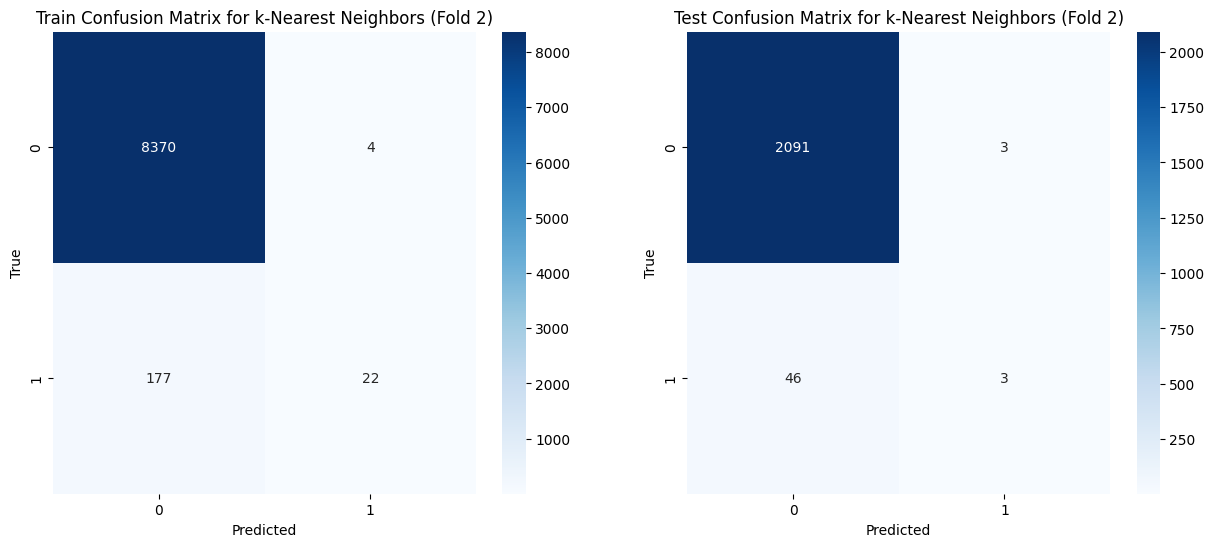

k-Nearest Neighbors - Fold 2:
Accuracy: 0.9784
Precision: 0.8095
Recall: 0.0859
Specificity: 0.9995
F1 Score: 0.1553
False Positive Rate: 0.0005
False Negative Rate: 0.9141
Negative Predictive Value: 0.9788
False Discovery Rate: 0.1905
Balanced Accuracy: 0.5427
Accuracy: 0.9753
Precision: 0.2000
Recall: 0.0200
Specificity: 0.9981
F1 Score: 0.0364
False Positive Rate: 0.0019
False Negative Rate: 0.9800
Negative Predictive Value: 0.9771
False Discovery Rate: 0.8000
Balanced Accuracy: 0.5090
Train AUC: 0.97
Test AUC: 0.69


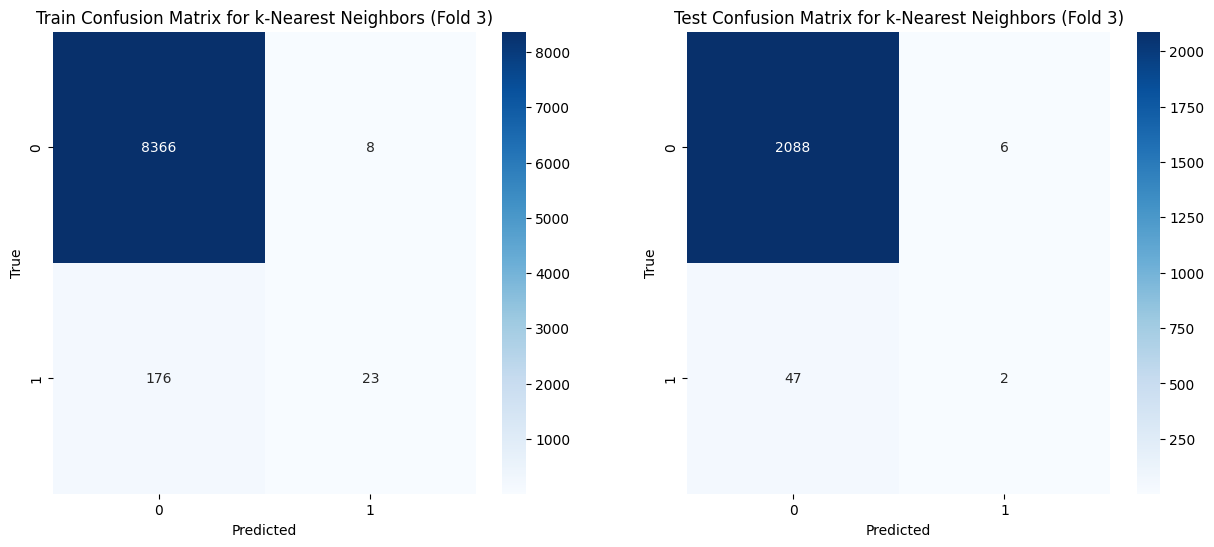

k-Nearest Neighbors - Fold 3:
Accuracy: 0.9789
Precision: 0.8462
Recall: 0.1106
Specificity: 0.9995
F1 Score: 0.1956
False Positive Rate: 0.0005
False Negative Rate: 0.8894
Negative Predictive Value: 0.9793
False Discovery Rate: 0.1538
Balanced Accuracy: 0.5550
Accuracy: 0.9771
Precision: 0.5000
Recall: 0.0612
Specificity: 0.9986
F1 Score: 0.1091
False Positive Rate: 0.0014
False Negative Rate: 0.9388
Negative Predictive Value: 0.9785
False Discovery Rate: 0.5000
Balanced Accuracy: 0.5299
Train AUC: 0.98
Test AUC: 0.61


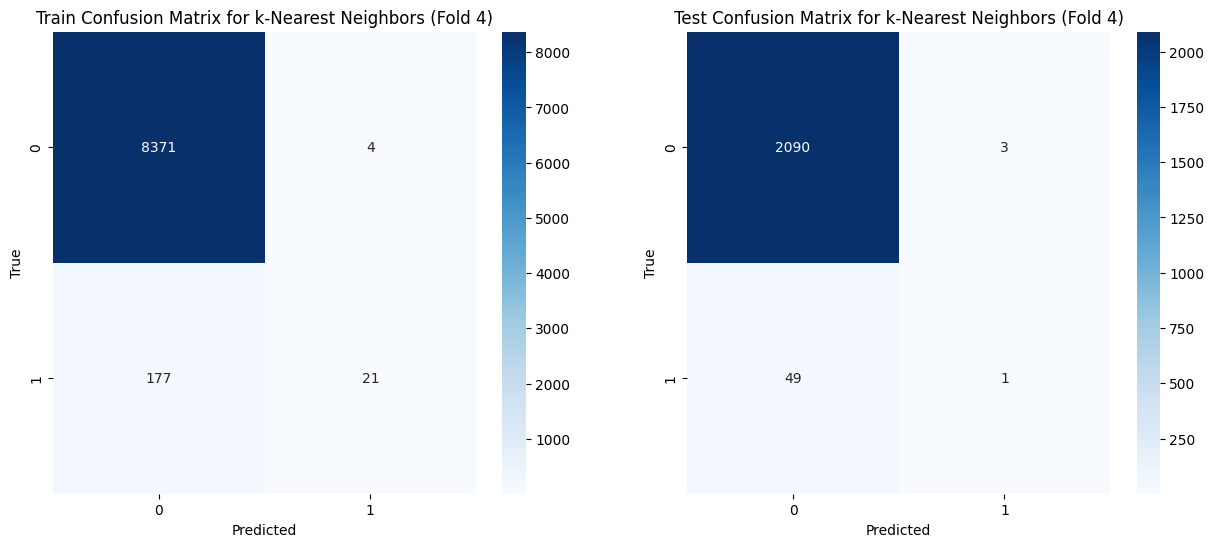

k-Nearest Neighbors - Fold 4:
Accuracy: 0.9785
Precision: 0.7419
Recall: 0.1156
Specificity: 0.9990
F1 Score: 0.2000
False Positive Rate: 0.0010
False Negative Rate: 0.8844
Negative Predictive Value: 0.9794
False Discovery Rate: 0.2581
Balanced Accuracy: 0.5573
Accuracy: 0.9753
Precision: 0.2500
Recall: 0.0408
Specificity: 0.9971
F1 Score: 0.0702
False Positive Rate: 0.0029
False Negative Rate: 0.9592
Negative Predictive Value: 0.9780
False Discovery Rate: 0.7500
Balanced Accuracy: 0.5190
Train AUC: 0.98
Test AUC: 0.66


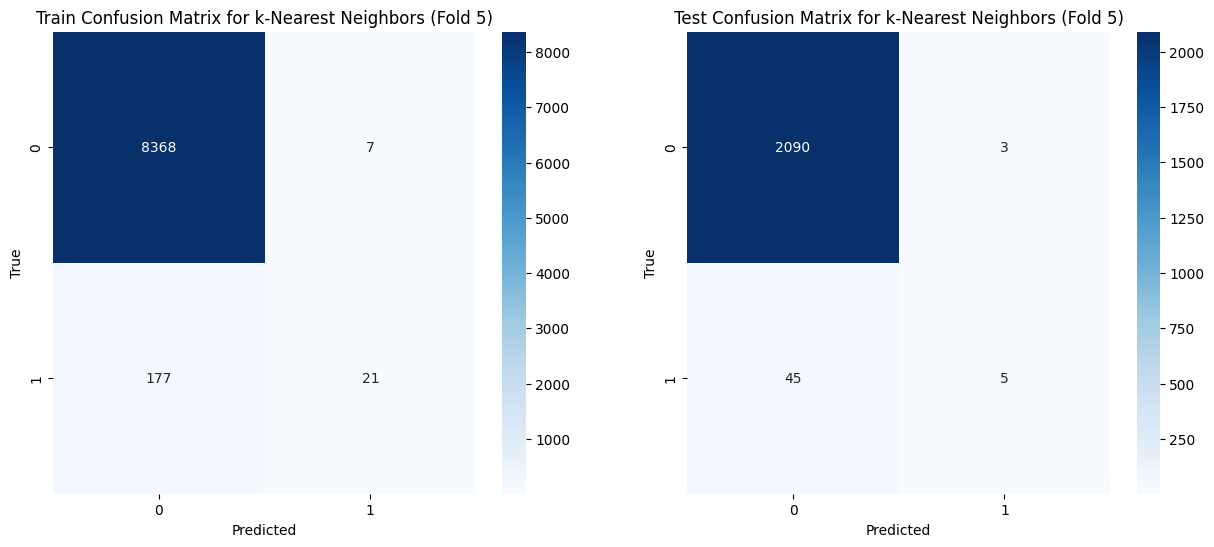

k-Nearest Neighbors - Fold 5:
Accuracy: 0.9789
Precision: 0.8400
Recall: 0.1061
Specificity: 0.9995
F1 Score: 0.1883
False Positive Rate: 0.0005
False Negative Rate: 0.8939
Negative Predictive Value: 0.9793
False Discovery Rate: 0.1600
Balanced Accuracy: 0.5528
Accuracy: 0.9757
Precision: 0.2500
Recall: 0.0200
Specificity: 0.9986
F1 Score: 0.0370
False Positive Rate: 0.0014
False Negative Rate: 0.9800
Negative Predictive Value: 0.9771
False Discovery Rate: 0.7500
Balanced Accuracy: 0.5093
Train AUC: 0.98
Test AUC: 0.66


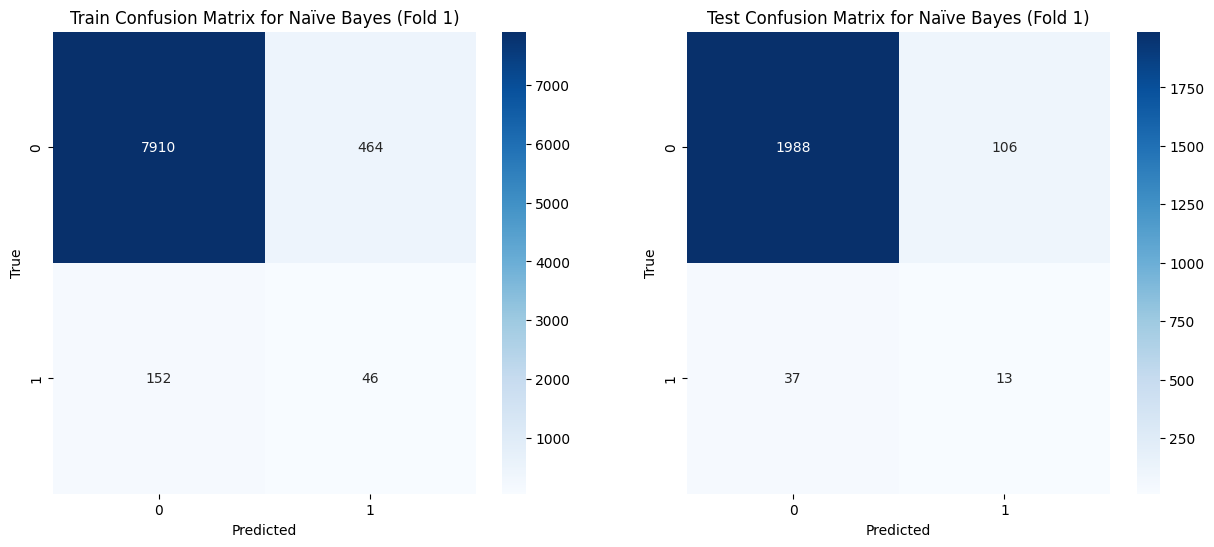

Naïve Bayes - Fold 1:
Accuracy: 0.9785
Precision: 0.7500
Recall: 0.1061
Specificity: 0.9992
F1 Score: 0.1858
False Positive Rate: 0.0008
False Negative Rate: 0.8939
Negative Predictive Value: 0.9793
False Discovery Rate: 0.2500
Balanced Accuracy: 0.5526
Accuracy: 0.9776
Precision: 0.6250
Recall: 0.1000
Specificity: 0.9986
F1 Score: 0.1724
False Positive Rate: 0.0014
False Negative Rate: 0.9000
Negative Predictive Value: 0.9789
False Discovery Rate: 0.3750
Balanced Accuracy: 0.5493
Train AUC: 0.83
Test AUC: 0.82


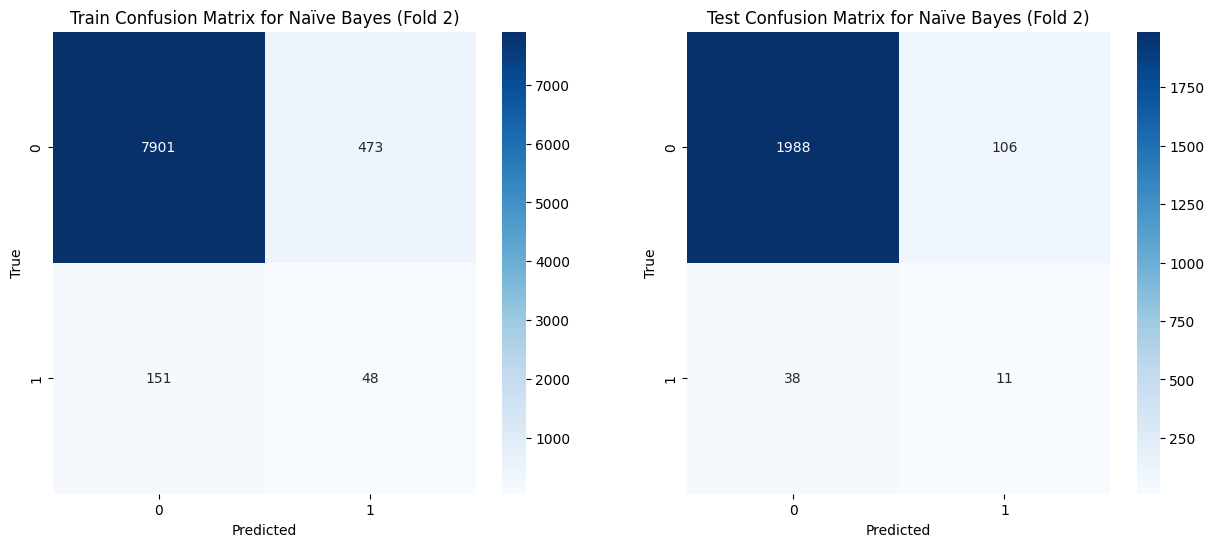

Naïve Bayes - Fold 2:
Accuracy: 0.9281
Precision: 0.0902
Recall: 0.2323
Specificity: 0.9446
F1 Score: 0.1299
False Positive Rate: 0.0554
False Negative Rate: 0.7677
Negative Predictive Value: 0.9811
False Discovery Rate: 0.9098
Balanced Accuracy: 0.5885
Accuracy: 0.9333
Precision: 0.1092
Recall: 0.2600
Specificity: 0.9494
F1 Score: 0.1538
False Positive Rate: 0.0506
False Negative Rate: 0.7400
Negative Predictive Value: 0.9817
False Discovery Rate: 0.8908
Balanced Accuracy: 0.6047
Train AUC: 0.81
Test AUC: 0.87


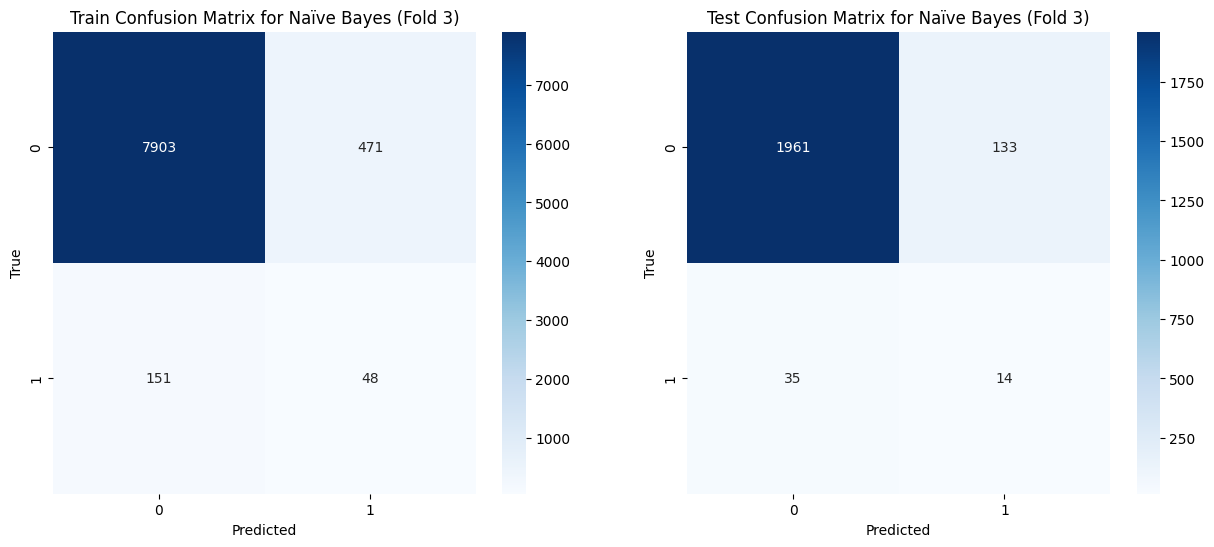

Naïve Bayes - Fold 3:
Accuracy: 0.9272
Precision: 0.0921
Recall: 0.2412
Specificity: 0.9435
F1 Score: 0.1333
False Positive Rate: 0.0565
False Negative Rate: 0.7588
Negative Predictive Value: 0.9812
False Discovery Rate: 0.9079
Balanced Accuracy: 0.5924
Accuracy: 0.9328
Precision: 0.0940
Recall: 0.2245
Specificity: 0.9494
F1 Score: 0.1325
False Positive Rate: 0.0506
False Negative Rate: 0.7755
Negative Predictive Value: 0.9812
False Discovery Rate: 0.9060
Balanced Accuracy: 0.5869
Train AUC: 0.83
Test AUC: 0.80


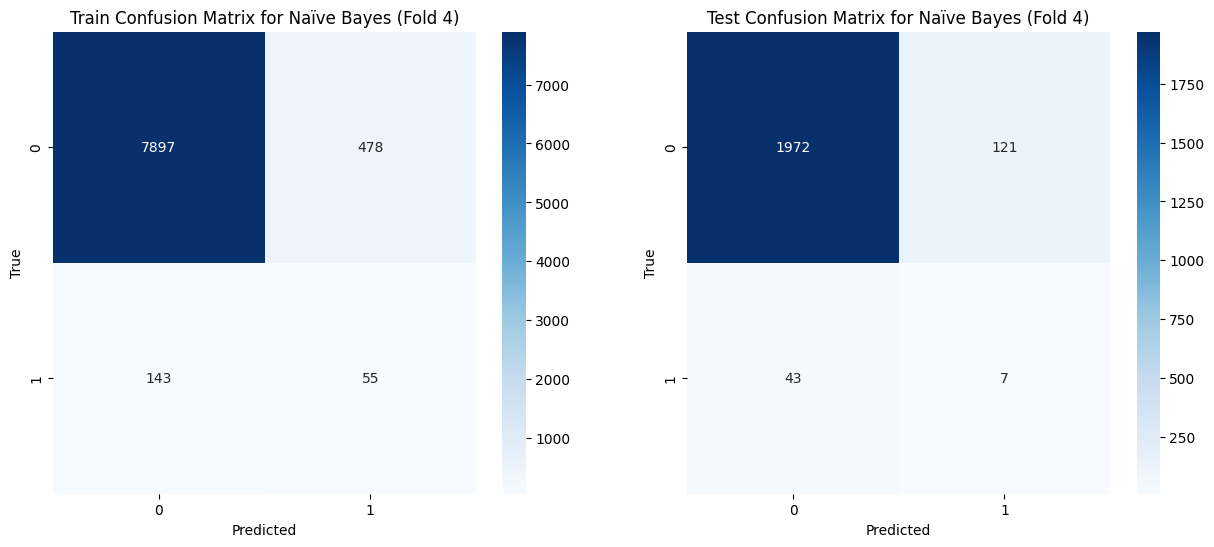

Naïve Bayes - Fold 4:
Accuracy: 0.9274
Precision: 0.0925
Recall: 0.2412
Specificity: 0.9438
F1 Score: 0.1337
False Positive Rate: 0.0562
False Negative Rate: 0.7588
Negative Predictive Value: 0.9813
False Discovery Rate: 0.9075
Balanced Accuracy: 0.5925
Accuracy: 0.9216
Precision: 0.0952
Recall: 0.2857
Specificity: 0.9365
F1 Score: 0.1429
False Positive Rate: 0.0635
False Negative Rate: 0.7143
Negative Predictive Value: 0.9825
False Discovery Rate: 0.9048
Balanced Accuracy: 0.6111
Train AUC: 0.84
Test AUC: 0.77


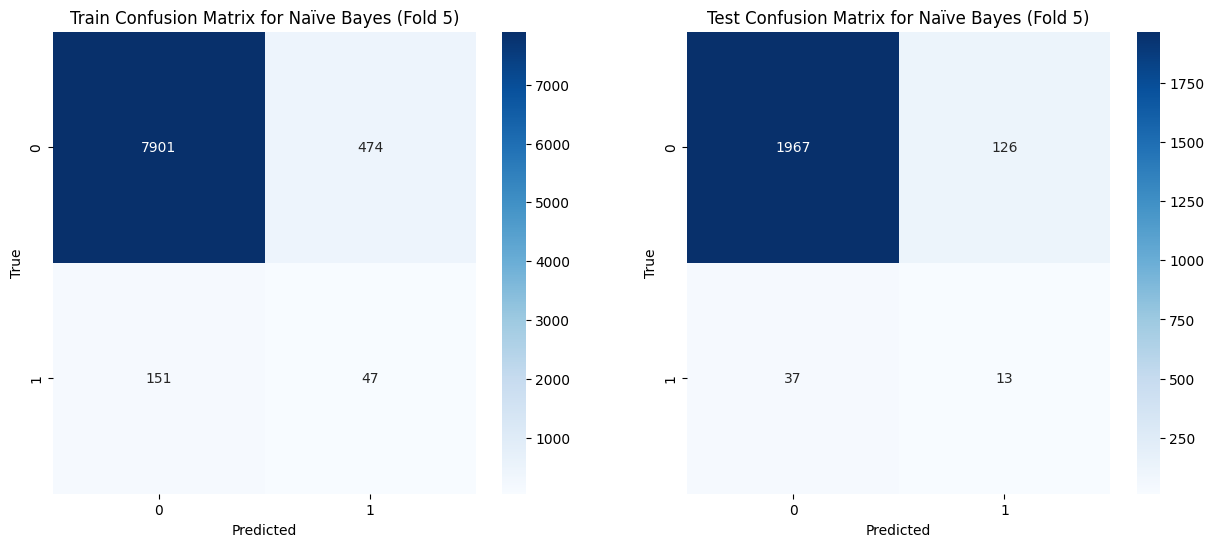

Naïve Bayes - Fold 5:
Accuracy: 0.9276
Precision: 0.1032
Recall: 0.2778
Specificity: 0.9429
F1 Score: 0.1505
False Positive Rate: 0.0571
False Negative Rate: 0.7222
Negative Predictive Value: 0.9822
False Discovery Rate: 0.8968
Balanced Accuracy: 0.6104
Accuracy: 0.9235
Precision: 0.0547
Recall: 0.1400
Specificity: 0.9422
F1 Score: 0.0787
False Positive Rate: 0.0578
False Negative Rate: 0.8600
Negative Predictive Value: 0.9787
False Discovery Rate: 0.9453
Balanced Accuracy: 0.5411
Train AUC: 0.82
Test AUC: 0.84


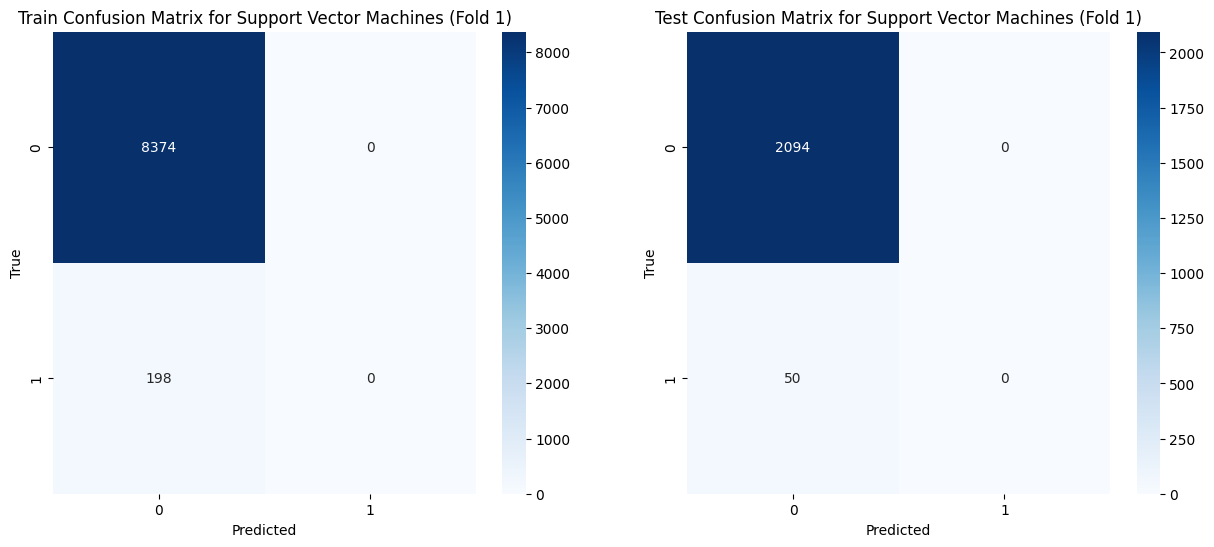

Support Vector Machines - Fold 1:
Accuracy: 0.9271
Precision: 0.0902
Recall: 0.2374
Specificity: 0.9434
F1 Score: 0.1307
False Positive Rate: 0.0566
False Negative Rate: 0.7626
Negative Predictive Value: 0.9812
False Discovery Rate: 0.9098
Balanced Accuracy: 0.5904
Accuracy: 0.9239
Precision: 0.0935
Recall: 0.2600
Specificity: 0.9398
F1 Score: 0.1376
False Positive Rate: 0.0602
False Negative Rate: 0.7400
Negative Predictive Value: 0.9815
False Discovery Rate: 0.9065
Balanced Accuracy: 0.5999
Train AUC: 0.88
Test AUC: 0.70


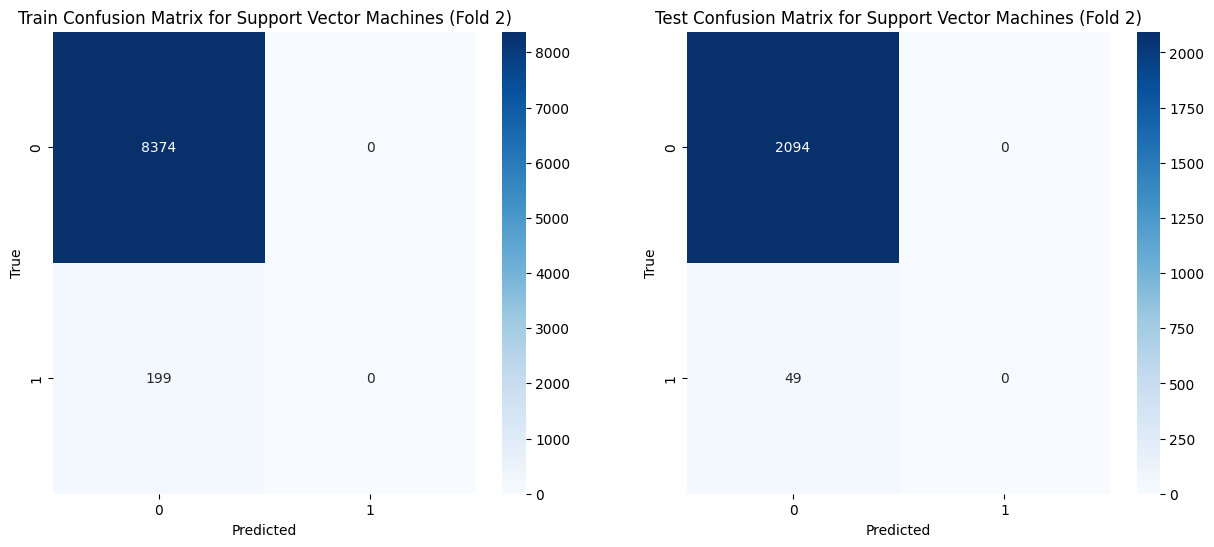

Support Vector Machines - Fold 2:
Accuracy: 0.9769
Precision: 0.0000
Recall: 0.0000
Specificity: 1.0000
F1 Score: 0.0000
False Positive Rate: 0.0000
False Negative Rate: 1.0000
Negative Predictive Value: 0.9769
False Discovery Rate: 0.0000
Balanced Accuracy: 0.5000
Accuracy: 0.9767
Precision: 0.0000
Recall: 0.0000
Specificity: 1.0000
F1 Score: 0.0000
False Positive Rate: 0.0000
False Negative Rate: 1.0000
Negative Predictive Value: 0.9767
False Discovery Rate: 0.0000
Balanced Accuracy: 0.5000
Train AUC: 0.89
Test AUC: 0.72


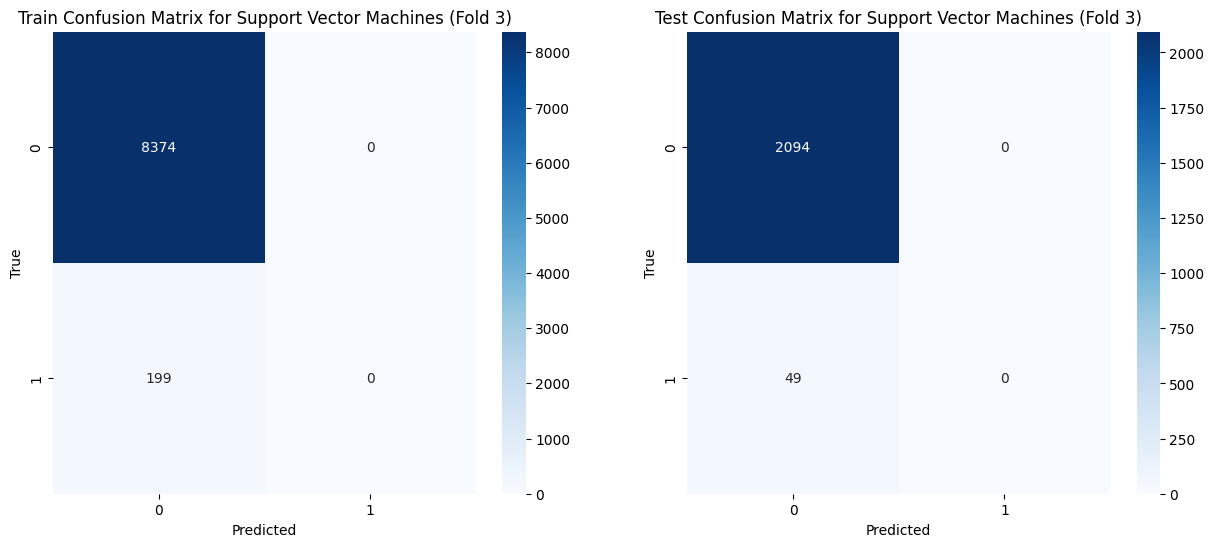

Support Vector Machines - Fold 3:
Accuracy: 0.9768
Precision: 0.0000
Recall: 0.0000
Specificity: 1.0000
F1 Score: 0.0000
False Positive Rate: 0.0000
False Negative Rate: 1.0000
Negative Predictive Value: 0.9768
False Discovery Rate: 0.0000
Balanced Accuracy: 0.5000
Accuracy: 0.9771
Precision: 0.0000
Recall: 0.0000
Specificity: 1.0000
F1 Score: 0.0000
False Positive Rate: 0.0000
False Negative Rate: 1.0000
Negative Predictive Value: 0.9771
False Discovery Rate: 0.0000
Balanced Accuracy: 0.5000
Train AUC: 0.91
Test AUC: 0.65


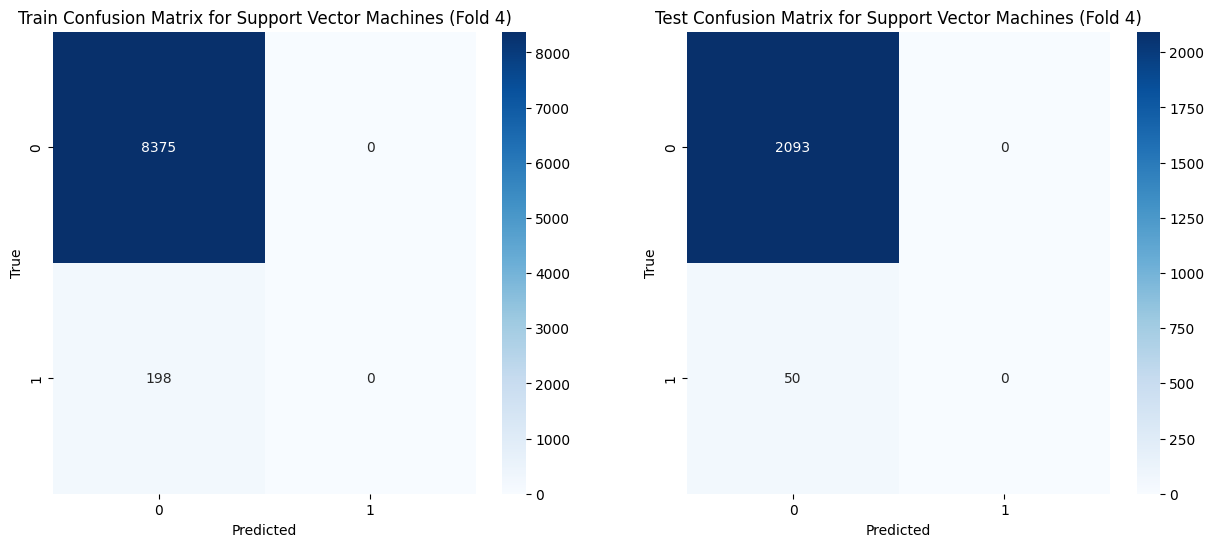

Support Vector Machines - Fold 4:
Accuracy: 0.9768
Precision: 0.0000
Recall: 0.0000
Specificity: 1.0000
F1 Score: 0.0000
False Positive Rate: 0.0000
False Negative Rate: 1.0000
Negative Predictive Value: 0.9768
False Discovery Rate: 0.0000
Balanced Accuracy: 0.5000
Accuracy: 0.9771
Precision: 0.0000
Recall: 0.0000
Specificity: 1.0000
F1 Score: 0.0000
False Positive Rate: 0.0000
False Negative Rate: 1.0000
Negative Predictive Value: 0.9771
False Discovery Rate: 0.0000
Balanced Accuracy: 0.5000
Train AUC: 0.89
Test AUC: 0.74


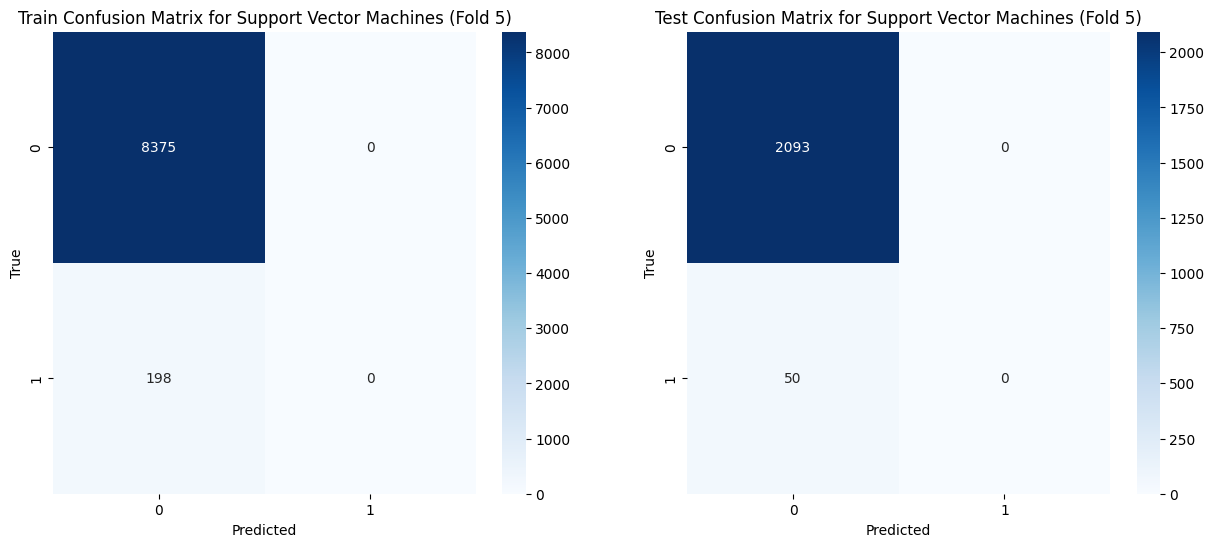

Support Vector Machines - Fold 5:
Accuracy: 0.9769
Precision: 0.0000
Recall: 0.0000
Specificity: 1.0000
F1 Score: 0.0000
False Positive Rate: 0.0000
False Negative Rate: 1.0000
Negative Predictive Value: 0.9769
False Discovery Rate: 0.0000
Balanced Accuracy: 0.5000
Accuracy: 0.9767
Precision: 0.0000
Recall: 0.0000
Specificity: 1.0000
F1 Score: 0.0000
False Positive Rate: 0.0000
False Negative Rate: 1.0000
Negative Predictive Value: 0.9767
False Discovery Rate: 0.0000
Balanced Accuracy: 0.5000
Train AUC: 0.90
Test AUC: 0.74


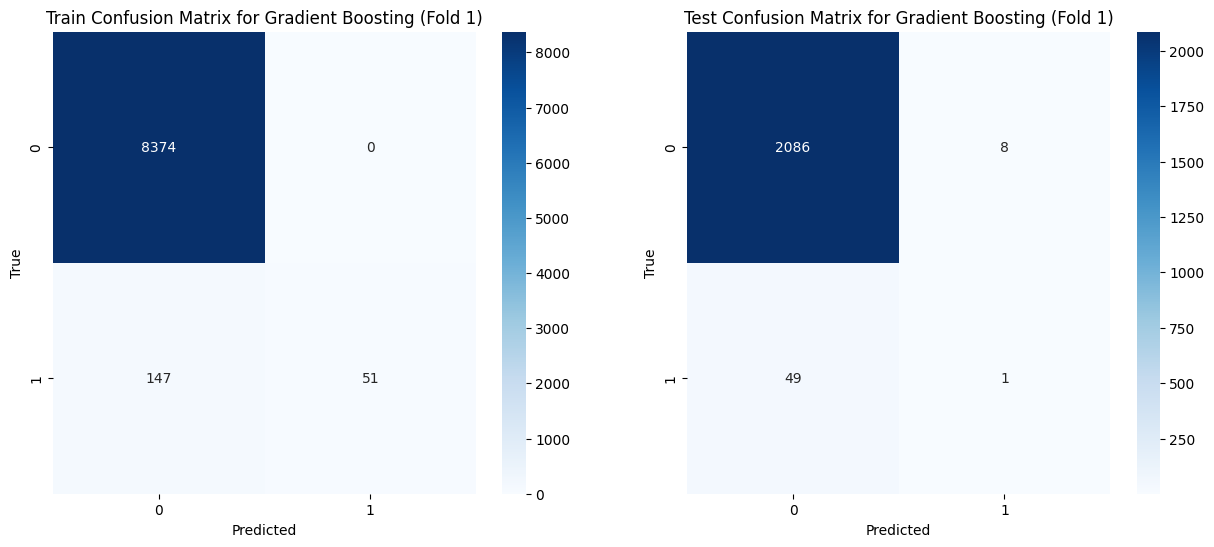

Gradient Boosting - Fold 1:
Accuracy: 0.9769
Precision: 0.0000
Recall: 0.0000
Specificity: 1.0000
F1 Score: 0.0000
False Positive Rate: 0.0000
False Negative Rate: 1.0000
Negative Predictive Value: 0.9769
False Discovery Rate: 0.0000
Balanced Accuracy: 0.5000
Accuracy: 0.9767
Precision: 0.0000
Recall: 0.0000
Specificity: 1.0000
F1 Score: 0.0000
False Positive Rate: 0.0000
False Negative Rate: 1.0000
Negative Predictive Value: 0.9767
False Discovery Rate: 0.0000
Balanced Accuracy: 0.5000
Train AUC: 0.96
Test AUC: 0.80


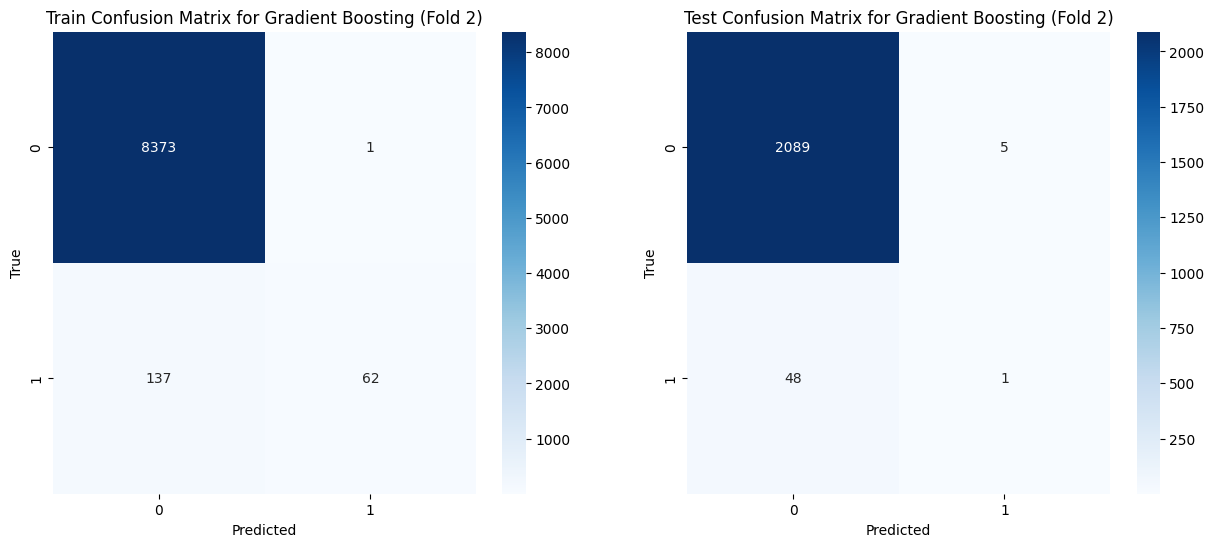

Gradient Boosting - Fold 2:
Accuracy: 0.9829
Precision: 1.0000
Recall: 0.2576
Specificity: 1.0000
F1 Score: 0.4096
False Positive Rate: 0.0000
False Negative Rate: 0.7424
Negative Predictive Value: 0.9827
False Discovery Rate: 0.0000
Balanced Accuracy: 0.6288
Accuracy: 0.9734
Precision: 0.1111
Recall: 0.0200
Specificity: 0.9962
F1 Score: 0.0339
False Positive Rate: 0.0038
False Negative Rate: 0.9800
Negative Predictive Value: 0.9770
False Discovery Rate: 0.8889
Balanced Accuracy: 0.5081
Train AUC: 0.97
Test AUC: 0.88


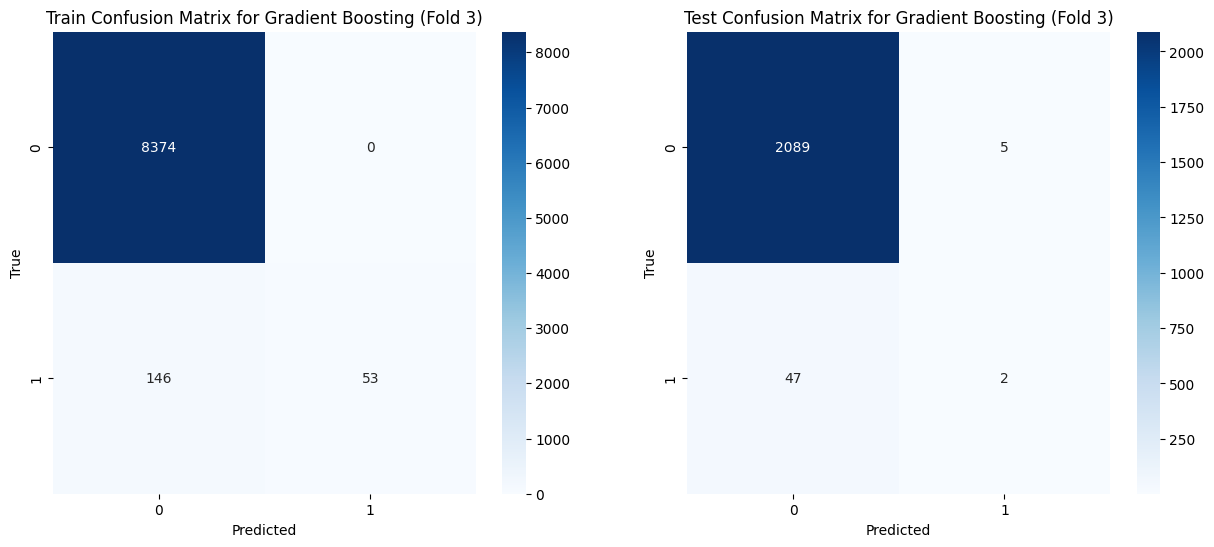

Gradient Boosting - Fold 3:
Accuracy: 0.9839
Precision: 0.9841
Recall: 0.3116
Specificity: 0.9999
F1 Score: 0.4733
False Positive Rate: 0.0001
False Negative Rate: 0.6884
Negative Predictive Value: 0.9839
False Discovery Rate: 0.0159
Balanced Accuracy: 0.6557
Accuracy: 0.9753
Precision: 0.1667
Recall: 0.0204
Specificity: 0.9976
F1 Score: 0.0364
False Positive Rate: 0.0024
False Negative Rate: 0.9796
Negative Predictive Value: 0.9775
False Discovery Rate: 0.8333
Balanced Accuracy: 0.5090
Train AUC: 0.96
Test AUC: 0.84


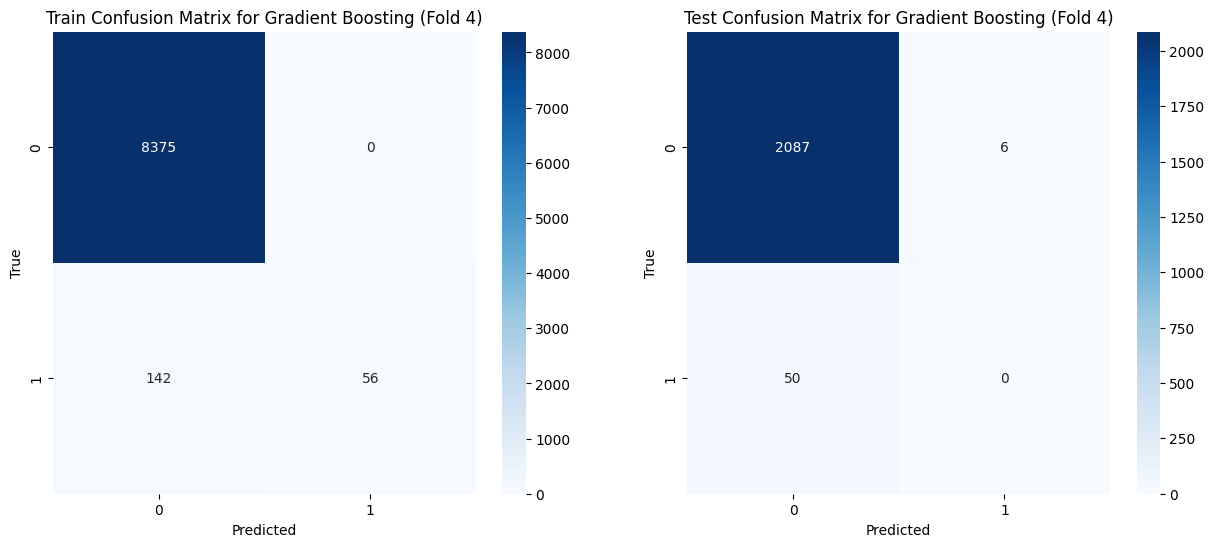

Gradient Boosting - Fold 4:
Accuracy: 0.9830
Precision: 1.0000
Recall: 0.2663
Specificity: 1.0000
F1 Score: 0.4206
False Positive Rate: 0.0000
False Negative Rate: 0.7337
Negative Predictive Value: 0.9829
False Discovery Rate: 0.0000
Balanced Accuracy: 0.6332
Accuracy: 0.9757
Precision: 0.2857
Recall: 0.0408
Specificity: 0.9976
F1 Score: 0.0714
False Positive Rate: 0.0024
False Negative Rate: 0.9592
Negative Predictive Value: 0.9780
False Discovery Rate: 0.7143
Balanced Accuracy: 0.5192
Train AUC: 0.96
Test AUC: 0.82


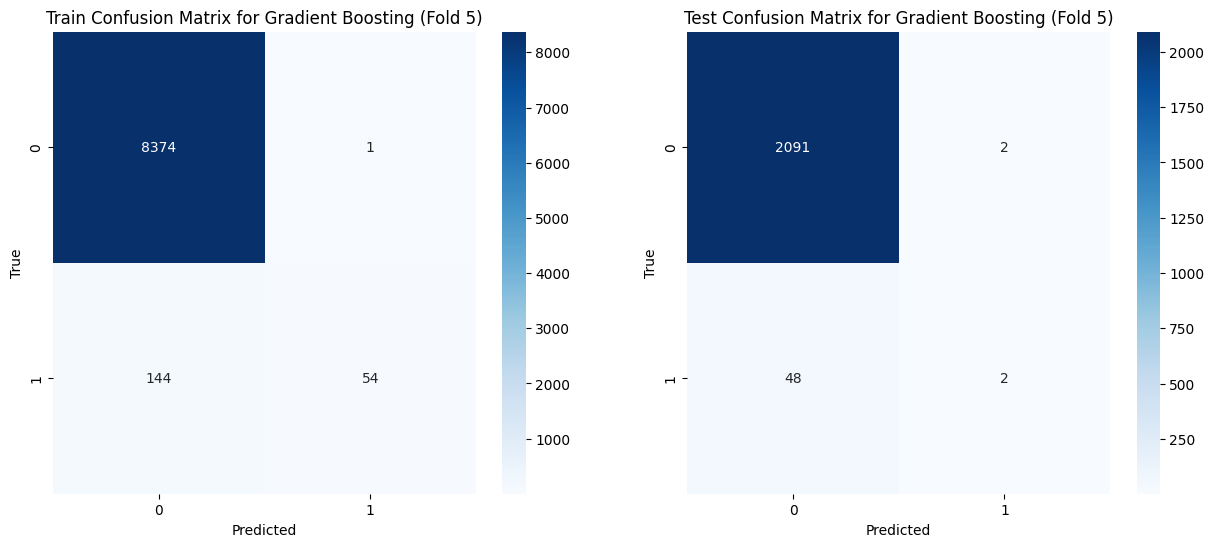

Gradient Boosting - Fold 5:
Accuracy: 0.9834
Precision: 1.0000
Recall: 0.2828
Specificity: 1.0000
F1 Score: 0.4409
False Positive Rate: 0.0000
False Negative Rate: 0.7172
Negative Predictive Value: 0.9833
False Discovery Rate: 0.0000
Balanced Accuracy: 0.6414
Accuracy: 0.9739
Precision: 0.0000
Recall: 0.0000
Specificity: 0.9971
F1 Score: 0.0000
False Positive Rate: 0.0029
False Negative Rate: 1.0000
Negative Predictive Value: 0.9766
False Discovery Rate: 1.0000
Balanced Accuracy: 0.4986
Train AUC: 0.96
Test AUC: 0.88


In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Define the classifiers
classifiers = {
    'Linear Discriminant Analysis': LinearDiscriminantAnalysis(),
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Decision Trees': DecisionTreeClassifier(),
    'Random Forests': RandomForestClassifier(),
    'k-Nearest Neighbors': KNeighborsClassifier(),
    'Naïve Bayes': GaussianNB(),
    'Support Vector Machines': SVC(probability=True),
    'Gradient Boosting': GradientBoostingClassifier()
}

results = []

# Training and evaluation for each classifier
for name, clf in classifiers.items():
    for fold_idx, (train_index, test_index) in enumerate(stratified_kfold.split(inputData, outputData)):
        X_train, X_test = features_normalized[train_index], features_normalized[test_index]
        y_train, y_test = outputData[train_index], outputData[test_index]

        # Check the distribution of the classes in the training set
        healthy_count = np.sum(y_train == 0)
        bankrupt_count = np.sum(y_train == 1)

        # Initialize new_train_indices with original train_index in case no resampling is required
        new_train_indices = train_index

        # Ensure the ratio of healthy to bankrupt companies is no more than 3:1
        if healthy_count > 3 * bankrupt_count:
            # Calculate the number of healthy companies to keep
            healthy_needed = 3 * bankrupt_count
            # Indices of healthy companies
            healthy_indices = np.where(y_train == 0)[0]
            # Randomly select the necessary healthy companies
            healthy_indices_to_keep = np.random.choice(healthy_indices, size=healthy_needed, replace=False)
            # Indices of bankrupt companies
            bankrupt_indices = np.where(y_train == 1)[0]
            # Combine and sort indices
            new_train_indices = np.sort(np.concatenate([healthy_indices_to_keep, bankrupt_indices]))
            # Update the training set
            X_train = X_train[new_train_indices]
            y_train = y_train[new_train_indices]

        # Train the model
        clf.fit(X_train, y_train)

        # Predict
        y_train_pred = clf.predict(X_train)
        y_test_pred = clf.predict(X_test)

        # Confusion matrices
        cm_train = confusion_matrix(y_train, y_train_pred)
        cm_test = confusion_matrix(y_test, y_test_pred)

        # Display the confusion matrices
        fig, axes = plt.subplots(1, 2, figsize=(15, 6))
        sns.heatmap(cm_train, annot=True, fmt='d', cmap='Blues', ax=axes[0])
        axes[0].set_title(f'Train Confusion Matrix for {name} (Fold {fold_idx + 1})')
        axes[0].set_xlabel('Predicted')
        axes[0].set_ylabel('True')

        sns.heatmap(cm_test, annot=True, fmt='d', cmap='Blues', ax=axes[1])
        axes[1].set_title(f'Test Confusion Matrix for {name} (Fold {fold_idx + 1})')
        axes[1].set_xlabel('Predicted')
        axes[1].set_ylabel('True')

        plt.show()

        # Calculate metrics
        train_metrics = calculate_comprehensive_metrics(tn_train, fp_train, fn_train, tp_train)
        test_metrics = calculate_comprehensive_metrics(tn_test, fp_test, fn_test, tp_test)
        auc_train = roc_auc_score(y_train, clf.predict_proba(X_train)[:, 1], multi_class='ovr')
        auc_test = roc_auc_score(y_test, clf.predict_proba(X_test)[:, 1], multi_class='ovr')

        # Print results
        print(f"{name} - Fold {fold_idx + 1}:")
        for metric, value in train_metrics.items():
            print(f"{metric}: {value:.4f}")
        for metric, value in test_metrics.items():
            print(f"{metric}: {value:.4f}")
        print(f"Train AUC: {auc_train:.2f}")
        print(f"Test AUC: {auc_test:.2f}")

        # Store results
        tn_train, fp_train, fn_train, tp_train = cm_train.ravel()
        tn_test, fp_test, fn_test, tp_test = cm_test.ravel()

        results.append({
            'Classifier Name': name,
            'Fold': fold_idx + 1,
            'Set': 'Train',
            'Number of Samples': len(new_train_indices),
            'Number of Non-Healthy': sum(y_train == 1),
            **train_metrics,
            'AUC': auc_train
        })

        results.append({
            'Classifier Name': name,
            'Fold': fold_idx + 1,
            'Set': 'Test',
            'Number of Samples': len(test_index),
            'Number of Non-Healthy': sum(y_test == 1),
            **test_metrics,
            'AUC': auc_test
        })

# Create DataFrame to store the results
results_df = pd.DataFrame(results)

# Save the results to a CSV file
results_df.to_csv('/content/drive/MyDrive/Results/balancedDataOutcomes.csv', index=False)

In [ ]:
import pandas as pd

# Paths to the CSV files
unbalanced_data_path = '/content/drive/MyDrive/Results/unbalancedDataOutcomes.csv'
balanced_data_path = '/content/drive/MyDrive/Results/balancedDataOutcomes.csv'

# Read the CSV files into pandas DataFrames
unbalanced_df = pd.read_csv(unbalanced_data_path)
balanced_df = pd.read_csv(balanced_data_path)

# Combine the DataFrames
combined_df = pd.concat([unbalanced_df, balanced_df])

# Path to the combined Excel file
combined_excel_path = '/content/drive/MyDrive/Results/combinedOutcomes.xlsx'

# Save the combined DataFrame to an Excel file
combined_df.to_excel(combined_excel_path, index=False)

print(f"Combined data saved to {combined_excel_path}")


Combined data saved to /content/drive/MyDrive/Results/combinedOutcomes.xlsx


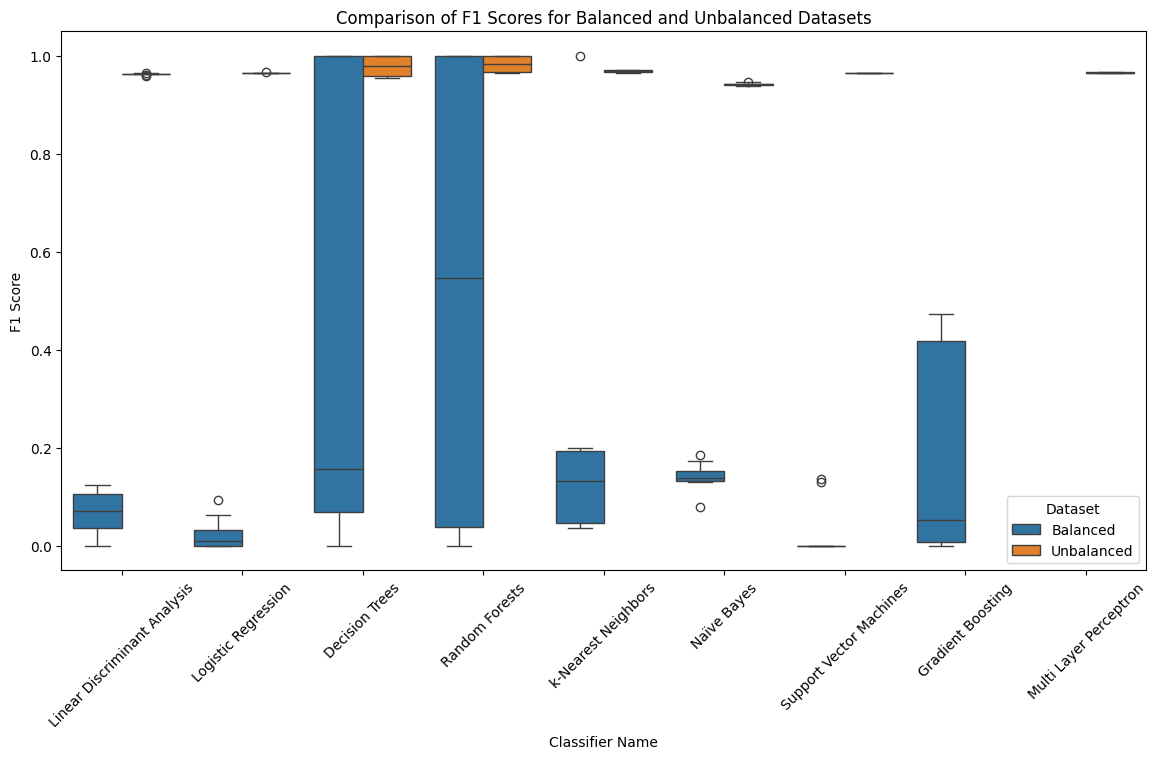

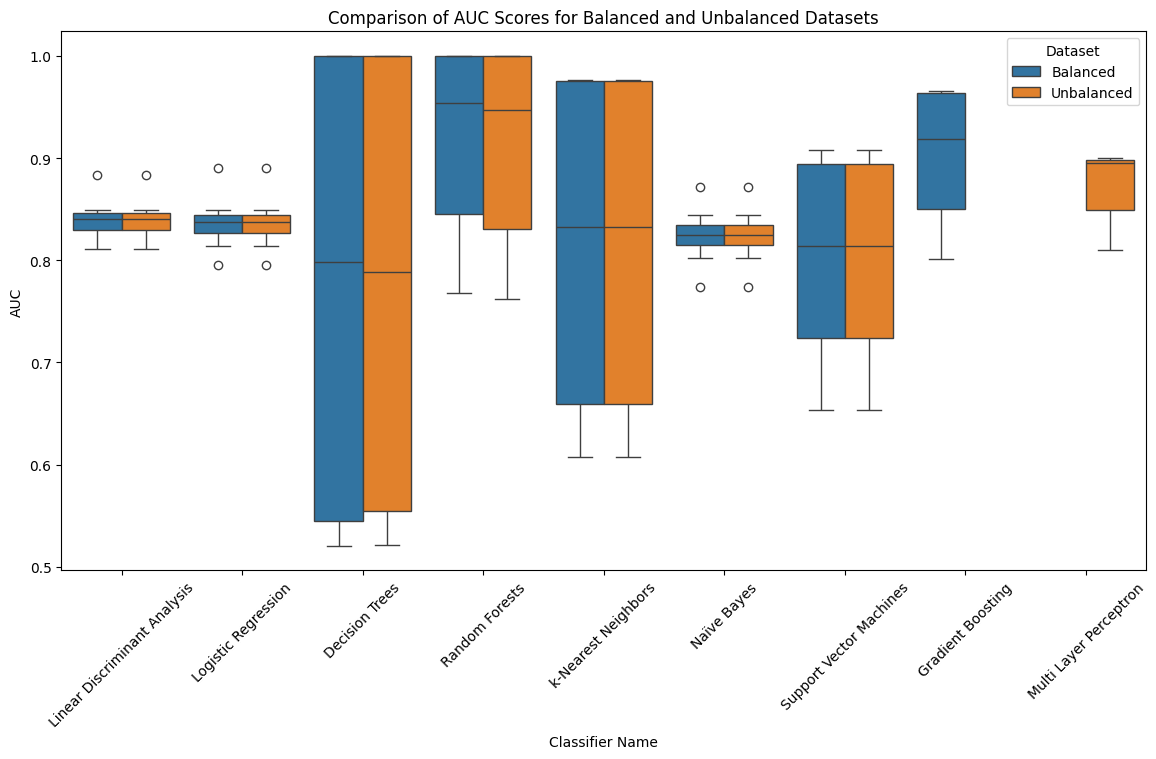

<ipython-input-14-dc9db40d39a1>:30: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=45)
<ipython-input-14-dc9db40d39a1>:34: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=45)


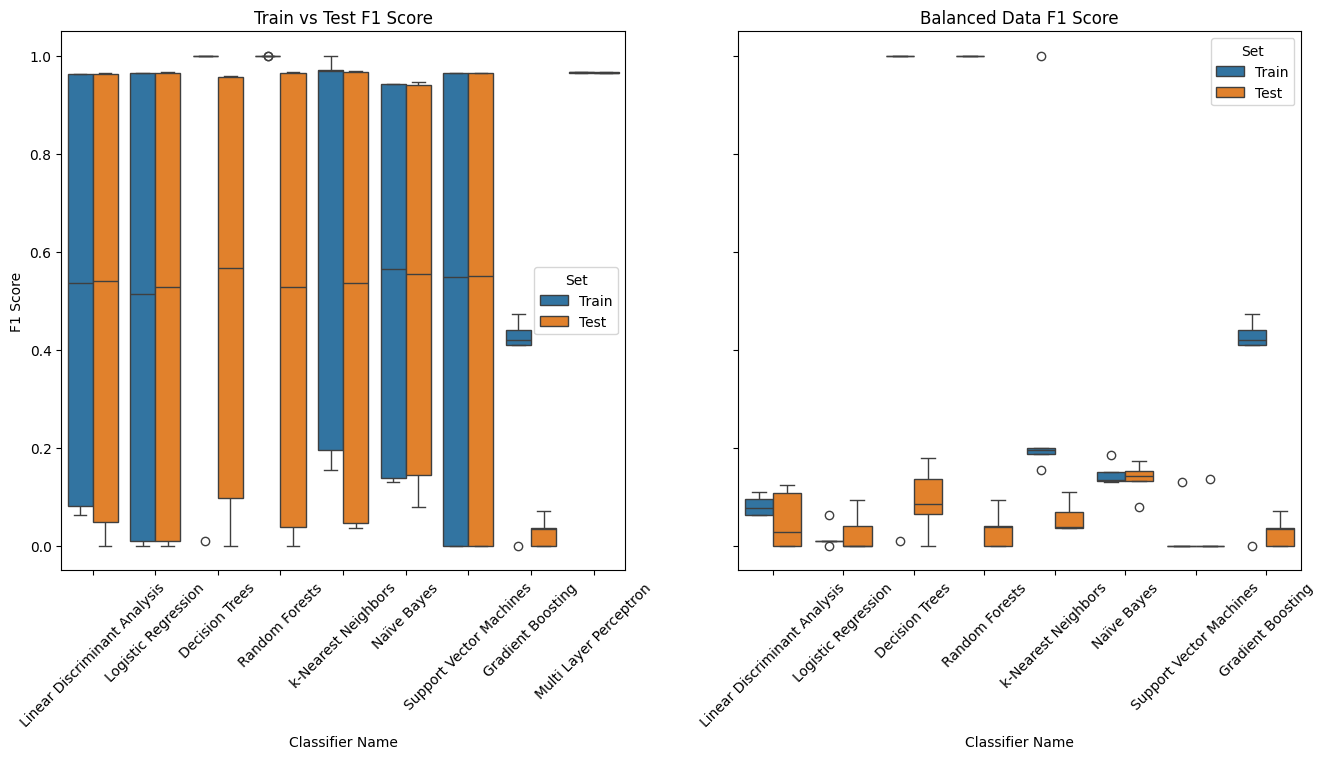

<ipython-input-14-dc9db40d39a1>:30: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=45)
<ipython-input-14-dc9db40d39a1>:34: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=45)


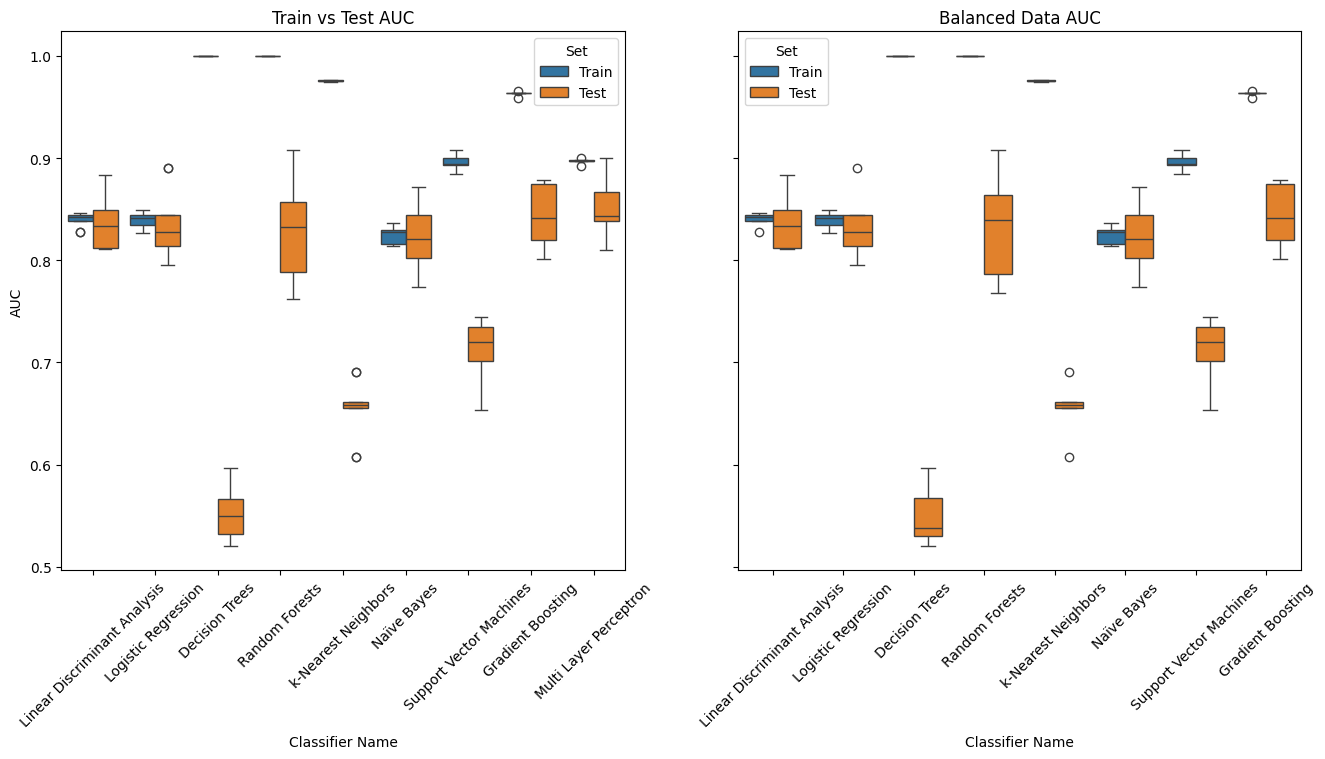

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Assuming results_df is the DataFrame containing the results from balanced data
results_df_balanced = pd.read_csv('/content/drive/MyDrive/Results/balancedDataOutcomes.csv')
results_df_unbalanced = pd.read_csv('/content/drive/MyDrive/Results/unbalancedDataOutcomes.csv')

# Combine the two DataFrames
results_df_balanced['Dataset'] = 'Balanced'
results_df_unbalanced['Dataset'] = 'Unbalanced'
results_df = pd.concat([results_df_balanced, results_df_unbalanced])

# Plotting
def plot_metrics(results_df, metric, title):
    plt.figure(figsize=(14, 7))
    sns.boxplot(x='Classifier Name', y=metric, hue='Dataset', data=results_df)
    plt.title(title)
    plt.xticks(rotation=45)
    plt.show()

plot_metrics(results_df, 'F1 Score', 'Comparison of F1 Scores for Balanced and Unbalanced Datasets')
plot_metrics(results_df, 'AUC', 'Comparison of AUC Scores for Balanced and Unbalanced Datasets')

# Separate plots for Train and Test
def plot_train_test_metrics(results_df, metric):
    fig, axes = plt.subplots(1, 2, figsize=(16, 7), sharey=True)
    sns.boxplot(x='Classifier Name', y=metric, hue='Set', data=results_df, ax=axes[0])
    axes[0].set_title(f'Train vs Test {metric}')
    axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=45)

    sns.boxplot(x='Classifier Name', y=metric, hue='Set', data=results_df[results_df['Dataset'] == 'Balanced'], ax=axes[1])
    axes[1].set_title(f'Balanced Data {metric}')
    axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=45)

    plt.show()

plot_train_test_metrics(results_df, 'F1 Score')
plot_train_test_metrics(results_df, 'AUC')


In [ ]:
def average_metrics(df):
    avg_metrics = df.groupby(['Classifier Name', 'Set']).agg({
        'Accuracy': 'mean',
        'Precision': 'mean',
        'Recall': 'mean',
        'F1 Score': 'mean',
        'AUC': 'mean'
    }).reset_index()
    return avg_metrics

avg_metrics_balanced = average_metrics(results_df_balanced)
avg_metrics_unbalanced = average_metrics(results_df_unbalanced)

print("Average Metrics for Balanced Dataset:")
print(avg_metrics_balanced)
print("\nAverage Metrics for Unbalanced Dataset:")
print(avg_metrics_unbalanced)

Average Metrics for Balanced Dataset:
                 Classifier Name    Set  Accuracy  Precision    Recall  \
0                 Decision Trees   Test  0.960246   0.085053  0.105551   
1                 Decision Trees  Train  0.995404   1.000000  0.801010   
2              Gradient Boosting   Test  0.974991   0.112698  0.016245   
3              Gradient Boosting  Train  0.982013   0.796825  0.223659   
4   Linear Discriminant Analysis   Test  0.968832   0.072341  0.040735   
5   Linear Discriminant Analysis  Train  0.970091   0.298549  0.058494   
6            Logistic Regression   Test  0.975924   0.242857  0.016082   
7            Logistic Regression  Train  0.975201   0.354264  0.012116   
8                    Naïve Bayes   Test  0.937757   0.195637  0.202041   
9                    Naïve Bayes  Train  0.937780   0.225600  0.219715   
10                Random Forests   Test  0.972564   0.317544  0.028082   
11                Random Forests  Train  1.000000   1.000000  1.000000   


In [ ]:
test_metrics_balanced = avg_metrics_balanced[avg_metrics_balanced['Set'] == 'Test']
test_metrics_unbalanced = avg_metrics_unbalanced[avg_metrics_unbalanced['Set'] == 'Test']

best_model_balanced = test_metrics_balanced.loc[test_metrics_balanced['AUC'].idxmax()]
best_model_unbalanced = test_metrics_unbalanced.loc[test_metrics_unbalanced['AUC'].idxmax()]

print(f"Best model on balanced data: {best_model_balanced['Classifier Name']} with AUC: {best_model_balanced['AUC']}")
print(f"Best model on unbalanced data: {best_model_unbalanced['Classifier Name']} with AUC: {best_model_unbalanced['AUC']}")

Best model on balanced data: Gradient Boosting with AUC: 0.843322885861995
Best model on unbalanced data: Multi Layer Perceptron with AUC: 0.8517327846357372


In [ ]:
from scipy.stats import mannwhitneyu

# Extract accuracy data for the best model and other models
best_model_data = test_metrics_balanced[test_metrics_balanced['Classifier Name'] == best_model_balanced['Classifier Name']]['AUC']
other_models_data = test_metrics_balanced[test_metrics_balanced['Classifier Name'] != best_model_balanced['Classifier Name']]['AUC']

# Perform the Mann-Whitney U test
u_stat, p_value = mannwhitneyu(best_model_data, other_models_data, alternative='two-sided')
print(f"U-statistic: {u_stat}, P-value: {p_value}")

# Determine if there is a statistically significant difference in performance
if p_value < 0.05:
    print("There is a statistically significant difference in performance.")
else:
    print("There is no statistically significant difference in performance.")


U-statistic: 7.0, P-value: 0.25
There is no statistically significant difference in performance.
